In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def coth(a):
    if a>0: return (1+tf.math.exp(-2*a))/(1-tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)+1)/(tf.math.exp(2*a)-1)
    if a==0: return 0

def tanh(a):
    if a>0: return (1-tf.math.exp(-2*a))/(1+tf.math.exp(-2*a))
    if a<0: return (tf.math.exp(2*a)-1)/(tf.math.exp(2*a)+1)
    if a==0: return 0

In [32]:
data=1000
batch=100
set=10
layer=10
n_ini=1.0
n_fin=0.1
dn=-0.1
c_reg1=0.006
c_reg2=0.0001
d=2

m^2= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=2.3441008100564935>
lam= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=2.2196451041083143>
alpha= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=0.3139038205791317>
beta= <tf.Variable 'Variable:0' shape=() dtype=float64, numpy=-0.17449397404885147>
<tf.Variable 'Variable:0' shape=(10,) dtype=float64, numpy=
array([2.213092  , 0.62415133, 3.62104325, 3.7845527 , 1.99260868,
       2.46427099, 2.20933132, 1.58720881, 2.30242717, 2.29798232])>


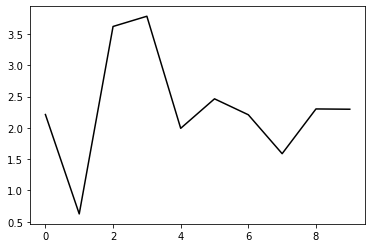

In [33]:
h=tf.zeros(layer)
h_in=[]
for i in range (layer):
    h_inn=np.float64(np.random.normal(2, 1))
    h_in.append(h_inn)
h=tf.Variable(h_in)
m2=tf.Variable(np.float64(np.random.normal(2, 1)))
lam=tf.Variable(np.float64(np.random.normal(1, 1)))
alpha=tf.Variable(np.float64(np.random.uniform(-0.5, 0.5)))
beta=tf.Variable(np.float64(np.random.uniform(-0.5, 0.5)))
#m2=tf.constant(np.float64(5.6))
#lam=tf.constant(np.float64(0.61))
#alpha=tf.constant(np.float64(1.444635))
#beta=tf.constant(np.float64(0.00615))
print("m^2=", m2)
print("lam=", lam)
print("alpha=", alpha)
print("beta=", beta)
print(h)
plt.plot(h.numpy(), 'k-')
plt.show()

In [5]:
def F_func(m, la, a,b):
    return 2*b/n_fin-m*a-la*(a**3)

def t_func(a):
    return 0.5*(tf.math.tanh(100*(a-0.1))-tf.math.tanh(100*(a+0.1))+2)

In [6]:
x=[i*0.1 for i in range (30)]
y=[0.0, 0.018, 0.035, 0.053, 0.0715, 0.0895, 0.107, 0.125, 0.146, 0.1665, 0.1875, 0.2085, 0.229, 0.25, 0.265, 0.281, 0.296, 0.3115, 0.3275, 0.343, 0.3565, 0.385, 0.4375, 0.5, 0.6, 0.675, 0.735, 0.815, 0.865, 0.885]
fp1 = np.polyfit(x, y, 15)
print(fp1)

[ 2.60581612e-01 -5.58472955e+00  5.38266808e+01 -3.08275478e+02
  1.16790041e+03 -3.08347723e+03  5.82285230e+03 -7.94502014e+03
  7.81868298e+03 -5.47798636e+03  2.66286328e+03 -8.59692413e+02
  1.71291955e+02 -1.84108983e+01  9.55260239e-01 -6.54557458e-05]


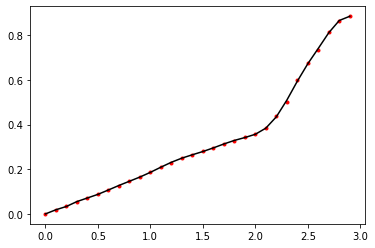

In [7]:
def f(x):
    y=0
    for i in range (16):
        y=y+fp1[i]*x**(15-i)
    return y
yy=[f(i*0.1) for i in range (30)]
plt.plot(x, y, 'r.')
plt.plot(x, yy, 'k-')
plt.show()

In [8]:
def NN_func_p(f):
    Positive=[]
    append=Positive.append
    while len(Positive)<batch:
        H=np.random.uniform(0.0, 3.0)
        M=np.random.uniform(0.0, 1.0)
        noise=np.abs(np.random.normal(0, 0.025))
        if np.abs(M-f(H))<=noise: append([H, M])
        else: continue
    return Positive
def NN_func_n(f):
    Negative=[]
    append=Negative.append
    while len(Negative)<batch:
        H=np.random.uniform(0.0, 3.0)
        M=np.random.uniform(0.0, 1.0)
        noise=np.abs(np.random.normal(0, 0.025))
        if np.abs(M-f(H))>noise: append([H, M])
        else: continue
    return Negative

In [23]:
Positive=[]
Negative=[]
for i in range (set):
    Positive.insert(i, NN_func_p(f))
    Negative.insert(i, NN_func_n(f))

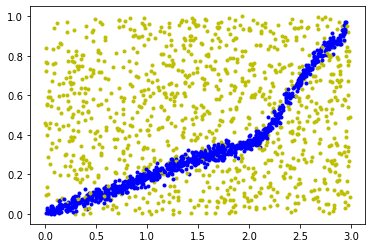

In [24]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
for i in range (set):
    x_data1.insert(i, [v[0] for v in Positive[i]])
    y_data1.insert(i, [v[1] for v in Positive[i]])
    x_data2.insert(i, [v[0] for v in Negative[i]])
    y_data2.insert(i, [v[1] for v in Negative[i]])
    plt.plot(x_data2[i], y_data2[i], 'y.')
    plt.plot(x_data1[i], y_data1[i], 'b.')
plt.show()

In [25]:
def Dfunc(hh, m):
    D=tf.math.sqrt(tf.math.abs(1+4*m/(hh[0]**2)))
    return D

In [26]:
def LP2(hh, m, la, alpha, beta, HH, MM):
    D=Dfunc(hh, m)
    phi=alpha*HH+beta*MM
    pi=(d/2)*(D-1)*alpha*HH+(d/2)*(-D-1)*beta*MM
    for j in range (layer-1):
        phi1=phi+dn*pi
        pi1 =phi*m*dn+(1-dn*hh[j])*pi+dn*la*(phi1**3)
        phi=phi1
        pi=pi1
    return phi, pi
def NN_func_01(hh, m, la, alpha, beta, list_hr):
    PP=[]
    NN=[]
    H=np.array(list_hr)[:, 0]
    M=np.array(list_hr)[:, 1]
    F=np.array(tf.math.abs(LP2(hh, m, la, alpha, beta, H, M)[1]))
    for i in range (len(H[F<0.1])):
        PP.append([H[F<0.1][i], M[F<0.1][i]])
    for i in range (len(H[F>=0.1])):
        NN.append([H[F>=0.1][i], M[F>=0.1][i]])
    return PP, NN

In [34]:
Positive0=[]
Positive1=[]
Negative0=[]
Negative1=[]
for i in range (set):
    Positive0.insert(i, NN_func_01(h, m2, lam, alpha, beta, Positive[i])[0])
    Positive1.insert(i, NN_func_01(h, m2, lam, alpha, beta, Positive[i])[1])
    Negative0.insert(i, NN_func_01(h, m2, lam, alpha, beta, Negative[i])[0])
    Negative1.insert(i, NN_func_01(h, m2, lam, alpha, beta, Negative[i])[1])

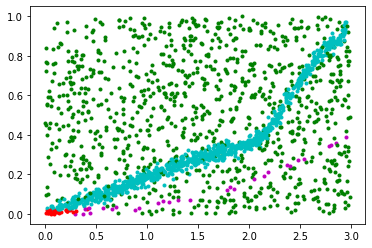

In [35]:
x_data1=[]
y_data1=[]
x_data2=[]
y_data2=[]
x_data3=[]
y_data3=[]
x_data4=[]
y_data4=[]
for i in range (set):
    x_data1.insert(i, [v[0] for v in Positive0[i]])
    y_data1.insert(i, [v[1] for v in Positive0[i]])
    x_data2.insert(i, [v[0] for v in Positive1[i]])
    y_data2.insert(i, [v[1] for v in Positive1[i]])
    x_data3.insert(i, [v[0] for v in Negative0[i]])
    y_data3.insert(i, [v[1] for v in Negative0[i]])
    x_data4.insert(i, [v[0] for v in Negative1[i]])
    y_data4.insert(i, [v[1] for v in Negative1[i]])
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'c.')
    plt.plot(x_data1[i], y_data1[i], 'r.')
    plt.plot(x_data3[i], y_data3[i], 'm.')
plt.show()

# Error function

$E=\sum_{data} \left\vert y(\bar{x}^{(1)}) - \bar{y} \right\vert+E_{reg}(W)$
, $E_{reg}=c_{reg}^{(1)}\sum_{n=1}^{N-1}(\eta^{(n)})^{4}(h(\eta^{(n+1)})-h(\eta^{(n)}))^{2}+c_{reg}^{(2)}(h(\eta^{(N)})-1/\eta^{(N)})^{2}$

In [36]:
def Error_func(hh, m, la, alpha, beta, list1, list2):
    H0=np.array([v[0] for v in list1])
    M0=np.array([v[1] for v in list1])
    H1=np.array([v[0] for v in list2])
    M1=np.array([v[1] for v in list2])
    H_0, M_0=LP2(hh, m, la, alpha, beta, H0, M0)
    H_1, M_1=LP2(hh, m, la, alpha, beta, H1, M1)
    PPlist=t_func(M_0)
    NNlist=t_func(M_1)
    sum_p=sum(PPlist)/batch
    sum_n=(batch-sum(NNlist))/batch

    inside=0
    for k in range (layer-1):
        second=((n_ini+k*dn)**4)*((hh[k+1]-hh[k])**2)
        inside=inside+second
    E_reg1=c_reg1*inside
    E_reg2=c_reg2*((hh[layer-1]-1/n_fin)**2)
    return sum_p+sum_n+E_reg1+E_reg2

In [37]:
for i in range (set):
    print(Error_func(h, m2, lam, alpha, beta, Positive[i], Negative[i]))

tf.Tensor(1.0619669359386632, shape=(), dtype=float64)
tf.Tensor(1.0592214489191967, shape=(), dtype=float64)
tf.Tensor(1.0218451198356293, shape=(), dtype=float64)
tf.Tensor(1.004920642186323, shape=(), dtype=float64)
tf.Tensor(1.046065594071158, shape=(), dtype=float64)
tf.Tensor(1.0438523699121942, shape=(), dtype=float64)
tf.Tensor(1.0100801689994157, shape=(), dtype=float64)
tf.Tensor(1.0811918995746346, shape=(), dtype=float64)
tf.Tensor(1.10641241308372, shape=(), dtype=float64)
tf.Tensor(1.0811471284215102, shape=(), dtype=float64)


# Optimize

0 1.0620331583035831
2.308797864558879 2.184323770073563 0.27856144338315897 -0.13919587936892883
[2.11309374 0.72414998 3.5210459  3.68456284 2.09259853 2.36432409
 2.10953206 1.48764963 2.20254197 2.39794385]


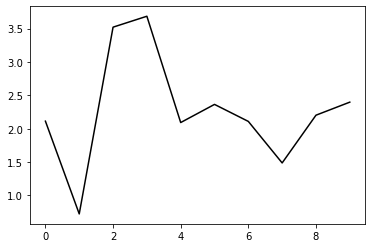

1100 1.0102936004528107
2.3728896263041195 2.1233042160562126 0.20854901001582504 -0.1956192618828537
[1.92811372 1.1736089  3.41355814 3.71231559 2.40376809 2.44219303
 2.1376815  1.42513654 2.03128446 3.45138202]


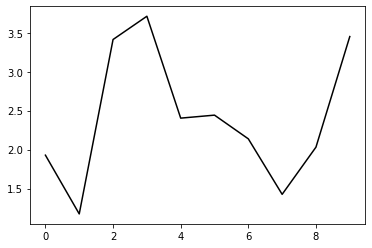

2200 0.9620219253269024
2.344125271242874 2.1187795057403105 0.20222114786037076 -0.18961675075364604
[1.95516335 1.39506041 2.99950925 3.4075252  2.43438309 2.23933239
 1.87166768 1.09571597 1.54667476 4.44208741]


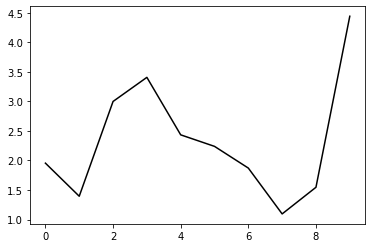

3300 0.9540930534998077
2.2899847645432003 2.111013763677455 0.19429857256429237 -0.17315268382523802
[1.86917518 1.6893235  2.65009861 3.05078067 2.42631991 1.98673937
 1.47677817 0.58954704 0.87968208 5.37206507]


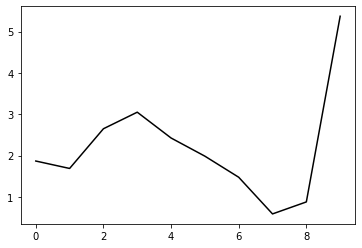

4400 0.9709322239653421
2.2221567214388975 2.106706241000742 0.18631939853850873 -0.15425742363519185
[ 1.89243392  1.82896085  2.25378394  2.51833452  2.14046883  1.55776307
  0.90703555 -0.05562225  0.13071048  6.2463147 ]


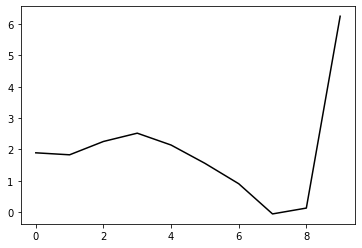

5500 0.9490092850455999
2.210796914832249 2.0913680694578773 0.1718810305159023 -0.14392124030802478
[ 1.64707249  1.95484587  2.27554183  2.43149496  2.18349662  1.5940993
  0.83079081 -0.21184025 -0.17118086  7.05960207]


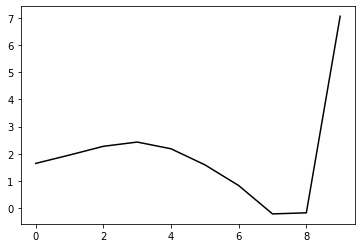

6600 0.9223083729909606
2.1426626718505566 2.0838598106820196 0.15816344736259505 -0.12163253759276885
[ 1.56134138  1.95685383  2.11986911  2.16181995  1.9173646   1.30769078
  0.42608182 -0.73043483 -0.8480309   7.78097695]


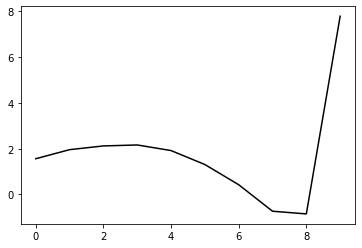

7700 0.9218554672600741
2.0046780030840416 2.082621316527258 0.1442564123057672 -0.06942819822171155
[ 1.76723884  1.61039527  1.66190808  1.62591757  1.34688836  0.7124137
 -0.24608783 -1.48876975 -1.71105585  8.362771  ]


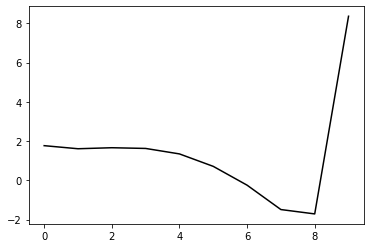

8800 0.9096332110602398
1.914706118396837 2.07842086301915 0.13209353747113217 0.1404545645651033
[ 2.05270433  1.45757971  1.14010199  1.00586291  0.75477079  0.18124574
 -0.75147756 -1.98280028 -2.20136179  8.73457503]


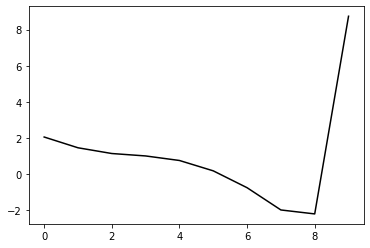

9900 0.7966131741157666
1.6073219160642493 2.091412465945839 0.13870234221558553 0.05158861795096307
[ 1.84994041  1.28106918  0.68535549  0.22788637 -0.15695896 -0.7469168
 -1.68232325 -2.92431364 -3.15521344  8.84974224]


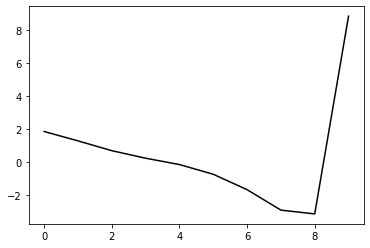

11000 1.072049089035286
1.8196503123674546 2.0740131395970485 0.2209198035503988 0.09796289685784103
[ 0.6626153   2.13993542  2.07335187  1.58892751  1.07774996  0.38090057
 -0.67731267 -2.06180327 -2.45823733  8.89179965]


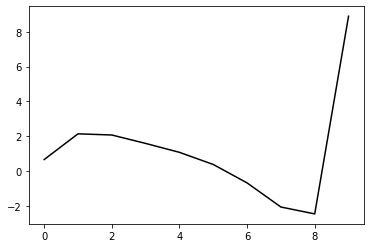

12100 0.9389094441584479
1.7190927502655382 2.103246377717732 0.11687910574218453 0.2131619861261126
[ 1.23703513  1.33810254  1.55404978  1.28273645  0.78073704  0.09508474
 -0.9279667  -2.27241269 -2.62191801  8.89484398]


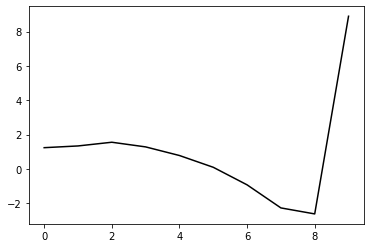

13200 0.2896305071771804
1.5680331976514008 2.0895671567629117 0.19563955821412632 0.1511436153638218
[ 1.01507319  1.45056121  1.53948516  1.242178    0.64433092 -0.18730263
 -1.37392884 -2.90810803 -3.47405732  8.81911046]


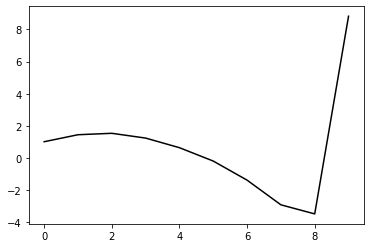

14300 0.2793493764181744
1.5716936327655984 2.060281513375857 0.1855264901812448 0.16029857673705394
[ 0.99222504  1.45651155  1.56723814  1.31689794  0.73883881 -0.11000791
 -1.3271622  -2.91483032 -3.56422791  8.80633395]


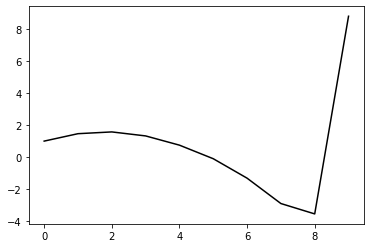

15400 0.43358953560761804
1.5324667942329142 2.072311412761562 0.19699205843940326 0.16225626401950685
[ 0.95249449  1.48168073  1.58125546  1.35608758  0.79150517 -0.07195921
 -1.31890035 -2.96643896 -3.74964643  8.7676487 ]


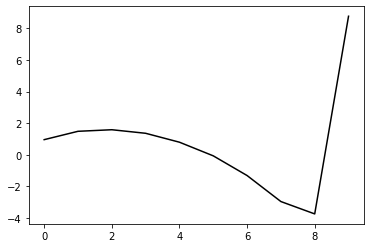

16500 0.5010985651836497
1.4656471174419 2.0317364108591853 0.178543536547633 0.16440027349877073
[ 0.9786972   1.40714041  1.48060706  1.24260215  0.65785302 -0.24766992
 -1.54905708 -3.27034701 -4.17137769  8.77462466]


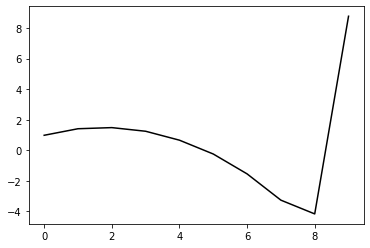

17600 0.7520351813471913
1.4508808365765697 2.0290280936494307 0.13877326155383857 0.21077995431806923
[ 1.11001148  1.27554963  1.37244553  1.16123416  0.60108131 -0.29578099
 -1.59438945 -3.31524345 -4.22139152  8.72804412]


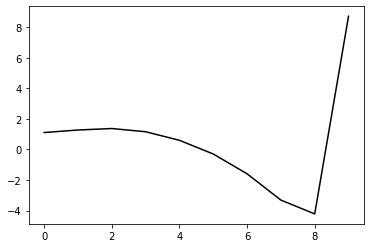

18700 0.7805475866383869
1.4119355967995355 2.007136665646979 0.1342074447102225 0.21343673769102212
[ 1.10577133  1.2438474   1.33994379  1.13367164  0.57329226 -0.34410218
 -1.6784076  -3.45421332 -4.46210305  8.83508858]


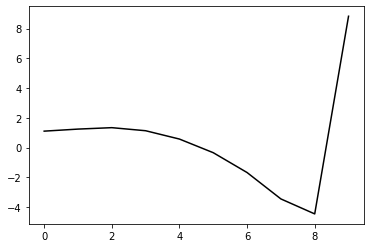

19800 0.5300537840418705
1.4342185153508187 1.9643536092051272 0.19497757351026915 0.17593833241523996
[ 0.87592287  1.46335877  1.5741486   1.37719248  0.82133818 -0.10944315
 -1.47348603 -3.30106438 -4.42176     8.71202948]


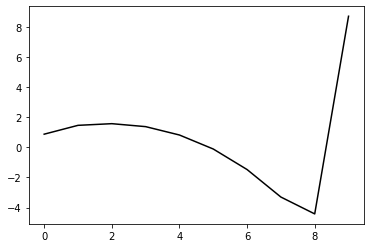

20900 0.7834889455128567
1.4594931429206766 1.994150977802355 0.16561687202407074 0.22922790746812677
[ 1.05377963  1.31805772  1.50233253  1.36685398  0.87151956 -0.01083578
 -1.33262984 -3.11159001 -4.15991738  8.78987241]


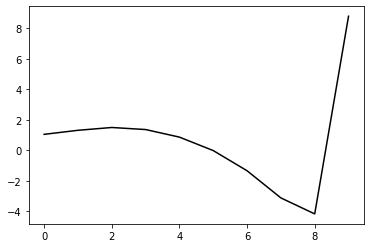

22000 0.43096677837210834
1.4565182493602344 1.9046791857006997 0.17085665792454144 0.21489600398432074
[ 0.88534692  1.41996646  1.6083904   1.46797607  0.95984186  0.04815763
 -1.32063628 -3.16625397 -4.32477661  8.7087282 ]


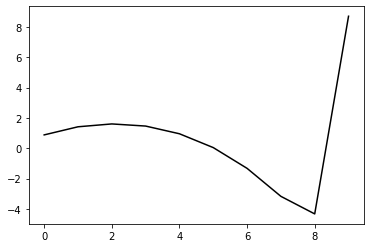

23100 0.3636474404036184
1.4341297179303114 1.8100726985564473 0.1774616075049752 0.19399777321630218
[ 0.86066167  1.37905116  1.55809776  1.41264839  0.89219719 -0.04540171
 -1.45527172 -3.35947261 -4.61684856  8.65680848]


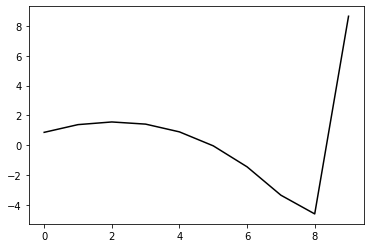

24200 0.5775141585957891
1.451567475483891 1.7968702378976111 0.15491677846444485 0.22736164565824274
[ 0.99174091  1.24671389  1.46669743  1.36406657  0.88433848 -0.02254899
 -1.41072791 -3.29193837 -4.51134025  8.79597839]


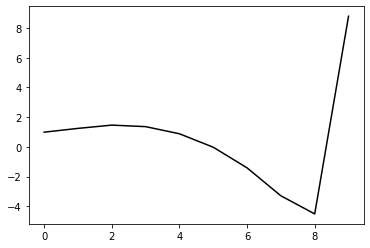

25300 0.3110378832862855
1.4335646989268258 1.7331141929808502 0.16784787625569364 0.21094789478932816
[ 0.84440303  1.32579721  1.53227002  1.4208761   0.92587555 -0.01146524
 -1.45038359 -3.40719231 -4.75741104  8.7593688 ]


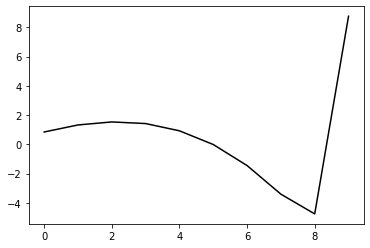

26400 0.5027899072817776
1.4259401154437639 1.6906183415663407 0.16135856394149117 0.21907691937464047
[ 0.95004885  1.19060444  1.40413077  1.31287371  0.83768094 -0.08963223
 -1.53072062 -3.49637076 -4.85966876  8.71314363]


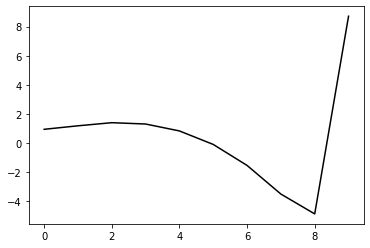

27500 0.44365634766621675
1.4435067517527334 1.616880354016761 0.17283933710966684 0.20407045669852472
[ 8.08406863e-01  1.26623305e+00  1.47528751e+00  1.39351710e+00
  9.29623323e-01  1.88997738e-03 -1.45699896e+00 -3.45445245e+00
 -4.87020110e+00  8.67756649e+00]


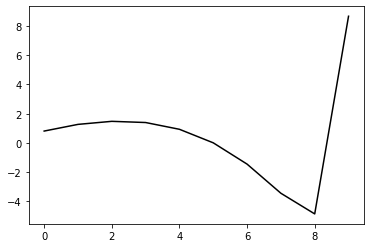

28600 0.3968804678827403
1.4628066085192029 1.595594576465189 0.15762409998949284 0.22835595188210794
[ 0.86142093  1.24632882  1.49539207  1.47191862  1.07174414  0.19610427
 -1.22971492 -3.20278291 -4.58984168  8.76199219]


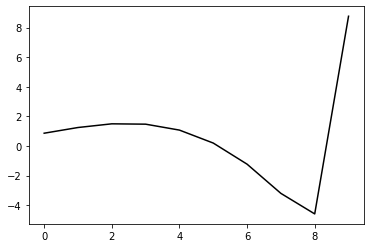

29700 0.8309333408364361
1.3763737596958046 1.6433594649939756 0.12154005861220578 0.2532205650023497
[ 1.03741214  1.03508151  1.18196891  1.14669673  0.74476889 -0.14176732
 -1.59999392 -3.63076386 -5.11012226  8.71998498]


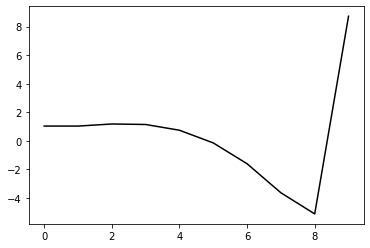

30800 0.745435810348343
1.35311710051237 1.6294930521491506 0.13314085284768218 0.2445835075589465
[ 0.95467428  1.08276433  1.23880504  1.18489451  0.78518473 -0.10805988
 -1.60092194 -3.6988934  -5.29483791  8.65187417]


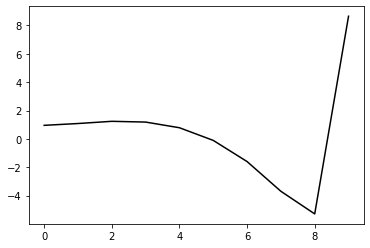

31900 0.6575433256124459
1.3842575513363644 1.5163708918455827 0.17106280815189384 0.20382690211766014
[ 0.70190777  1.27993203  1.45985455  1.40244096  1.00350164  0.10885012
 -1.40335161 -3.54034407 -5.20182403  8.69036766]


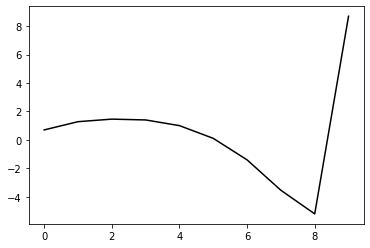

33000 0.4598618414329701
1.345492237906547 1.461980606905466 0.15866600361677113 0.21015241436877868
[ 0.83167192  1.11845173  1.29523536  1.23946316  0.84145859 -0.05309272
 -1.57878875 -3.74629785 -5.4581025   8.62776759]


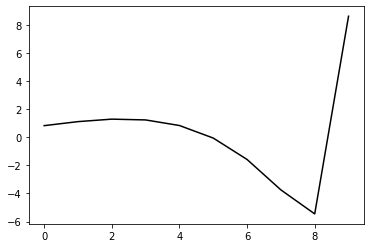

34100 0.3803954559760515
1.3921982261209525 1.4447635298923476 0.17087496752620657 0.22238114517490964
[ 0.73217393  1.25927246  1.46801978  1.43891912  1.06802792  0.19772837
 -1.31644961 -3.48539681 -5.20694481  8.58384954]


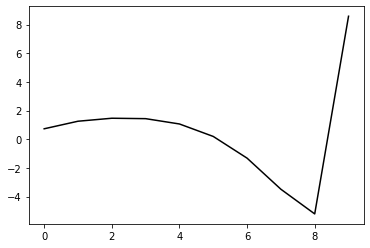

35200 0.4169951129434092
1.386810734219614 1.406037805431517 0.1829186498815058 0.2325415436700591
[ 0.71275429  1.25433145  1.48282791  1.46028747  1.0947427   0.22870047
 -1.29468396 -3.49259442 -5.26327665  8.69238874]


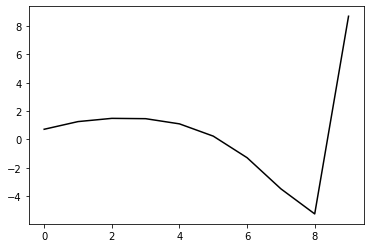

36300 0.6086519372746104
1.3578000986372407 1.352038427704741 0.18857370074276 0.22524810435591913
[ 0.68479762  1.253228    1.45441147  1.42341659  1.04936601  0.17218025
 -1.37475016 -3.61814643 -5.47332069  8.51070822]


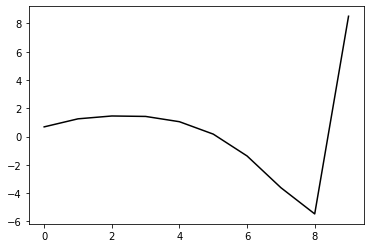

37400 0.3601180249327698
1.3154418375278696 1.277508417346525 0.18078766101610907 0.2242005763764683
[ 0.74166995  1.18769916  1.35447445  1.30810838  0.92156267  0.0313355
 -1.53765913 -3.82034756 -5.74302853  8.61389738]


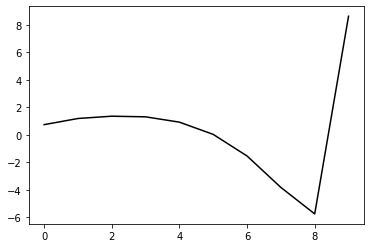

38500 0.49871160382908136
1.3206396342402478 1.19320677159644 0.15932586532843654 0.24211392501538573
[ 0.82505284  1.08571529  1.26716696  1.23033436  0.85820952 -0.01702349
 -1.57790738 -3.86144019 -5.78186254  8.58349829]


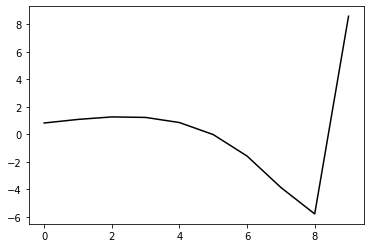

39600 0.40587449827313987
1.369322964387913 1.1976056753713196 0.15974945669654192 0.26468255964635684
[ 0.82045209  1.13065599  1.37493029  1.38610056  1.06324917  0.23572835
 -1.28853722 -3.54887518 -5.44014625  8.7229141 ]


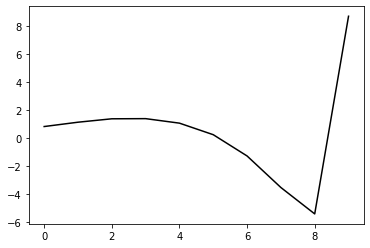

40700 0.393218603977837
1.3381829534882448 1.1633116156740548 0.1750324273934196 0.2511801526344605
[ 0.75378125  1.1726752   1.37864805  1.37599548  1.04041606  0.19791946
 -1.35599243 -3.67915046 -5.69050797  8.61523336]


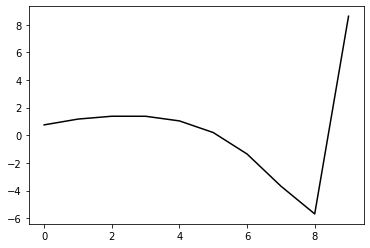

41800 0.3444958406737857
1.3657464354435167 1.1385344186948267 0.16672973834960583 0.2735237875054457
[ 0.73030804  1.20191657  1.4557327   1.47890511  1.17179961  0.35865666
 -1.17483757 -3.49453661 -5.50887903  8.64951333]


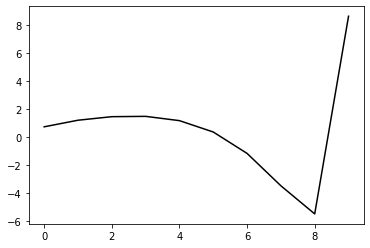

42900 0.7524016427744522
1.3570464526973502 1.123365799379507 0.15497782922884124 0.28648317446632704
[ 0.88454683  1.02461168  1.29841566  1.34672912  1.06468038  0.27706052
 -1.23960021 -3.56072555 -5.58308323  8.68141857]


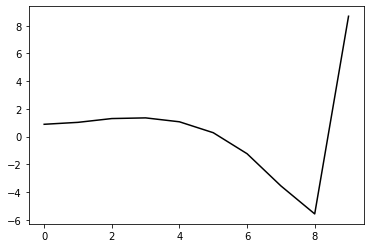

44000 0.43142473360569633
1.378210577522503 1.1017509962177023 0.17958516739494285 0.2757197303368071
[ 0.69629676  1.21037076  1.4932969   1.55595405  1.28747671  0.50985642
 -1.00895033 -3.35754858 -5.43700536  8.61969995]


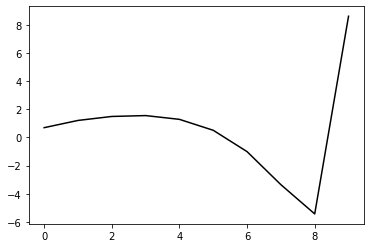

45100 0.8936092171951369
1.3511356507752719 1.116608900962375 0.12866648877729062 0.3265938267558951
[ 0.95015903  0.98897009  1.25771493  1.35559566  1.12874079  0.39343661
 -1.09163794 -3.42496738 -5.49030948  8.66807392]


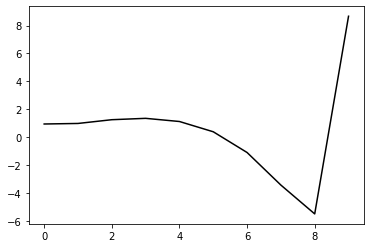

46200 0.3843347032119
1.3393022817950677 0.964930991275065 0.1873737701245598 0.2552606244828633
[ 0.66516816  1.11376643  1.32203031  1.35226384  1.0736813   0.29063615
 -1.24966063 -3.66739277 -5.86600437  8.6129374 ]


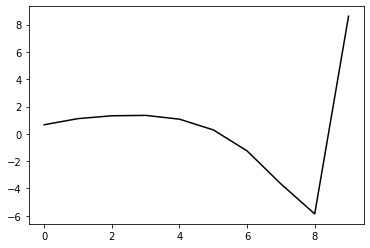

47300 0.6215788021332974
1.2856392484147823 0.887167243724426 0.1481080027252674 0.28488971853168926
[ 0.86105972  0.93297816  1.11197063  1.12903338  0.84600977  0.06219478
 -1.48401964 -3.92609086 -6.17416027  8.63810744]


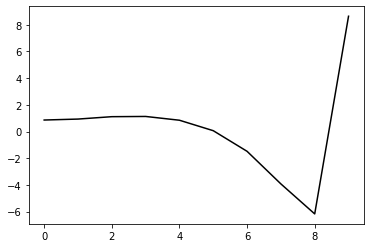

48400 0.7517921932382462
1.3018942160071918 0.8837116433753853 0.14905510743851866 0.2998684546646958
[ 0.95250052  0.86670728  1.0735062   1.10774962  0.84914145  0.09273181
 -1.43182596 -3.86790078 -6.11734689  8.58956976]


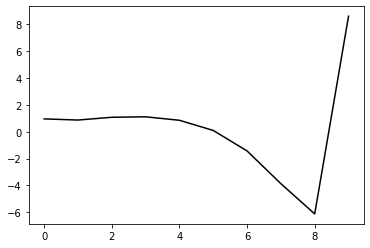

49500 0.4867359009796706
1.3005148148529142 0.808555727827421 0.1823836426746697 0.26823229787664815
[ 0.75822495  1.04030357  1.22617284  1.24205754  0.97000093  0.20243362
 -1.34044997 -3.81980746 -6.15765689  8.59223104]


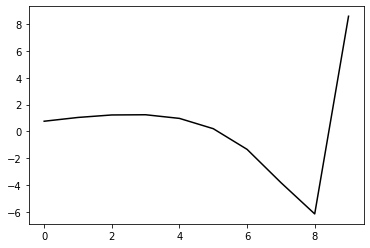

50600 0.4043758449267209
1.320584311471698 0.8005186902064287 0.16845363128370966 0.29387777398982745
[ 0.77837665  1.05215236  1.28440223  1.33389673  1.09601982  0.36600489
 -1.14590764 -3.61357552 -5.94782265  8.66867375]


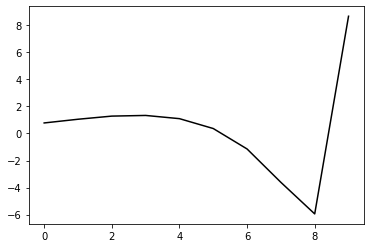

51700 0.39161849306686286
1.3141551936917641 0.645960200444786 0.17783902415280378 0.27613861918131494
[ 0.72674995  1.06970871  1.27267487  1.29662105  1.03302683  0.28165679
 -1.25355101 -3.76380154 -6.16965076  8.57554651]


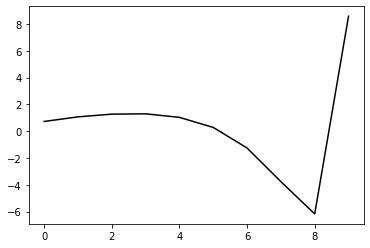

52800 0.6616407301137865
1.3146142236221172 0.6380722946811487 0.1506604366217388 0.31106701470350756
[ 0.81991898  0.99180901  1.22768748  1.27443143  1.03190527  0.30339112
 -1.21282404 -3.72096788 -6.13665486  8.60363844]


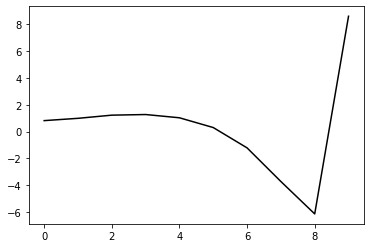

53900 0.350708046528685
1.3339961988687128 0.6029686932732689 0.18840483870581726 0.2864758015744999
[ 0.69675833  1.09969936  1.33778579  1.38976898  1.15195161  0.42954659
 -1.08377435 -3.60768344 -6.0584477   8.5107643 ]


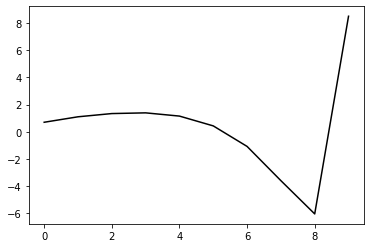

55000 0.8620803637274063
1.3363417684038972 0.6289313378153506 0.1591070530373524 0.3263493264703195
[ 0.89537469  0.91181372  1.19347177  1.28991809  1.09808612  0.42239282
 -1.05004972 -3.5561469  -6.0031029   8.64410855]


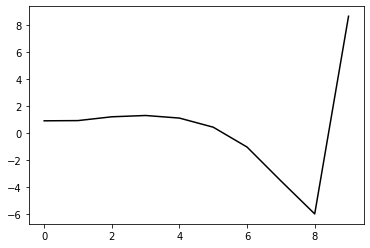

56100 0.34044160213602853
1.3114792372278883 0.5406778909540728 0.19088867000980878 0.29535630970917
[ 0.72508552  1.09816049  1.32970445  1.39818136  1.1799734   0.47844504
 -1.02268549 -3.57788855 -6.12101959  8.58395949]


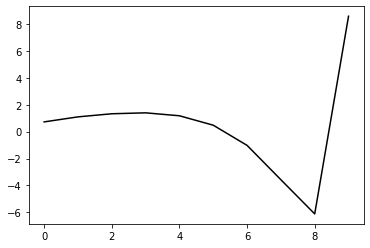

57200 0.2732739885264304
1.307983668362284 0.4632304855550823 0.197206866787064 0.2892831642244714
[ 0.69081573  1.10485461  1.32713463  1.38859795  1.16770108  0.46563066
 -1.03735102 -3.60961806 -6.19255128  8.56364074]


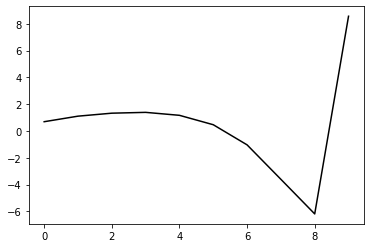

58300 0.32996363851328886
1.3010458186813605 0.44426585732977114 0.18775637530876496 0.309054766314935
[ 0.75376963  1.08510482  1.30153208  1.37026827  1.16176872  0.47427924
 -1.01614655 -3.59297147 -6.20357436  8.6283609 ]


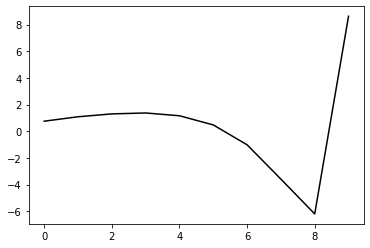

59400 0.3161200968301174
1.3044988900760832 0.44032895297986463 0.20037077627101843 0.3093222170620796
[ 0.71942414  1.15312511  1.37975548  1.45357333  1.25426675  0.57797043
 -0.90423826 -3.49225186 -6.14753776  8.56595199]


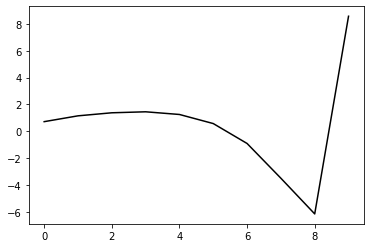

60500 0.4419802819280461
1.2837999760047683 0.4347521008065316 0.20937152612387633 0.3016285297471262
[ 0.70126247  1.13479384  1.36640272  1.43125733  1.22267159  0.53833233
 -0.95588124 -3.58093648 -6.32124073  8.5917486 ]


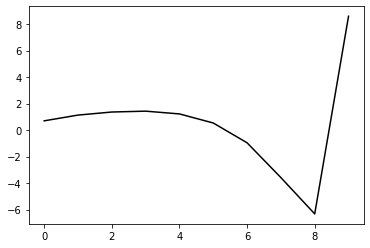

61600 0.3888016327957592
1.2860634456603504 0.38745740177120475 0.2005884380403935 0.3139228623199348
[ 0.75860432  1.06240302  1.30720023  1.3812362   1.18496368  0.51813663
 -0.95778577 -3.58106462 -6.34173852  8.49686949]


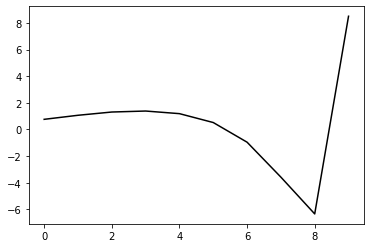

62700 0.3647423252129245
1.2973232718227072 0.3618269788951357 0.19921083696111888 0.32237803919739766
[ 0.7414118   1.07754257  1.32984186  1.42334092  1.24830852  0.605854
 -0.84608276 -3.46206405 -6.23466047  8.57657543]


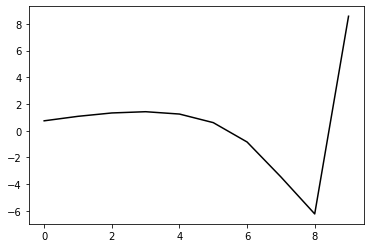

63800 0.3919473212934245
1.244137122108017 0.294986479215315 0.191515150513063 0.3172164799153923
[ 0.78944975  0.95115627  1.14624114  1.20817587  1.00529017  0.33854723
 -1.1377696  -3.80217699 -6.67200909  8.53499565]


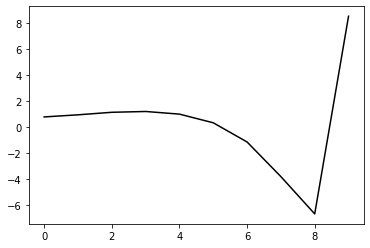

64900 0.3337267112413331
1.3215289627065714 0.3438737277610318 0.19890575195303667 0.3384169395481271
[ 0.72836103  1.1299919   1.39925136  1.5225155   1.3892199   0.79255752
 -0.61883156 -3.23740082 -6.07963241  8.60431285]


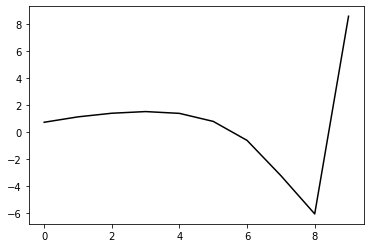

66000 0.4200061090487888
1.2907687663404628 0.32355385184079494 0.20960587567418104 0.32188639489122
[ 0.69636171  1.09098656  1.3290121   1.43144443  1.27856928  0.66532952
 -0.76539145 -3.43126076 -6.37494582  8.56949293]


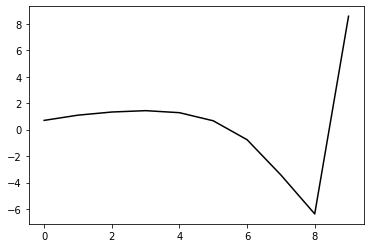

67100 0.41682547647763046
1.1963131222755212 0.15099872493447072 0.20234377800859357 0.29901879713959256
[ 0.78127467  0.91954392  1.09759471  1.1522189   0.95611525  0.30427801
 -1.16412947 -3.88638369 -6.94454609  8.49731575]


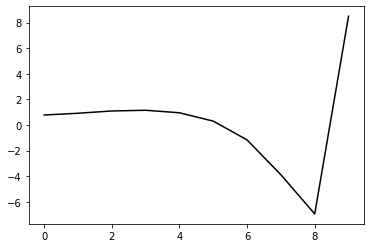

68200 0.33011244547654617
1.2448202832908921 0.08761732101473602 0.20822306981328376 0.3129514993684024
[ 0.77630431  0.98466071  1.18956079  1.25964568  1.08447567  0.45657107
 -0.98670007 -3.68979225 -6.72902857  8.54878029]


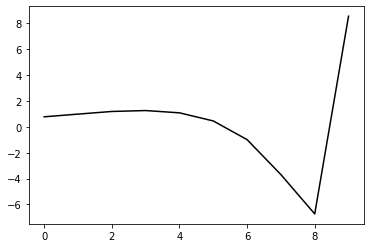

69300 0.29980491843971324
1.2509070475416697 0.0077705101540956265 0.21042801300325278 0.31456483930399387
[ 0.73490436  1.04755708  1.25676443  1.33308405  1.16608168  0.54951918
 -0.88192265 -3.58373647 -6.64094972  8.47888979]


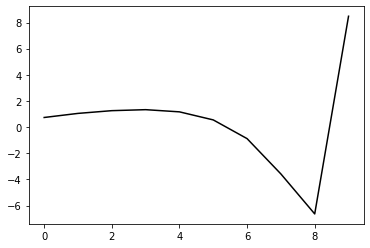

70400 0.4550760789081655
1.2857045270558947 0.0031721853595547567 0.1990341516982801 0.3467557099719083
[ 0.80988333  1.03581089  1.28804834  1.39221476  1.25518969  0.67251611
 -0.7233435  -3.39719231 -6.43468686  8.5802985 ]


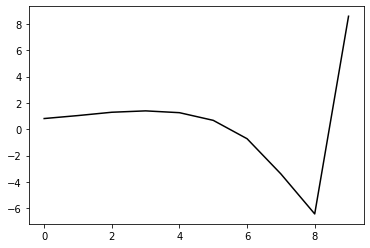

71500 0.42368609351951586
1.2571626852566495 -0.10347514048673237 0.21848909218441948 0.32815278636555006
[ 0.70707576  1.13312331  1.36393242  1.45039773  1.29319303  0.69122768
 -0.72482708 -3.43353523 -6.54630896  8.53645822]


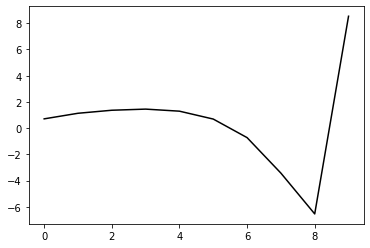

72600 0.32142449784254984
1.3012995647911652 -0.10429128873803949 0.20951591837497052 0.3602187342775119
[ 0.71843844  1.18418407  1.46867106  1.60062736  1.48817225  0.93268147
 -0.43653396 -3.10694069 -6.19001468  8.62320638]


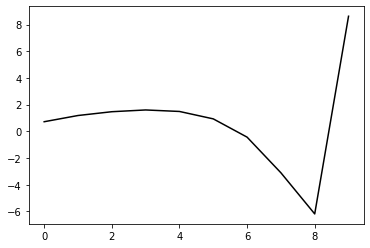

73700 0.44035772937185963
1.2184102218378003 -0.3641719744211958 0.23982584753268402 0.3173131807105046
[ 0.71345496  1.05366896  1.30074206  1.39072086  1.23100378  0.63029225
 -0.78144441 -3.50538359 -6.67555479  8.4707243 ]


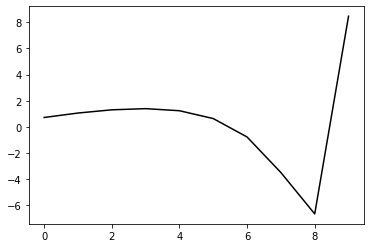

74800 0.27275428842672084
1.1138436585105835 -0.6997745688077487 0.26419996068051654 0.3324837490556819
[ 0.77492517  1.00440421  1.23741515  1.33480582  1.17997535  0.57912861
 -0.83894659 -3.58523833 -6.80838248  8.53207872]


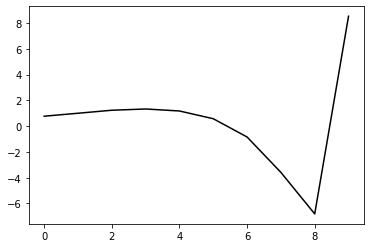

75900 0.33320441513825017
1.1233356759930497 -0.7103655242690147 0.28396045080529864 0.34494642248523016
[ 0.82289285  1.04551027  1.29813315  1.46571253  1.39777926  0.8905792
 -0.43778892 -3.12266842 -6.33305463  8.5599806 ]


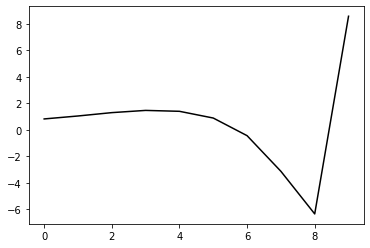

77000 0.3544367321152469
1.0866387684640364 -0.7223036481691049 0.3003903618336768 0.33222150774181664
[ 0.86346184  1.07303142  1.27515362  1.44971702  1.41913563  0.96145836
 -0.31741881 -2.98240904 -6.23861706  8.58359172]


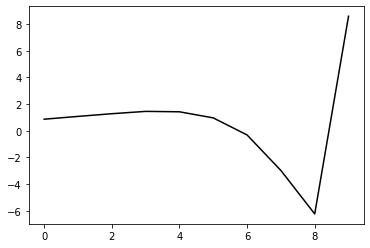

78100 0.3294260925141362
1.0757317828761057 -0.71649771382096 0.29913528457502003 0.3637735140677942
[ 1.06058006  0.95482315  1.1719679   1.37169413  1.39582349  1.00686283
 -0.2017428  -2.81621182 -6.06768707  8.68871031]


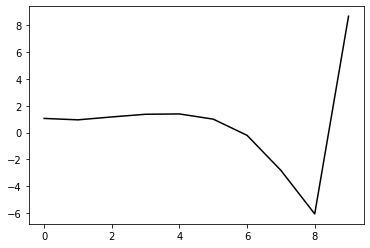

79200 0.2370740039676238
1.081052159953958 -0.6296249866091019 0.2833726314429805 0.3319569427766176
[ 0.91586122  1.11760269  1.25670706  1.40881992  1.3995677   0.98662532
 -0.24412001 -2.90029793 -6.26682872  8.57043197]


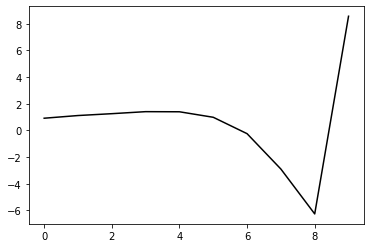

80300 0.19201654847384564
1.075756105506453 -0.6398253521484765 0.2896681182170828 0.34326741904511915
[ 0.98124287  1.12841578  1.30026517  1.46994964  1.49605097  1.13060167
 -0.04960014 -2.66736722 -6.0278228   8.65011272]


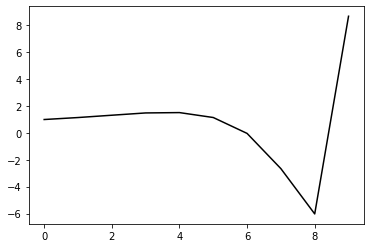

81400 0.15378222250401194
1.0731567469997159 -0.650346792389985 0.29924327051202904 0.3486131413441508
[ 0.95565745  1.21269752  1.40656748  1.59317843  1.65018508  1.32924484
  0.1941057  -2.4019109  -5.80027553  8.59113556]


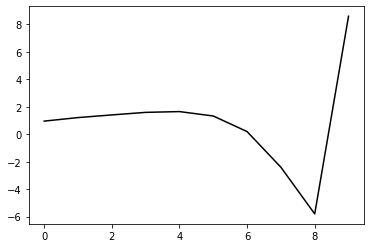

82500 0.2604907674199964
1.044237706219093 -0.6498618248789815 0.30327096411953075 0.3422322769088104
[ 1.00885546  1.19662844  1.3839853   1.56567198  1.62537299  1.3195431
  0.20495727 -2.38574271 -5.82833058  8.62925583]


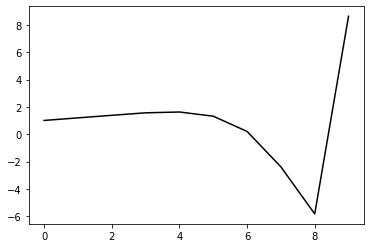

83600 0.18721232202946542
1.0229970048633763 -0.6518418136047045 0.3105103702913026 0.3457104623636809
[ 1.03452817  1.25826184  1.45819402  1.65774357  1.74348766  1.4704125
  0.38423653 -2.20388077 -5.70691781  8.60884087]


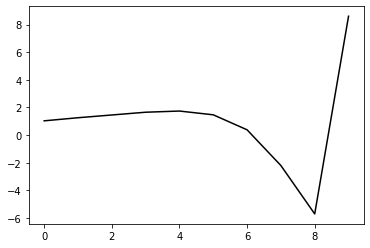

84700 0.25440128213194146
1.0375849772796268 -0.6531276190738543 0.31056697973010816 0.36130416560160833
[ 1.08938662  1.27451757  1.50061308  1.70691602  1.80423269  1.55287328
  0.49458253 -2.07175101 -5.57347207  8.66072786]


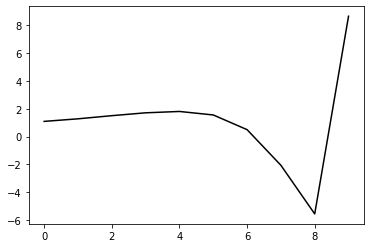

85800 0.8248585076476986
1.015854907096916 -0.6501399131226583 0.2984382621113788 0.37626406786434546
[ 1.23133624  1.11423035  1.35290013  1.55754378  1.65151376  1.40618493
  0.36270489 -2.19179591 -5.70349575  8.70518827]


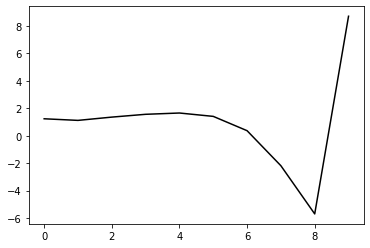

86900 0.2839172099941021
0.9511683334451715 -0.6572452210957672 0.32034142953746114 0.32897328550940513
[ 1.01179227  1.31731021  1.48095989  1.60974143  1.6198231   1.291967
  0.17008213 -2.47248333 -6.12285427  8.61436973]


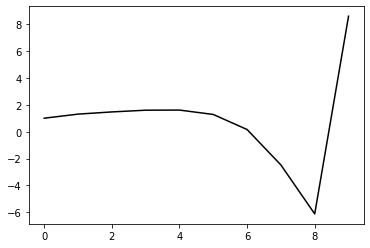

88000 0.4664601499060312
0.9992875954417101 -0.6286216647546184 0.30838522609419017 0.3559610053250672
[ 1.15918085  1.26890158  1.504737    1.693919    1.76773909  1.50894824
  0.45740619 -2.12498349 -5.73872399  8.61737507]


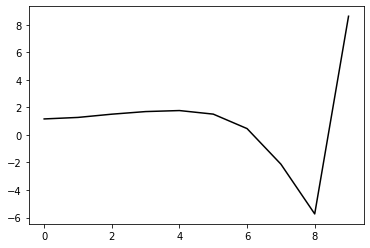

89100 0.19821665057193769
1.0179573546659808 -0.6197522719099687 0.3131860352576271 0.34858728071059136
[ 1.07555177  1.40952438  1.66612128  1.86916668  1.95330463  1.70769901
  0.67206486 -1.90338286 -5.5403403   8.64745359]


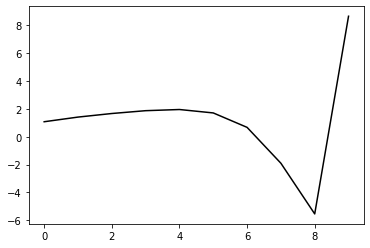

90200 0.30758803487276054
0.9255178355558501 -0.6637631310202843 0.33300022320805045 0.34049143314523667
[ 1.17160341  1.22893072  1.45668365  1.63704836  1.68997004  1.41581069
  0.36173097 -2.23026648 -5.90542392  8.60509073]


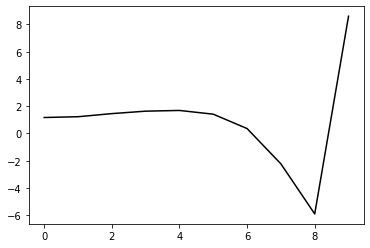

91300 0.15345376629939636
0.99405195896126 -0.6212464096299726 0.3259160638517264 0.33926730339486505
[ 1.1164624   1.40940164  1.68964594  1.92486795  2.03742606  1.82478536
  0.82971919 -1.72335071 -5.41231221  8.56220672]


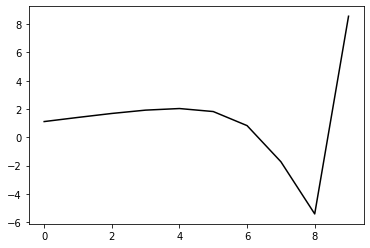

92400 0.17379144770695734
0.9613652486550078 -0.6190685061657711 0.32446711855834093 0.33490178857757097
[ 1.13403707  1.38002406  1.63646497  1.84220489  1.91951314  1.67173197
  0.6471961  -1.9381704  -5.69191128  8.60144164]


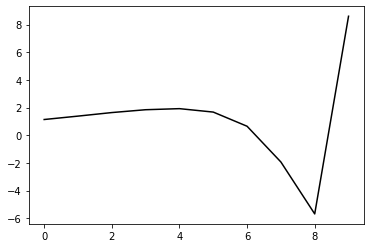

93500 0.21948376672978817
0.9486065026803713 -0.6319157309554769 0.3355919639050096 0.33003783837659223
[ 1.08276779  1.45956384  1.71679012  1.91592266  1.98320976  1.72548035
  0.69541565 -1.89848032 -5.68640955  8.64351083]


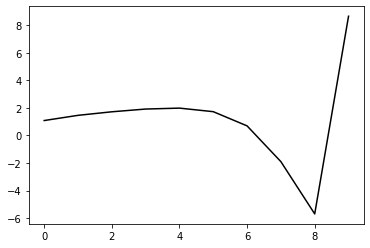

94600 0.199869755822846
0.9284122455618544 -0.6233818949632803 0.32759438128901164 0.3355931277962887
[ 1.12996348  1.44317616  1.67905061  1.86183565  1.90904018  1.63062939
  0.58521531 -2.02389791 -5.84737443  8.58207546]


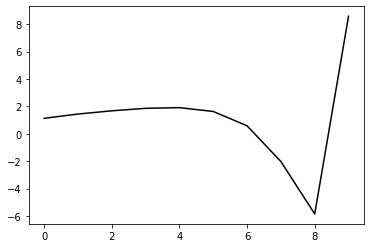

95700 0.1967986639867199
0.9256910381455001 -0.6166220150440195 0.3329878106930767 0.32625322443954496
[ 1.12651478  1.46159222  1.71838884  1.91264786  1.97241714  1.7098539
  0.68488578 -1.9100722  -5.75710022  8.66406839]


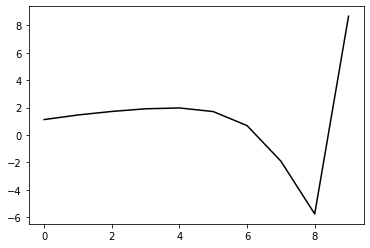

96800 0.23393689330848563
0.9147171897493654 -0.5990908969968682 0.32094265969459596 0.33845409603946924
[ 1.18464362  1.4321518   1.69448649  1.88913836  1.94720617  1.68430666
  0.6631882  -1.93034031 -5.80282295  8.53767569]


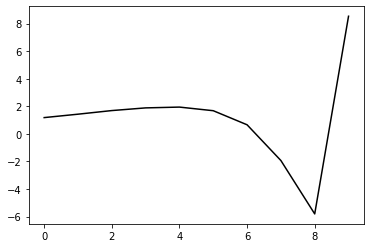

97900 0.2639858886019566
0.937148752949715 -0.6011956580655482 0.3373144359970731 0.32640319746268837
[ 1.1050231   1.55563508  1.86231038  2.0940205   2.18674834  1.95803798
  0.97176591 -1.59336882 -5.46747888  8.65986984]


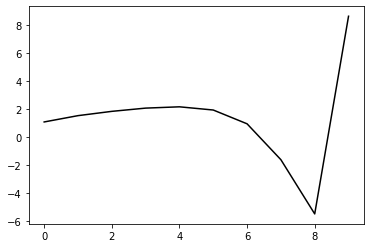

99000 0.519290153628746
0.9219536149644151 -0.5793583190886594 0.323760379312608 0.3347372702010132
[ 1.25579755  1.42202873  1.72400994  1.96164504  2.06107518  1.84340458
  0.87535024 -1.67261799 -5.55539181  8.64447783]


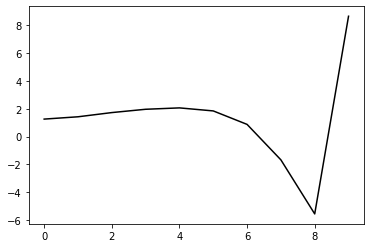

100100 0.20404459177989834
0.9117057689307518 -0.585627437073015 0.33642538735368405 0.3202527704765766
[ 1.14219662  1.56254437  1.85716534  2.08541317  2.17258607  1.9416019
  0.96370427 -1.59507722 -5.51433011  8.67225225]


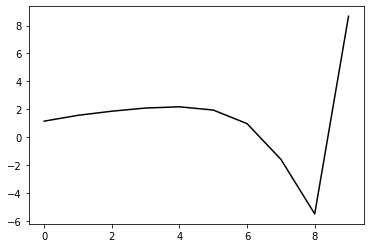

101200 0.20238468844263843
0.8656511256135101 -0.5922895643766025 0.34249569383701767 0.3040934429098832
[ 1.12899979  1.53562472  1.8065555   2.00383825  2.05220887  1.77823375
  0.76024189 -1.83740432 -5.81943168  8.55307255]


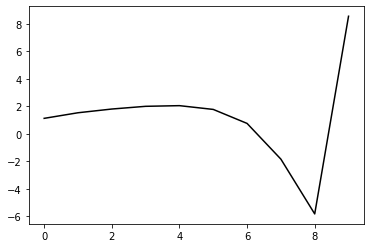

102300 0.16273474120802
0.9203432615371745 -0.5521345049761915 0.32694848667885645 0.30584048807626424
[ 1.11095046  1.60650248  1.89305563  2.10200613  2.16518926  1.90910591
  0.91392372 -1.6621384  -5.65026754  8.65052498]


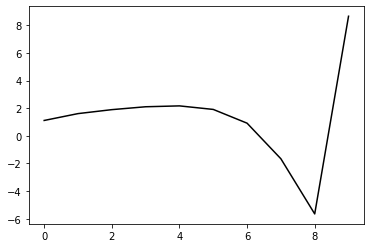

103400 0.1741353115954905
0.8865215604338783 -0.5627877717204277 0.32704115182843985 0.31902470972034547
[ 1.18785972  1.53487075  1.83630416  2.04580446  2.10215122  1.83584252
  0.83346258 -1.74613728 -5.7543752   8.60712303]


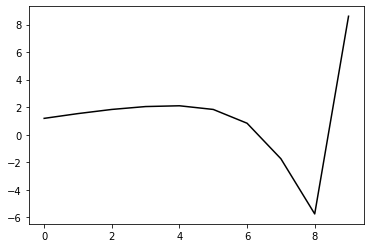

104500 0.2693395708710692
0.8490392053478661 -0.5793275801499663 0.3378636155569895 0.313785957544641
[ 1.22836551  1.3962185   1.71434409  1.92960774  1.98317272  1.71171635
  0.7070128  -1.87455113 -5.91281246  8.68190122]


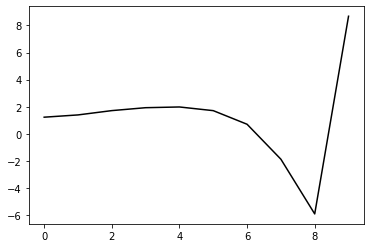

105600 0.6061731544200822
0.8976529811109988 -0.5501359983462094 0.32501193122860855 0.3338246470333245
[ 1.29473236  1.4810482   1.84946385  2.133977    2.2577484   2.05274984
  1.11020992 -1.41802212 -5.4350724   8.66120673]


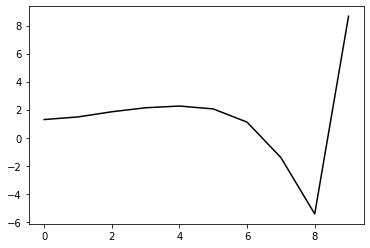

106700 0.24146313211839504
0.8304695080555329 -0.5518115022313617 0.3292081919311215 0.3081369276303572
[ 1.19318332  1.49431262  1.76080766  1.94701404  1.96416337  1.65813669
  0.63880243 -1.93936774 -6.00682751  8.59890369]


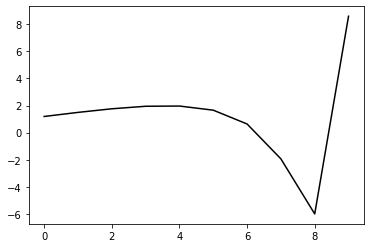

107800 0.21729640757687246
0.848203866178957 -0.5452140577647969 0.3263170829847221 0.31376702808619616
[ 1.1821643   1.55078137  1.83263387  2.02153336  2.04005039  1.73122034
  0.70910459 -1.86955281 -5.9506632   8.65466511]


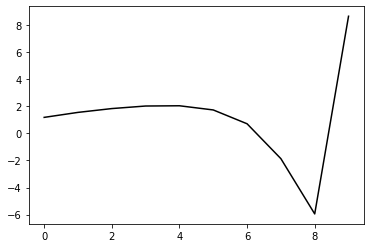

108900 0.24494465015479627
0.8642979186169825 -0.5394005554786265 0.32673136893766475 0.31747898147624104
[ 1.19232643  1.57964711  1.89492517  2.10088984  2.12969589  1.82616068
  0.80913563 -1.76251114 -5.85225402  8.63604369]


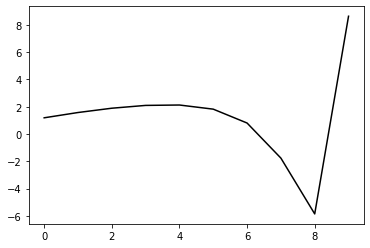

110000 0.2586144754792811
0.7966302724355291 -0.5733049991333484 0.34793166008054754 0.305573477442815
[ 1.16770029  1.56460779  1.86720485  2.05779529  2.06457075  1.73523672
  0.6937763  -1.89885383 -6.02458043  8.56493812]


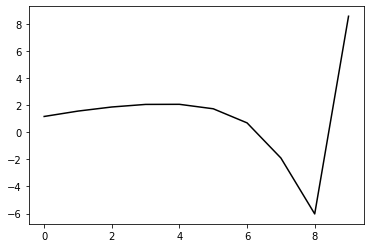

111100 0.5947855303293953
0.8320856883945108 -0.5750400967510407 0.3590445755869339 0.31534666266901007
[ 1.07452365  1.74698646  2.10232517  2.33407838  2.37459404  2.06904212
  1.04344622 -1.54064515 -5.68495353  8.65115174]


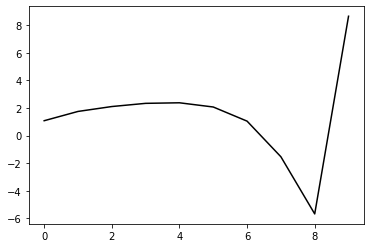

112200 0.1735436942635465
0.8278507971979739 -0.5636630545466877 0.35137630865740777 0.3222582374378113
[ 1.18569813  1.6546218   2.02519582  2.26745711  2.32041452  2.02957681
  1.02187673 -1.542124   -5.6851868   8.68930489]


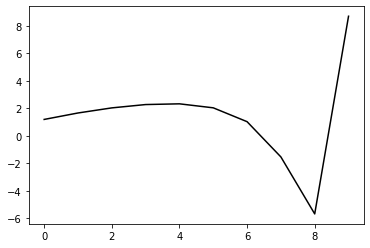

113300 0.18713267293035257
0.8029889959101489 -0.5520285233286241 0.3497006866316375 0.30249908439765477
[ 1.14458896  1.63820654  1.98185435  2.20561534  2.23835237  1.92931761
  0.90836705 -1.66691033 -5.85298114  8.60830897]


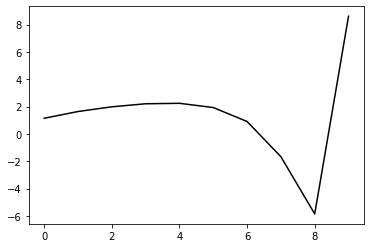

114400 0.18232539597605538
0.8057528292080137 -0.527296609053986 0.3333819913304257 0.31394162424232935
[ 1.21850416  1.6073777   1.95971377  2.19343967  2.23514302  1.93149991
  0.91315355 -1.66169717 -5.86849379  8.53634161]


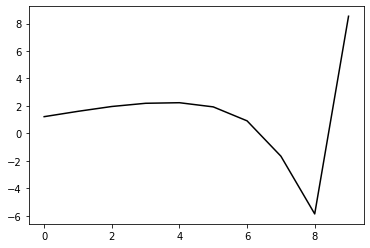

115500 0.2154716063075363
0.8054857228173898 -0.5342995438070168 0.34083463114852247 0.316719363042981
[ 1.17301835  1.6417437   2.020255    2.27395805  2.33241063  2.04107151
  1.03180848 -1.53531304 -5.75709273  8.62971735]


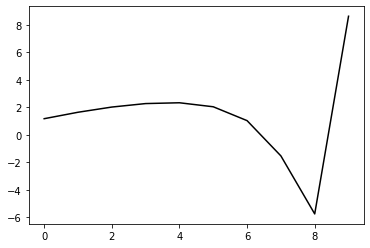

116600 0.13727499875384963
0.7946252480890768 -0.5451281737057816 0.3470224970709285 0.3217679620814305
[ 1.13003233  1.77528141  2.14631599  2.39727342  2.44524779  2.13257113
  1.09476107 -1.50100739 -5.76342406  8.6053413 ]


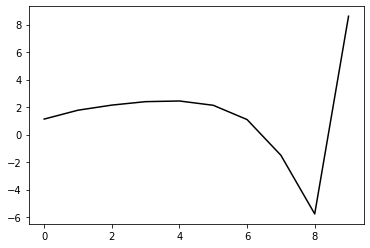

117700 0.8264299384827347
0.8023785733283884 -0.5170963252015359 0.3229256641087439 0.3489168218306891
[ 1.33005695  1.58931345  2.01073044  2.29646937  2.38200982  2.10728777
  1.1063102  -1.45282738 -5.69659019  8.68838591]


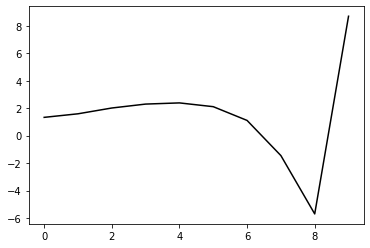

118800 0.23107264317834297
0.7481202563505687 -0.5330136958378295 0.335225134089952 0.32525502081921864
[ 1.20871606  1.55432205  1.90921295  2.12574769  2.13717511  1.79394739
  0.73633805 -1.86703429 -6.17054629  8.62844273]


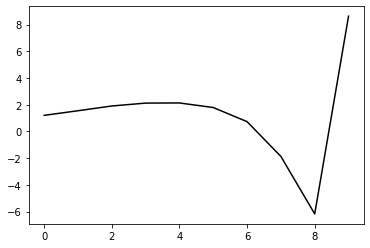

119900 0.2182490618809617
0.7954925028997262 -0.5070318900887341 0.32989899147618773 0.3203542197034617
[ 1.16190328  1.61350571  2.01263049  2.25868349  2.29338117  1.96636928
  0.91864103 -1.67961097 -6.00297759  8.5832221 ]


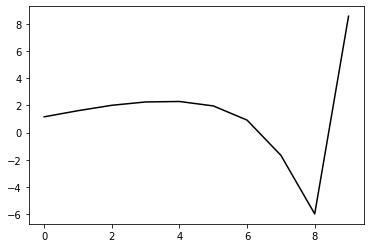

121000 0.3109943887060175
0.7148799762208912 -0.5545962587413537 0.3607376547704454 0.2989677997422488
[ 1.13820871  1.56178559  1.93076391  2.16645824  2.18014571  1.82609599
  0.75181741 -1.86864154 -6.23381315  8.59353393]


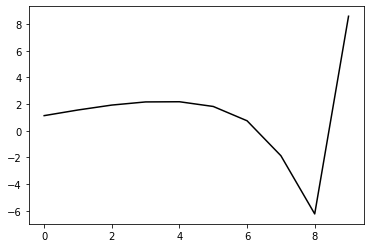

122100 0.19269088003333676
0.7836555356353226 -0.5229836091897102 0.34652563457816254 0.3254673868536744
[ 1.19374324  1.67567436  2.12085668  2.44566052  2.54607653  2.26040239
  1.2354904  -1.34946919 -5.7050534   8.68982154]


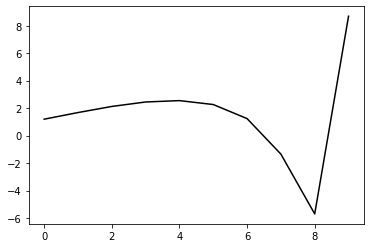

123200 0.30761575470112773
0.7904785475376082 -0.5120344069104084 0.3482779385715057 0.3056505996268558
[ 1.10754351  1.72943986  2.1335127   2.4260691   2.50413458  2.20109519
  1.1623844  -1.43275593 -5.82050919  8.57612741]


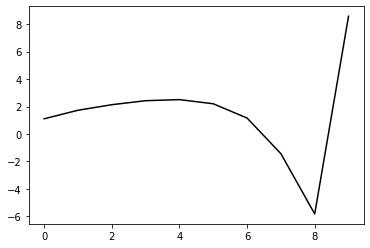

124300 0.16296883285717292
0.785507055695581 -0.5019111060004348 0.3399368787667088 0.31664623212963355
[ 1.19262598  1.69042032  2.10153771  2.40141486  2.48830532  2.18871572
  1.14780885 -1.45061525 -5.85667692  8.61222757]


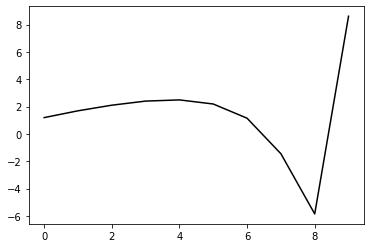

125400 0.18109541831842615
0.7441760176087434 -0.5096024671475728 0.34114537116962784 0.3175165653204539
[ 1.20818794  1.64868849  2.04056022  2.3299849   2.40978331  2.10318207
  1.05283613 -1.55537698 -5.99042186  8.59272533]


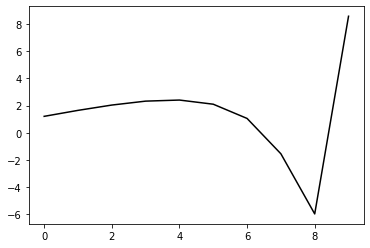

126500 0.21742963689110428
0.7617662051265289 -0.5006058767480311 0.34412118254492663 0.3084417753929387
[ 1.15832635  1.70877341  2.10945386  2.41007289  2.50495333  2.21214019
  1.17036076 -1.43319575 -5.88457987  8.63752723]


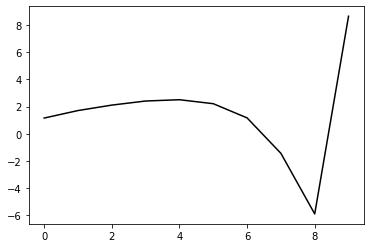

127600 0.40451176532046296
0.7563827520884243 -0.514879564174204 0.35627120846601285 0.30831078287751756
[ 1.10521264  1.77608206  2.19044243  2.49896251  2.60323659  2.32194178
  1.29052811 -1.30215708 -5.75514027  8.5887546 ]


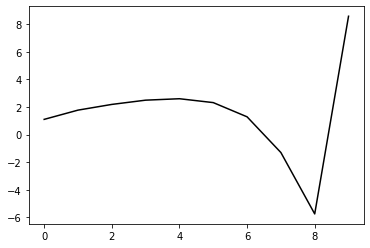

128700 0.4260493690602443
0.676795787360881 -0.5414689333789778 0.37478421376971555 0.294638245153376
[ 1.16961455  1.4990646   1.89286239  2.1940787   2.30731694  2.04661544
  1.03794271 -1.53505858 -5.99388944  8.64596747]


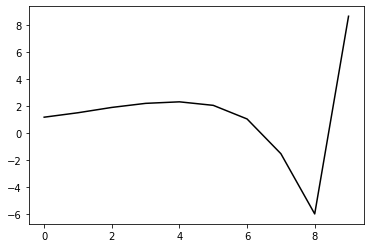

129800 0.18928752305037724
0.7726236596564783 -0.4649490907221155 0.33583262068667574 0.29844136193376436
[ 1.17914084  1.64049364  2.00779048  2.29908544  2.41347137  2.16016195
  1.15939284 -1.41075913 -5.9011062   8.6772863 ]


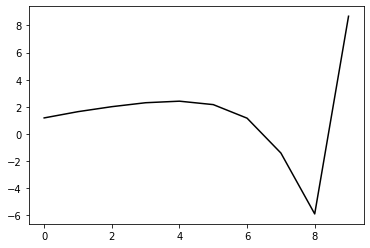

130900 0.3103964811373545
0.6316217611624069 -0.5195446706526029 0.3576308823155958 0.2988783408025507
[ 1.1786288   1.52996616  1.86508264  2.11964435  2.19465381  1.90348373
  0.8662331  -1.7386556  -6.28307856  8.58740018]


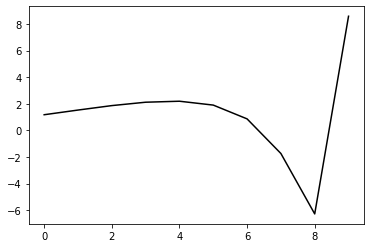

132000 0.2063245942429348
0.7588464137320154 -0.46773829414136675 0.3421763683258404 0.3006113875212434
[ 1.19439114  1.68489896  2.08058076  2.37115976  2.47995149  2.21785707
  1.20220336 -1.3871581  -5.92809799  8.59282858]


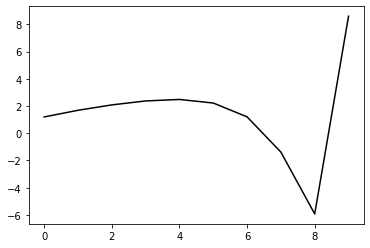

133100 0.3204765902346715
0.7006214498487207 -0.47333343729116645 0.33652413287769944 0.3074727245381061
[ 1.26652102  1.52060145  1.87923357  2.12782616  2.19777716  1.91061521
  0.882417   -1.7096513  -6.25669428  8.62783   ]


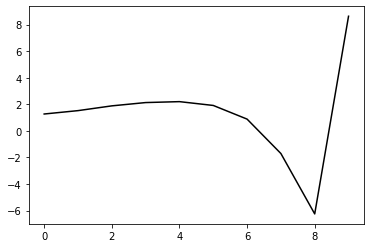

134200 0.2017065663685054
0.6882728262238434 -0.4943478728150447 0.35542742220862394 0.2978202252672341
[ 1.15331646  1.71525189  2.08435584  2.33110145  2.38503094  2.07478926
  1.02172024 -1.59442231 -6.17376075  8.57059138]


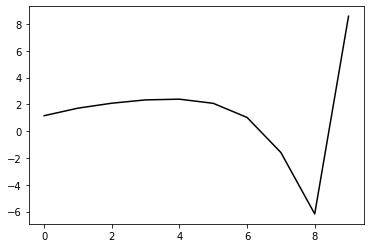

135300 0.16087809726193586
0.7487551894157258 -0.46668650170360704 0.3413581645773608 0.32346052214874704
[ 1.21505879  1.75045153  2.21853772  2.52540193  2.62559616  2.35088971
  1.3232533  -1.27591014 -5.85744403  8.61600526]


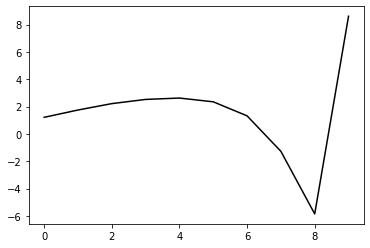

136400 0.21933311510837786
0.702126225563822 -0.48057384361134736 0.34691650358996895 0.32146873175148344
[ 1.27109649  1.55984997  2.0197144   2.32725636  2.42149882  2.14442944
  1.11936657 -1.47637507 -6.07693726  8.65504839]


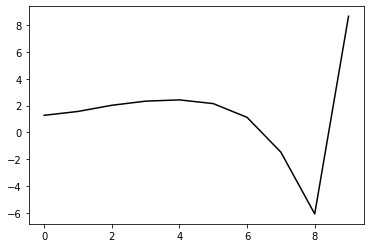

137500 0.17304145736153084
0.7597851133548101 -0.45253086752083677 0.34422521615502044 0.31416247078427584
[ 1.18011495  1.78671943  2.26798108  2.61913675  2.75294631  2.50571501
  1.50141278 -1.08408086 -5.70737518  8.62424124]


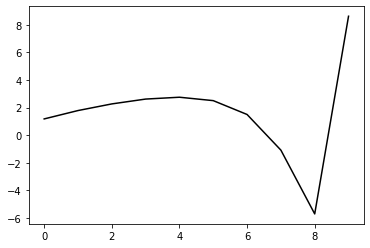

138600 0.22389449316076077
0.7200570019079312 -0.47702866070939215 0.3630902726700152 0.30434866899579155
[ 1.1623051   1.6424039   2.10956259  2.4774068   2.63145782  2.40529671
  1.42327635 -1.1417706  -5.77188283  8.53708736]


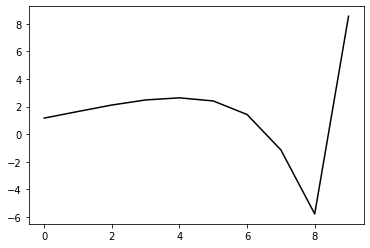

139700 0.17882392260520094
0.7487532999017026 -0.4298974768124993 0.34264949128352706 0.30043298524289225
[ 1.13582962  1.75623206  2.14792017  2.47034969  2.59262423  2.33664024
  1.32695351 -1.26646839 -5.95439214  8.60271345]


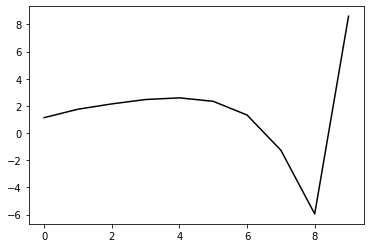

140800 0.2416410748017461
0.6390201764710826 -0.4622022793303469 0.34329199059945426 0.3153399022263403
[ 1.22093209  1.50946115  1.86685544  2.13509914  2.21194046  1.91699
  0.87501527 -1.74404918 -6.46971079  8.55926737]


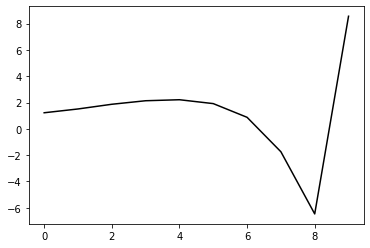

141900 0.3692865549871537
0.7444837302043292 -0.4365776869162122 0.34997358067305673 0.30721220604357197
[ 1.10803396  1.8412175   2.27182121  2.58999923  2.70862718  2.44233852
  1.41544099 -1.19853093 -5.93471056  8.61277581]


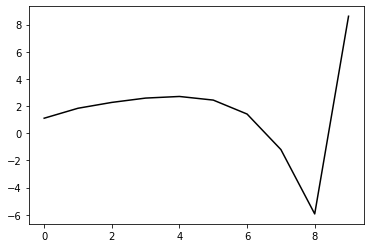

143000 0.2762443380863174
0.6666561256439906 -0.4591813377824537 0.35007241470107764 0.3197908763707411
[ 1.27123685  1.55858453  1.9786061   2.29474307  2.4146877   2.15452221
  1.13465825 -1.47217016 -6.21108378  8.59711044]


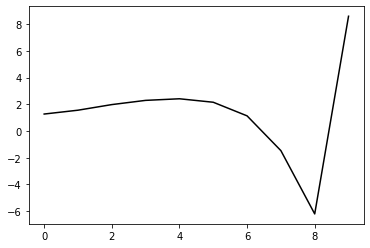

144100 0.20700534382053817
0.7399226026122865 -0.4161792825887187 0.33913490511653166 0.3141468875100528
[ 1.11897623  1.82883629  2.25345154  2.54639701  2.63954532  2.35374037
  1.3096055  -1.32195826 -6.1063581   8.56014354]


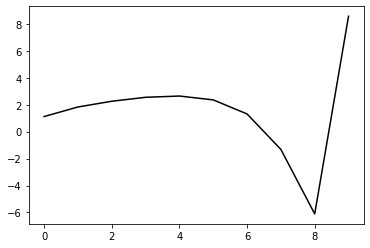

145200 0.23391667108261976
0.697527788169639 -0.4428571475819557 0.3485200591806114 0.31999931095658424
[ 1.2107316   1.61662607  2.06793514  2.37618215  2.48109807  2.21084633
  1.18419291 -1.4281628  -6.2001651   8.5996638 ]


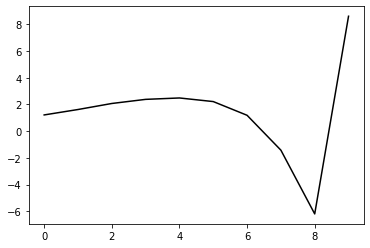

146300 0.18406443124632887
0.6853368272650617 -0.4476053409393653 0.3575504633138361 0.30964825721904815
[ 1.17145635  1.60612445  2.03416817  2.35821034  2.48173251  2.2319693
  1.22486094 -1.37482932 -6.16465927  8.5778108 ]


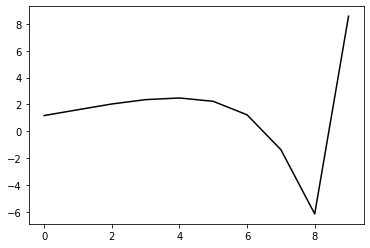

147400 0.16312911311160375
0.6993092927799738 -0.4390798655572834 0.353572821088455 0.32407804839332016
[ 1.17321414  1.68117692  2.14982896  2.50788482  2.66375946  2.44001567
  1.45224464 -1.1345999  -5.93121829  8.51942883]


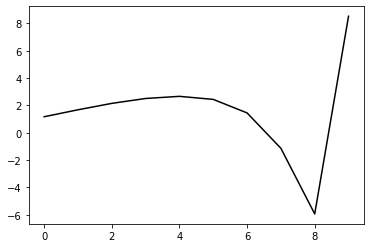

148500 0.17391821778703803
0.704330691785455 -0.43657602322240463 0.3546520742137059 0.3324778428535698
[ 1.19386498  1.71891542  2.216315    2.61901779  2.82237097  2.6422687
  1.69077862 -0.87007433 -5.66944251  8.60437073]


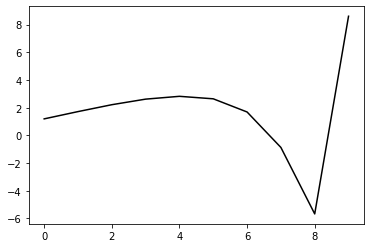

149600 0.5203838042542908
0.6772239754290957 -0.43424255410310764 0.3496354461393939 0.3370532540370608
[ 1.29692572  1.51454962  2.00048938  2.40093651  2.61184059  2.44600496
  1.51244064 -1.02993204 -5.82707665  8.62355465]


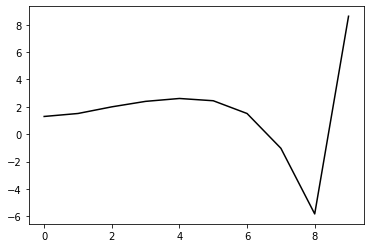

150700 0.1687389254568101
0.6812624530583611 -0.43862224510702086 0.3578180427177758 0.3220269935223374
[ 1.15972236  1.65536066  2.09387771  2.45973038  2.64314813  2.45481922
  1.50374445 -1.05397266 -5.88313848  8.49301175]


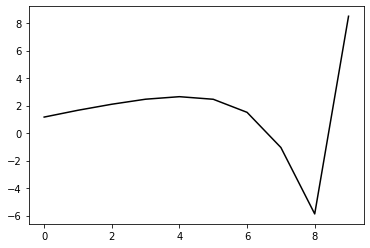

151800 0.19803724540516363
0.6473690021570944 -0.4457049101162652 0.35673186665285245 0.32264752424858767
[ 1.17259736  1.60060232  1.97630073  2.2944869   2.44108489  2.22470086
  1.25445051 -1.31522987 -6.16413015  8.58424497]


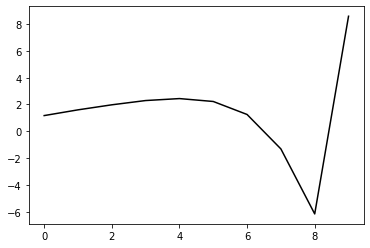

152900 0.3348767564714805
0.5853715876341159 -0.4383317229821804 0.350293616374268 0.31603194821112757
[ 1.18171373  1.50016839  1.8009516   2.04968294  2.14503257  1.89610446
  0.9065556  -1.67733417 -6.55745829  8.51751499]


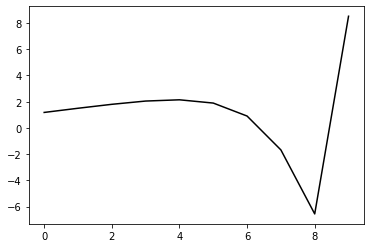

154000 0.19357772851243069
0.6980235895666848 -0.41283214026065945 0.3514471797101316 0.3232309591470703
[ 1.16261728  1.75476707  2.16735943  2.46497844  2.5989113   2.38105079
  1.41484931 -1.15281534 -6.0303402   8.65007176]


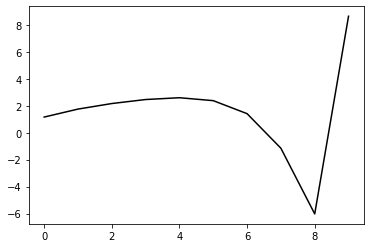

155100 0.34454401667051643
0.5756745494289496 -0.4859560466443745 0.38772876443872395 0.3177420220741466
[ 1.16170703  1.53703187  1.94342731  2.24225419  2.3664034   2.14341426
  1.17712848 -1.38887481 -6.27753936  8.62698603]


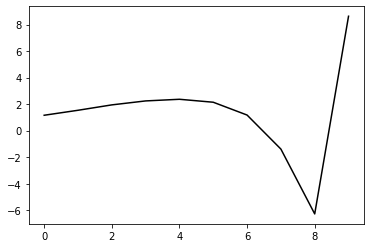

156200 0.3467473139211743
0.5477212020566092 -0.4759021264070846 0.3846437833464341 0.29452569696963765
[ 1.10872821  1.57496595  1.88742635  2.13030801  2.20028103  1.92835327
  0.92074811 -1.68391325 -6.63473152  8.50947463]


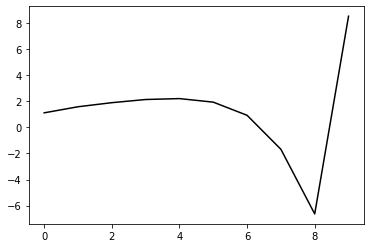

157300 0.1642820189589941
0.6907900521755028 -0.3966789253951002 0.3480013252605757 0.3239462519374113
[ 1.1470553   1.85001151  2.27091525  2.55840675  2.65941429  2.40612719
  1.40952838 -1.18945039 -6.14541308  8.61991191]


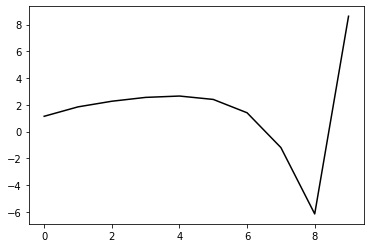

158400 0.2002426496689797
0.658106078463471 -0.4163650632372452 0.36028874817791234 0.31208823050604106
[ 1.14235988  1.76496624  2.19408073  2.4746025   2.56216142  2.29789707
  1.29434725 -1.30982768 -6.27796405  8.51243213]


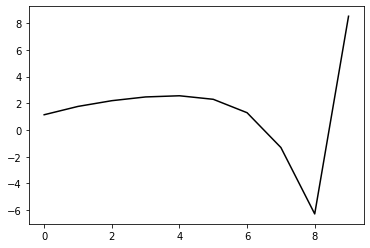

159500 0.2389470286965895
0.6946804986129781 -0.39005630444211936 0.3481991136574384 0.3238592737891746
[ 1.17164574  1.81114046  2.28746195  2.62280607  2.75244876  2.51951262
  1.53938465 -1.05053034 -6.03051537  8.62801648]


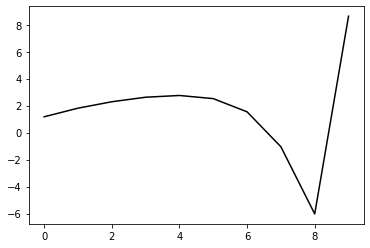

160600 0.12836653443617835
0.6429783605251246 -0.420849831249803 0.36755018840858433 0.32201066655408167
[ 1.20583874  1.62138925  2.11667452  2.4655681   2.59677583  2.36365079
  1.38661529 -1.19866243 -6.18919602  8.56969588]


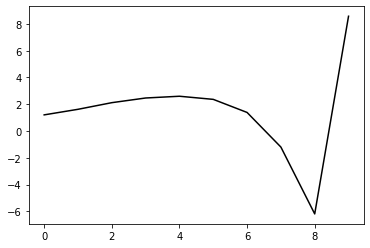

161700 0.17428238892127837
0.63225591075643 -0.4341396937840537 0.376501901010579 0.32514423102844725
[ 1.19518043  1.64037424  2.10258252  2.47659175  2.63881323  2.43165064
  1.4785531  -1.08526584 -6.0679747   8.62948187]


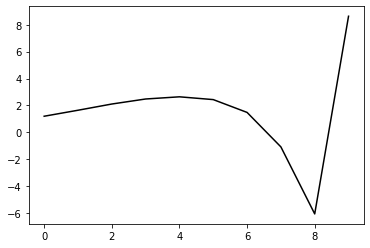

162800 0.297087916151887
0.5898383828538406 -0.42156444741526516 0.3627210534229112 0.32481224866071795
[ 1.31505977  1.39596264  1.78096014  2.10444903  2.23762015  2.0096098
  1.04427526 -1.52565983 -6.52715925  8.62473621]


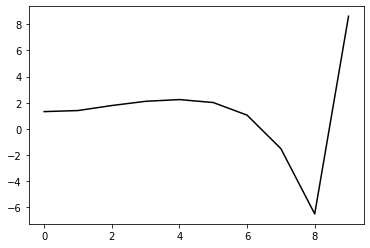

163900 0.3281815403263576
0.5716225147164143 -0.417911019503856 0.3649165497227049 0.30742715767976075
[ 1.21859875  1.56163974  1.91354022  2.20139085  2.3062133   2.0505755
  1.05946023 -1.53552016 -6.57643226  8.54777128]


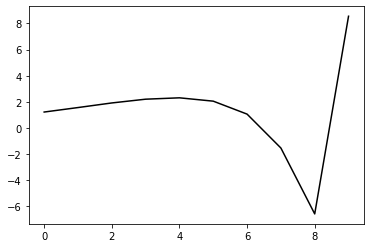

165000 0.5446023369088895
0.6587370294215853 -0.4212572112472412 0.3866481269827449 0.3018016275848571
[ 1.12232914  1.77765742  2.23000909  2.55840483  2.69572478  2.4623939
  1.48415149 -1.10470781 -6.15483216  8.45812247]


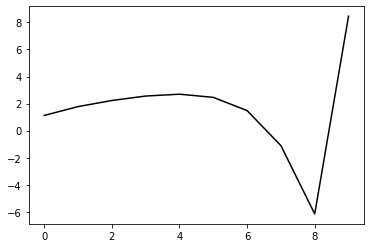

166100 0.1804484719864682
0.6459750273681331 -0.4094890615831231 0.37557278878109024 0.32237668621334675
[ 1.18892655  1.78028095  2.25608241  2.60840922  2.76204056  2.54093002
  1.57060328 -1.01332332 -6.06963583  8.58900833]


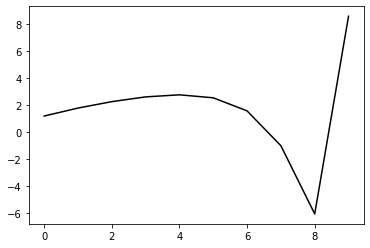

167200 0.21699526754195397
0.6334676111936752 -0.40184429574575187 0.37110178438622105 0.32446653789344104
[ 1.25755051  1.65864792  2.14090998  2.5131489   2.69040396  2.49635051
  1.5512525  -1.01255496 -6.07141264  8.70269431]


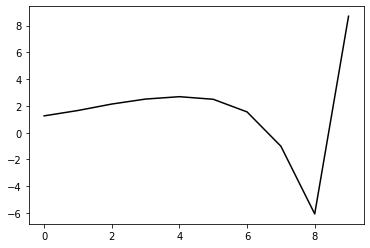

168300 0.1747203244491003
0.6500217897660368 -0.40029700150780007 0.37629817926677517 0.3165893598054908
[ 1.15259474  1.77901236  2.22938642  2.5807762   2.74472059  2.54485964
  1.59960216 -0.96130228 -6.0279273   8.58929621]


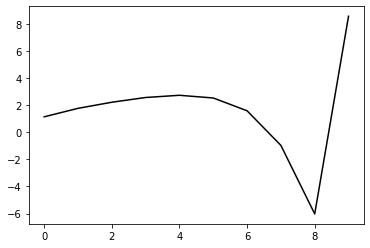

169400 0.18666519306411625
0.629262488948552 -0.38082053220988626 0.36130815833118346 0.32203368609888494
[ 1.23361216  1.68355844  2.0850724   2.40883241  2.55694068  2.35096032
  1.40649355 -1.15021894 -6.21959157  8.56608507]


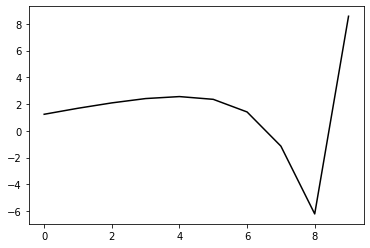

170500 0.26150964786856656
0.626688443731233 -0.36896262938068797 0.3561977129062175 0.3179192552111791
[ 1.21842438  1.66046716  2.0519364   2.35416896  2.48698691  2.27243575
  1.32387373 -1.23574325 -6.32342445  8.50026301]


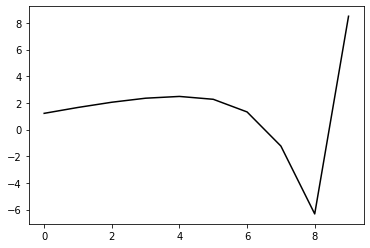

171600 0.6440494271465086
0.6026563820780767 -0.38761166422320026 0.3613128372212751 0.3409097143025806
[ 1.35873541  1.54255345  1.9976608   2.34835448  2.52277305  2.34483339
  1.42677082 -1.10664094 -6.17839404  8.63508772]


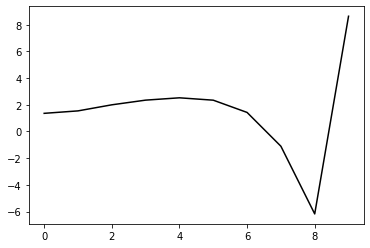

172700 0.19226514168426248
0.6296221375195821 -0.3648881108543584 0.36171050247872083 0.31314797312182935
[ 1.2134822   1.72724844  2.13288585  2.44978422  2.5868287   2.37326754
  1.42462291 -1.13803624 -6.25875395  8.55927628]


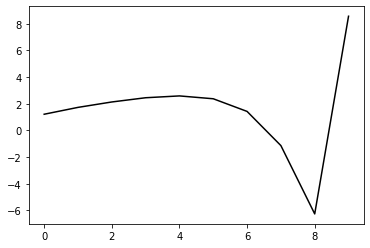

173800 0.191129302528879
0.625163159467546 -0.39077035880633837 0.3799121829431003 0.31240882070368925
[ 1.17898     1.68766668  2.16124603  2.52049758  2.69165765  2.50499695
  1.57665114 -0.97066919 -6.09289608  8.60940544]


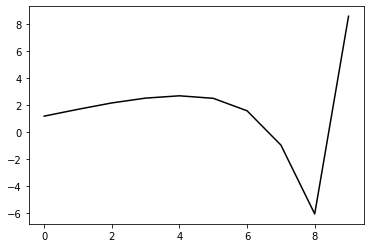

174900 0.20216714475388986
0.6273809733008943 -0.38760036454688424 0.37785058370533403 0.3151537933625263
[ 1.16463927  1.81446071  2.20075151  2.51748481  2.65794392  2.45017139
  1.51058984 -1.03989887 -6.16223425  8.56095598]


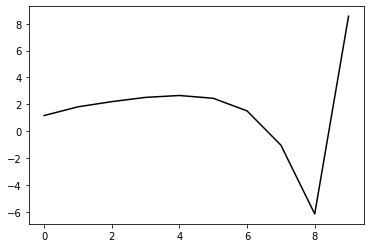

176000 0.2188517872408692
0.622258865593769 -0.39798550931590493 0.3835205530375089 0.31481479347637203
[ 1.18509912  1.80888343  2.2280001   2.53556277  2.66618282  2.4495124
  1.50292635 -1.05131233 -6.17763417  8.59753983]


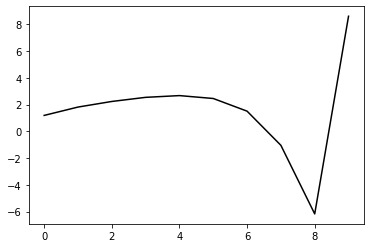

177100 0.32075600837579654
0.6192025198907398 -0.3669272219746361 0.35988836672204705 0.32497154508255277
[ 1.25193686  1.73886309  2.163129    2.46021574  2.5775971   2.35202377
  1.3999923  -1.15891548 -6.30412072  8.47983566]


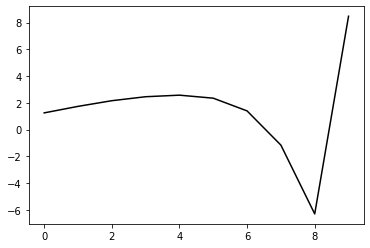

178200 0.19065053802780524
0.627947785188917 -0.3851825347997112 0.38050871327223074 0.3171943381103581
[ 1.16689936  1.84930485  2.30430051  2.62819041  2.76061263  2.54367784
  1.59699294 -0.96034316 -6.12476738  8.59896921]


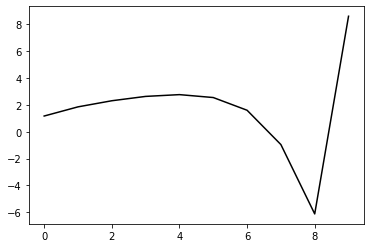

179300 0.22106537217397354
0.6451034847846433 -0.3744570114322702 0.3801608403332253 0.3103201191442608
[ 1.13823973  1.76474214  2.25863944  2.619869    2.78231936  2.59004557
  1.66426081 -0.87833281 -6.05564963  8.60061692]


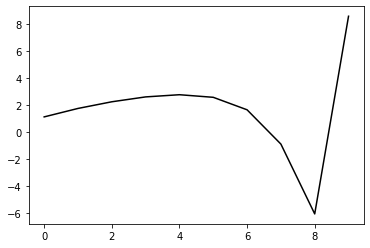

180400 0.5107352332573168
0.6206027573027366 -0.3598909439367831 0.3655054958608222 0.32707476282951775
[ 1.33999521  1.56694178  2.00828509  2.38325006  2.57889394  2.42693281
  1.54364577 -0.95914755 -6.10987757  8.68509588]


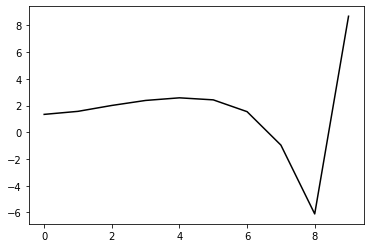

181500 0.2323615455712484
0.6234756966190965 -0.3548071319347654 0.3686459864018853 0.3133388557855719
[ 1.21135243  1.72914891  2.11519532  2.4363832   2.59006537  2.40450546
  1.49625779 -1.02598439 -6.202252    8.56104657]


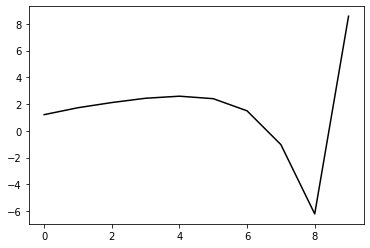

182600 0.17529646999340615
0.5814958684534907 -0.37200330423865247 0.37667276261671667 0.3096928556102387
[ 1.21222303  1.71953422  2.07616747  2.36781828  2.49510986  2.28610954
  1.35873058 -1.17864578 -6.37402256  8.57267492]


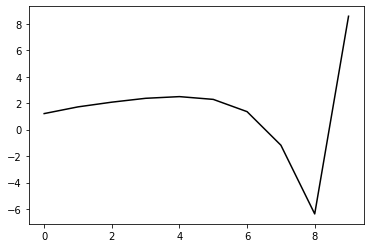

183700 0.32356523975166923
0.6016788143001984 -0.3644847272863126 0.3720998590037372 0.33668350684107173
[ 1.29017472  1.74706526  2.19751259  2.54190287  2.71491031  2.54400165
  1.64683647 -0.86712824 -6.05734823  8.53505667]


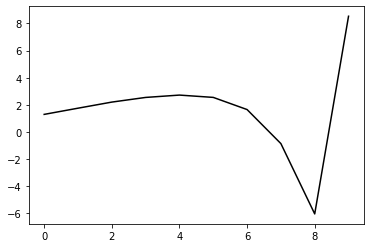

184800 0.23816320602526098
0.6000322949671997 -0.37186790273600523 0.38487234876062576 0.31071217384426664
[ 1.14172725  1.69876899  2.09602345  2.39500106  2.53095342  2.33708626
  1.42733371 -1.09413091 -6.30247636  8.57714387]


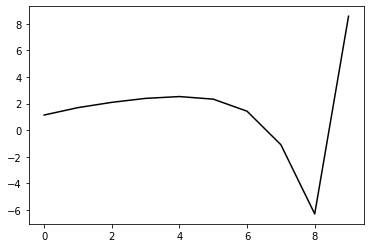

185900 0.9764112550645051
0.5804075095937639 -0.3219062809025743 0.3379792154162991 0.35648234333001133
[ 1.36326325  1.6114867   2.01756778  2.34701833  2.5145203   2.35115534
  1.4695661  -1.02730714 -6.2258661   8.57043367]


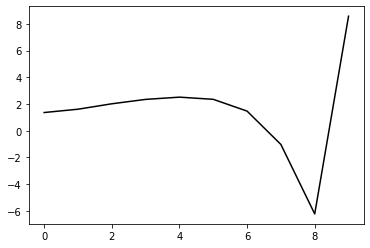

187000 0.2437380219411239
0.589983124853371 -0.36349709919224915 0.38010400332794114 0.31976095531008797
[ 1.23341092  1.64776324  2.06433514  2.38308181  2.53801828  2.36178756
  1.46841666 -1.04011446 -6.26757667  8.59330558]


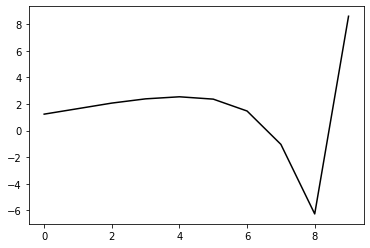

188100 0.2978078770717676
0.566865506502753 -0.384093053248328 0.39392840291879605 0.31573893368214556
[ 1.14358622  1.66798435  2.07469039  2.39311702  2.54708673  2.3708545
  1.47867562 -1.02850611 -6.26606984  8.56054031]


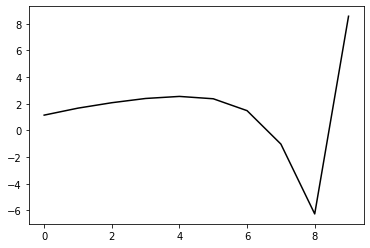

189200 0.28568806165429766
0.5887734256328967 -0.3617395104055294 0.3888907830665826 0.3056068141787245
[ 1.14280111  1.7680432   2.17113039  2.51137099  2.69050198  2.53789407
  1.666807   -0.82519151 -6.07186588  8.53150576]


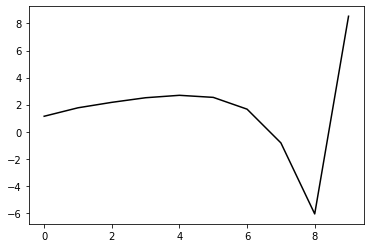

190300 0.13979307722727832
0.5864020190011551 -0.36233525397562877 0.38803693063955297 0.3166811506256275
[ 1.19308297  1.75886202  2.19872915  2.55356162  2.74697751  2.6055776
  1.74322586 -0.74160139 -5.99025677  8.5962637 ]


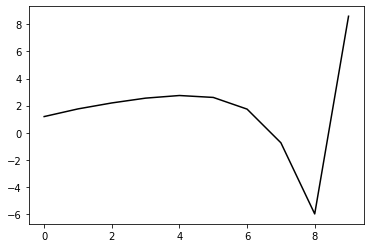

191400 0.22883726368935328
0.5523990251248022 -0.3699187715802538 0.3899736768653652 0.3060650425687295
[ 1.20770334  1.55428143  1.95095769  2.27480622  2.44871854  2.30265615
  1.44515921 -1.03098632 -6.28486661  8.58390165]


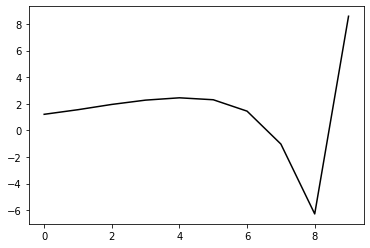

192500 0.692681488298659
0.5940341473427334 -0.37335587017220173 0.40185513372303366 0.3052437974488188
[ 1.06351859  1.80643172  2.25272273  2.61323156  2.80837524  2.67115518
  1.81607362 -0.66135524 -5.93447158  8.65134003]


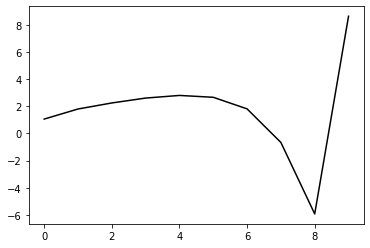

193600 0.13224352316082197
0.5832746558985306 -0.3556388675320521 0.38880027127184985 0.3105070604396705
[ 1.1620963   1.79105162  2.18150871  2.50217949  2.66984527  2.51579843
  1.65218395 -0.82961593 -6.11440016  8.57244447]


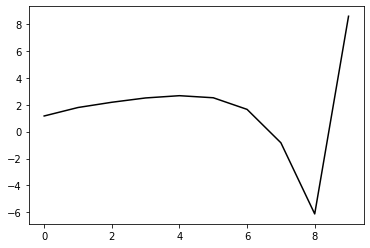

194700 0.24409238371991662
0.5262158340405497 -0.36488347972011964 0.38747086420447957 0.30230415949205935
[ 1.19611336  1.57457413  1.87783833  2.13608046  2.26252253  2.0849446
  1.20998213 -1.27635122 -6.57187316  8.59283984]


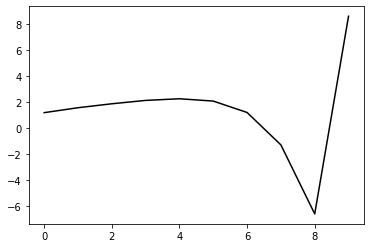

195800 0.6691850405035912
0.5962681437790145 -0.3349658058878279 0.37130961830270637 0.34009656479574757
[ 1.3538855   1.6649354   2.14572817  2.47982707  2.65775132  2.51956413
  1.6753648  -0.78731059 -6.07693921  8.60624476]


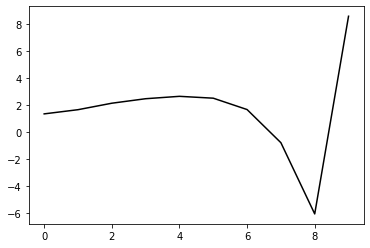

196900 0.29984068584869233
0.5523033563472705 -0.3764047936520337 0.4030493166091859 0.3095315153555052
[ 1.17539398  1.69901014  2.12278915  2.40159034  2.50563411  2.30286513
  1.41230177 -1.08232437 -6.4051688   8.54593836]


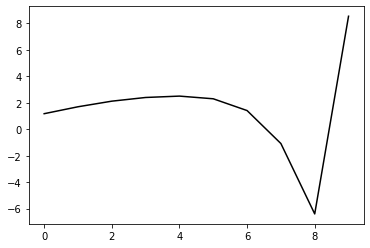

198000 0.34233806124162236
0.519594810451368 -0.36364201293473086 0.38252888309256267 0.3381183354287594
[ 1.30614878  1.47176814  1.89604478  2.19799438  2.3159028   2.12139266
  1.2402157  -1.24320623 -6.56151117  8.59878424]


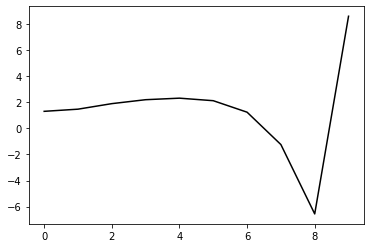

199100 0.19907008744764434
0.5968957420160073 -0.35052882320303824 0.3902192370455156 0.32041940467295005
[ 1.22967262  1.74348477  2.19993961  2.53657189  2.6776437   2.48995331
  1.6096107  -0.87541891 -6.20757427  8.58174297]


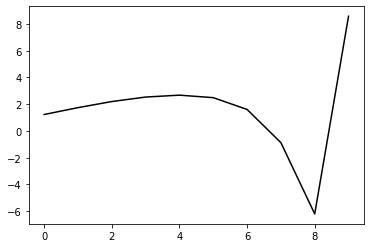

200200 0.17569045034446049
0.6323404078826529 -0.32757689162230574 0.37873353658039494 0.3151371353800831
[ 1.19505903  1.82728341  2.28697412  2.61191201  2.74046558  2.53596846
  1.64068349 -0.85526111 -6.2059331   8.56561663]


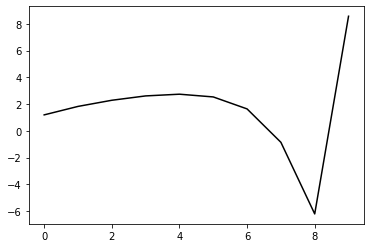

201300 0.18394276203906473
0.5952517174858205 -0.33993634669249956 0.38231160853248713 0.3290992262027535
[ 1.27429042  1.65248947  2.11226421  2.47441321  2.64555507  2.48029847
  1.62016349 -0.84392176 -6.17468311  8.50591491]


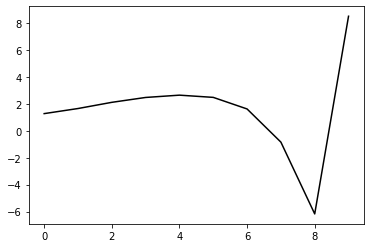

202400 0.30971813449319857
0.6063621929772717 -0.33225436511035367 0.3794997313823662 0.32927613610441986
[ 1.27931799  1.66809417  2.11593832  2.47977832  2.66184036  2.50576152
  1.65308117 -0.80308914 -6.13652691  8.57262575]


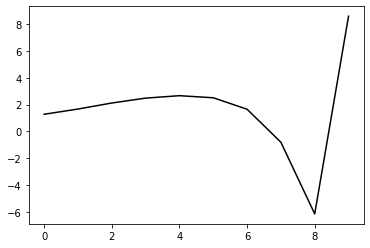

203500 0.21461944485116466
0.6007708422523506 -0.3457541166035159 0.3944783411851129 0.3159145267054112
[ 1.17810431  1.68086253  2.06178081  2.4080579   2.59616233  2.45123866
  1.60836696 -0.84002454 -6.18050491  8.59593182]


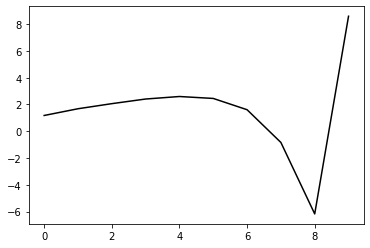

204600 0.3279634437284747
0.6281038866990869 -0.3300781259203545 0.3918897222773631 0.30210131138076435
[ 1.12281505  1.84044347  2.22870028  2.52403229  2.66779931  2.48707369
  1.61422331 -0.85802145 -6.23199049  8.51334566]


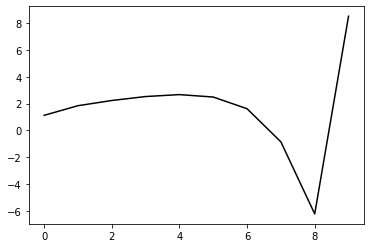

205700 0.967203561607202
0.5649212857993616 -0.32118698525496686 0.3682267134416001 0.3492699714555894
[ 1.45139352  1.45178248  1.89046829  2.24374015  2.44386043  2.31959558
  1.49737293 -0.92885206 -6.26686777  8.6254661 ]


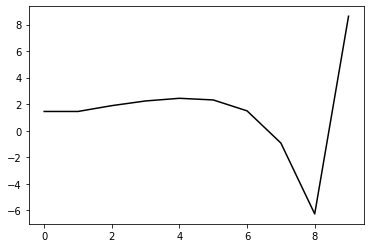

206800 0.17946685945570492
0.5884019146710211 -0.3473685095289527 0.39603373469726816 0.32504396374842065
[ 1.18549498  1.82311607  2.22609804  2.53556564  2.68215319  2.50026677
  1.62272957 -0.85211679 -6.24486223  8.56529202]


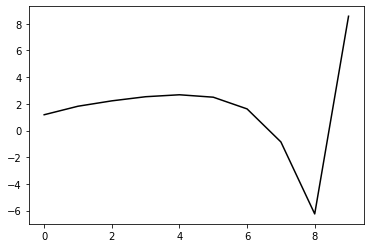

207900 0.3749362209752042
0.501904432316073 -0.3726810029013156 0.40386678053029973 0.3167767948063688
[ 1.2567307   1.47524204  1.79692051  2.03065893  2.12192325  1.91202257
  1.02490791 -1.44878042 -6.8539203   8.56204119]


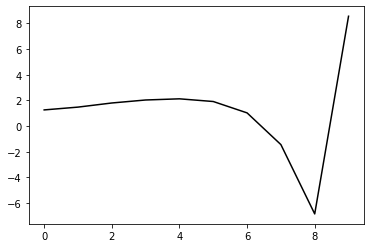

209000 0.27144161952133783
0.5926390337034626 -0.3400426372032761 0.38997939887074806 0.3396895157090036
[ 1.26338063  1.78132702  2.2075089   2.49916629  2.62245044  2.42820922
  1.54774936 -0.92256533 -6.3246519   8.52410474]


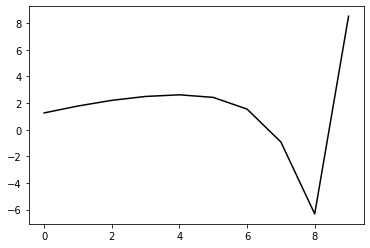

210100 0.17020907832283536
0.5941769306791078 -0.35053163051043745 0.3995395187290718 0.33721024018552936
[ 1.19352699  1.78351577  2.26547539  2.60065648  2.74668986  2.56670101
  1.69615418 -0.76704913 -6.1778661   8.58534272]


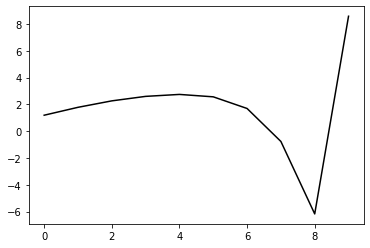

211200 0.23358036554941347
0.6145670977982474 -0.3318643747294542 0.3989394009491926 0.3152750963552648
[ 1.14795884  1.72776156  2.14579402  2.47684786  2.63175905  2.46830469
  1.61831821 -0.82679907 -6.24079085  8.59903452]


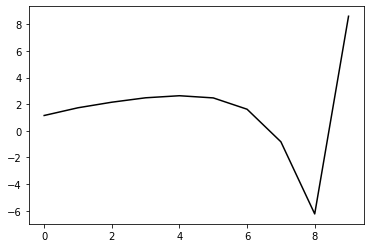

212300 0.17879091912724798
0.5900368770331427 -0.3427652270054123 0.4051286238168357 0.3140166098538222
[ 1.17328618  1.69910878  2.0963966   2.41986027  2.57045097  2.39797525
  1.53881314 -0.91405515 -6.34552545  8.65072907]


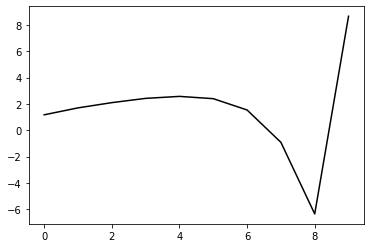

213400 0.17580955840343937
0.6046822128106374 -0.3316931921681843 0.39367633368467436 0.33351955149442075
[ 1.22673016  1.73876179  2.17700446  2.51048308  2.66477947  2.48792812
  1.62219187 -0.83393287 -6.26818521  8.59572892]


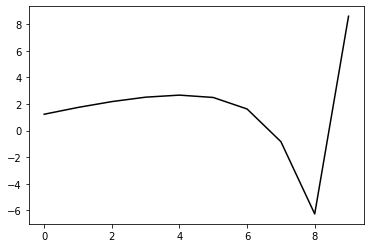

214500 0.26573432434501043
0.5639460885517126 -0.34800404291243925 0.40381971149934864 0.326861659664099
[ 1.2318234   1.51604854  1.9436171   2.26315838  2.40596003  2.22572493
  1.36201097 -1.08806135 -6.52644935  8.52410504]


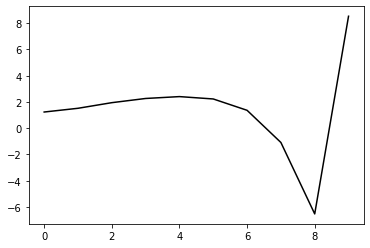

215600 0.26352553845334037
0.5363586254321291 -0.3389687392027462 0.3925767644270908 0.33691319724468644
[ 1.25446584  1.4656828   1.82336654  2.12413995  2.2574037   2.06927788
  1.20100149 -1.25052955 -6.70298289  8.56566874]


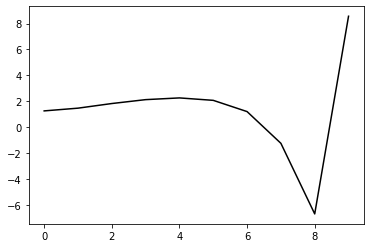

216700 0.42704831103279883
0.6319768052163272 -0.3095199041784954 0.3852870335395942 0.34553103284499254
[ 1.29792047  1.73674783  2.20840075  2.57084755  2.75454719  2.60033659
  1.75310428 -0.68483761 -6.1363364   8.51611847]


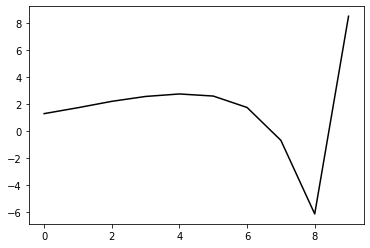

217800 0.21941409179247814
0.5833362250364424 -0.32948407817220043 0.39582871512354195 0.32788776707773076
[ 1.25274186  1.5385929   1.92450892  2.21764045  2.36037199  2.18935187
  1.33797385 -1.09658465 -6.54683356  8.56490319]


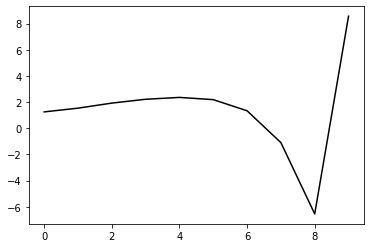

218900 0.2882150569519607
0.5326424844508935 -0.3619585094561281 0.41339061228005114 0.3253400628744582
[ 1.16749128  1.56965163  1.93293157  2.20330301  2.31521445  2.11644054
  1.24352447 -1.20536711 -6.6732986   8.53678102]


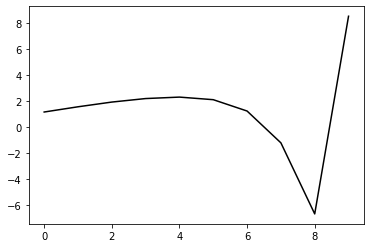

220000 0.2878376729504218
0.5532637647801393 -0.3597137075507668 0.41080370475321976 0.32895604539705114
[ 1.15641607  1.58781729  1.96555036  2.22775349  2.32374604  2.10849609
  1.22211823 -1.23438572 -6.70399077  8.49686251]


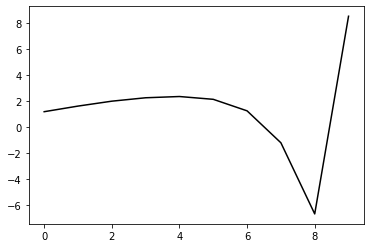

221100 0.19960633517483684
0.6169831661508507 -0.33330724253255595 0.3967537830836081 0.3396505931628445
[ 1.19321756  1.77993932  2.19649592  2.48988172  2.60653792  2.4037024
  1.52570545 -0.92351602 -6.390145    8.5256056 ]


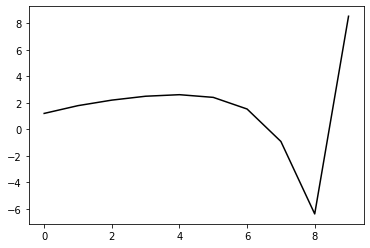

222200 0.40716696106512207
0.6032080967289929 -0.3597976797903177 0.4213929928117679 0.3240032636010998
[ 1.13342737  1.63019648  2.09631847  2.42328684  2.56570144  2.38516122
  1.52703104 -0.90498903 -6.37283375  8.56354605]


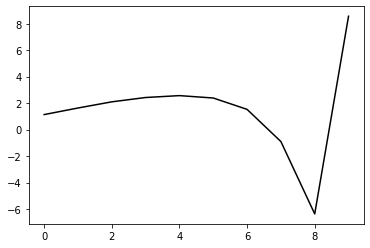

223300 0.15938985400961866
0.5985342012687567 -0.33088708515894916 0.39751044737514685 0.34855100706378045
[ 1.24927526  1.67258347  2.10425689  2.44192095  2.59317111  2.41707829
  1.56287591 -0.866071   -6.34341311  8.59126997]


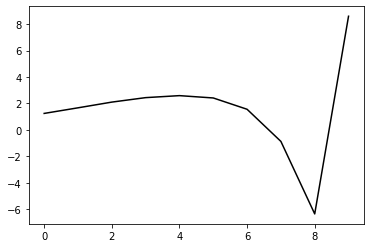

224400 0.2528182896158695
0.6156294916521968 -0.32597240874076633 0.39724585071364193 0.3507769313761648
[ 1.27802581  1.73828035  2.20775389  2.55244003  2.70530009  2.52405801
  1.66351836 -0.76921172 -6.25470551  8.5720061 ]


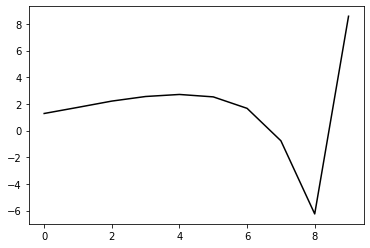

225500 0.21678890386183022
0.6232198566153861 -0.3178552666541431 0.3945736627118233 0.3374782786320807
[ 1.20265994  1.70911917  2.13277403  2.45198113  2.59411975  2.41029043
  1.55072738 -0.87889864 -6.36635804  8.55953193]


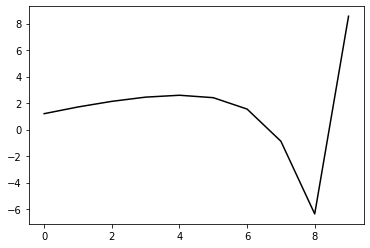

226600 0.2999398259938542
0.6131046519276734 -0.33346276471470615 0.40895762987113016 0.33148585195092717
[ 1.12980187  1.83159043  2.26818479  2.58944122  2.72719019  2.53514745
  1.66588492 -0.77252629 -6.27353466  8.48360315]


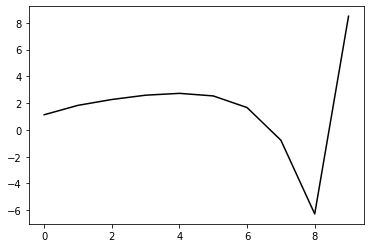

227700 0.19696765503272937
0.6006654383741423 -0.3315315818443353 0.4078224599687044 0.33038002776552583
[ 1.17051588  1.78834309  2.22496021  2.54497821  2.67808722  2.47831896
  1.60023237 -0.84647924 -6.36316603  8.57338038]


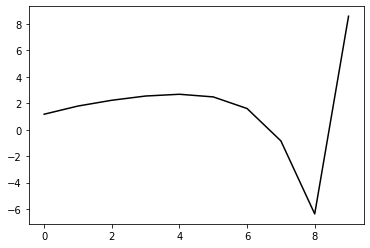

228800 0.2601213494244932
0.5992321678418578 -0.3089553816830451 0.38786631071117905 0.34861345537393534
[ 1.22423802  1.75455302  2.19973791  2.52135359  2.65295929  2.44958822
  1.5674225  -0.88159423 -6.40844892  8.56048398]


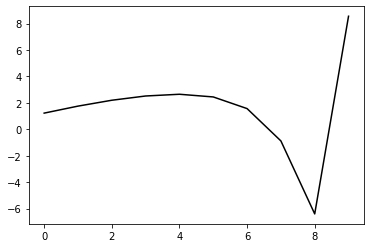

229900 0.18649734473984345
0.5965932618550693 -0.32549356069540414 0.40124815961572163 0.33456362148035024
[ 1.17763198  1.74209535  2.16549389  2.46345877  2.57222182  2.35055316
  1.45610018 -0.9980043  -6.52738442  8.49861681]


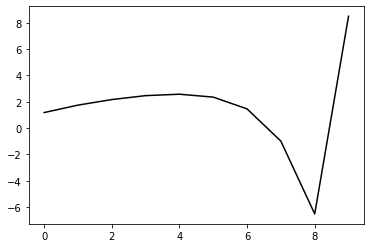

231000 0.23729259371218742
0.5728559311761868 -0.3319459771173996 0.4036442109347967 0.3373159884140848
[ 1.21436238  1.640455    2.06558265  2.38704281  2.51753287  2.31562226
  1.43902472 -0.99875125 -6.52569843  8.59734712]


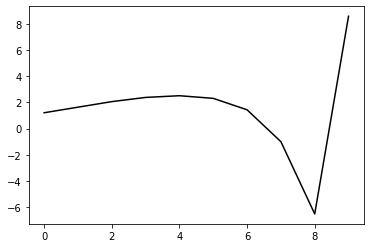

232100 0.20498934051679227
0.5857797376503693 -0.3319150952538258 0.40778635351998666 0.33141865096686135
[ 1.20093778  1.64862209  2.0633555   2.40427186  2.55996696  2.37886461
  1.51744973 -0.90916258 -6.43942651  8.54374815]


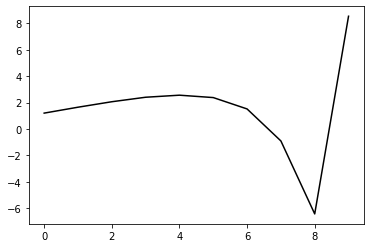

233200 0.3354724635312768
0.5290617028725844 -0.3241081739323888 0.39678273285028465 0.3275967752265134
[ 1.24271139  1.46144157  1.77464079  2.06091092  2.18742079  1.99198451
  1.12465803 -1.3044164  -6.85382823  8.53767186]


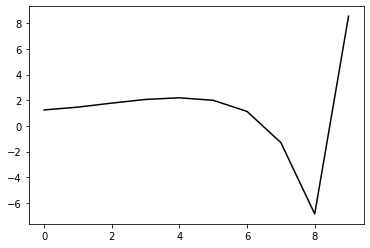

234300 0.1836557108788974
0.5694657091032231 -0.3309607602758934 0.4068927689099844 0.33714696487670304
[ 1.22622441  1.61680969  1.99585492  2.30131118  2.45136275  2.27559359
  1.42207146 -0.99584255 -6.53724424  8.4596713 ]


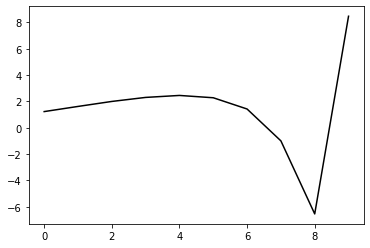

235400 0.355080337707101
0.5898523957277718 -0.30467898660832815 0.38960106625914126 0.3448499328924506
[ 1.29385657  1.57091695  1.97049028  2.27420568  2.42148565  2.24683827
  1.3947411  -1.0217351  -6.57271414  8.56407698]


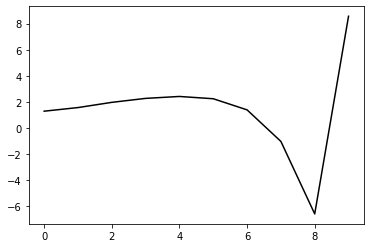

236500 0.2980651491359782
0.5268800300965726 -0.340837630695006 0.41303297447037357 0.32673520810635365
[ 1.19421142  1.57640838  1.93296926  2.20166393  2.31301885  2.10820808
  1.23125283 -1.20495563 -6.77512716  8.52346091]


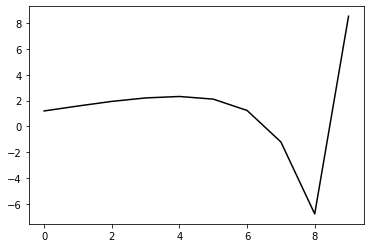

237600 0.254585190889756
0.5783354954668383 -0.31976880795122564 0.4012804769939421 0.34551609996022414
[ 1.2689689   1.65796219  2.08833713  2.39587735  2.53314901  2.34687009
  1.48233035 -0.9447665  -6.51059884  8.62665289]


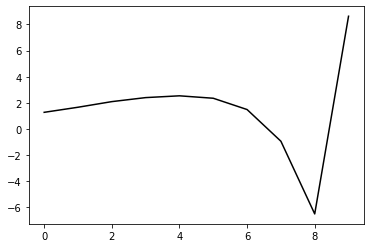

238700 0.9573481147624172
0.5827943321083474 -0.29123039233268266 0.379238704037874 0.3671865573638849
[ 1.41850816  1.55692558  2.03852822  2.39022606  2.55949298  2.40002572
  1.55811801 -0.85133653 -6.4140567   8.57161225]


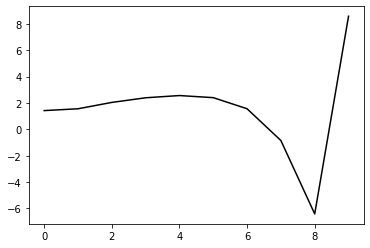

239800 0.24469912109345637
0.532374059008472 -0.3134322764388016 0.3943563635887241 0.33803151712907364
[ 1.23695966  1.53995408  1.92856566  2.20492046  2.29925666  2.07028831
  1.16817301 -1.29401677 -6.92651316  8.50835627]


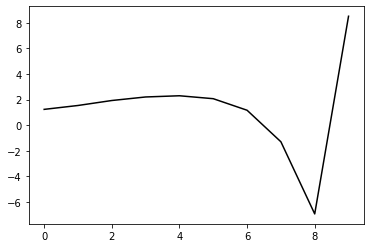

240900 0.21772025328163816
0.637350748506079 -0.28142211703531483 0.39414559662755255 0.33949115411041864
[ 1.13618898  1.90894145  2.38093588  2.71909519  2.8648411   2.67284405
  1.79503136 -0.65292779 -6.2856152   8.65302805]


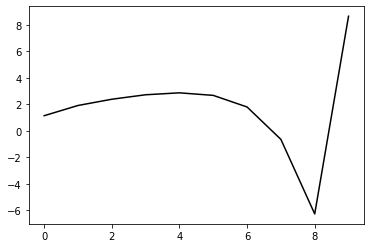

242000 0.22422454498224018
0.5923444057569328 -0.31344086724355463 0.4064833208056674 0.3324371267498839
[ 1.16190944  1.757485    2.20078258  2.53006091  2.66482205  2.46085624
  1.57206462 -0.88306412 -6.51473817  8.55272735]


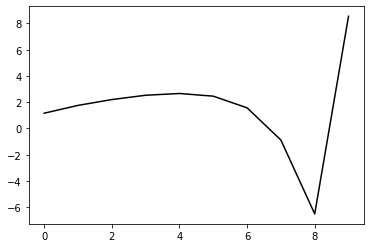

243100 0.21373893444319148
0.5891765570630689 -0.30586284088349225 0.4013870789721978 0.33601984036724253
[ 1.20357048  1.73863906  2.17319855  2.50302197  2.64335376  2.44678626
  1.56715738 -0.87789351 -6.50861141  8.54601804]


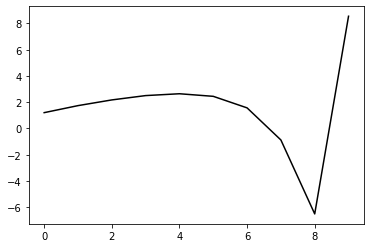

244200 0.16764585732466206
0.5901117294880854 -0.314986370800108 0.4092920817681302 0.33272701425074613
[ 1.17350905  1.74073412  2.1685427   2.49908489  2.64496706  2.45481376
  1.58146099 -0.85696766 -6.48509282  8.60086608]


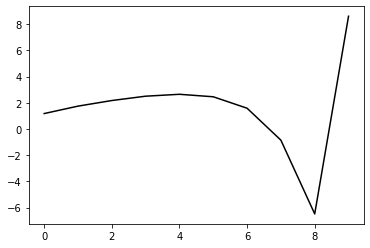

245300 0.2035562547310372
0.5600983707263817 -0.316905799783145 0.40368768499516494 0.3465423832304294
[ 1.3008086   1.51462558  1.95947326  2.2996879   2.45716681  2.27960554
  1.41829654 -1.00796686 -6.63038397  8.56801211]


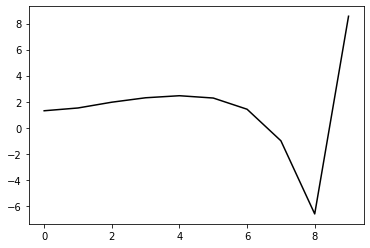

246400 0.27867577962043694
0.6128434535051424 -0.31128257631683837 0.4114523965095195 0.33977653988422674
[ 1.12757924  1.84440097  2.313165    2.66695325  2.83100554  2.65118433
  1.78145598 -0.65659827 -6.30631154  8.5602135 ]


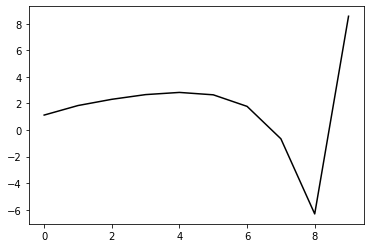

247500 0.17473672416897476
0.6160298567558313 -0.29620627720761245 0.401557285059319 0.34438026158235585
[ 1.18850998  1.78480092  2.26027622  2.6343501   2.82295731  2.66743032
  1.81831654 -0.60375567 -6.25711664  8.60360809]


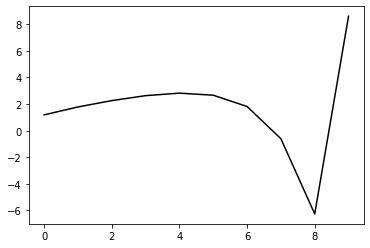

248600 0.5540857258143194
0.587764122090042 -0.3343042973202509 0.42767169789491916 0.3383491285376391
[ 1.09877381  1.72584961  2.22026414  2.62462281  2.8462144   2.72369522
  1.90360814 -0.49411713 -6.1407315   8.51664586]


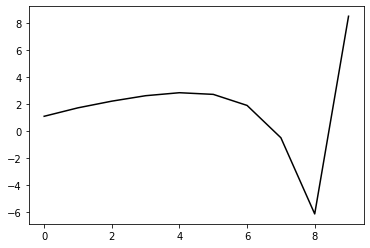

249700 0.625150513224239
0.5671853832538299 -0.29221183570443054 0.38874645377054867 0.35831404179792475
[ 1.34478559  1.49156367  1.91619733  2.27251176  2.45657327  2.30245505
  1.45561336 -0.96437373 -6.63709064  8.60399244]


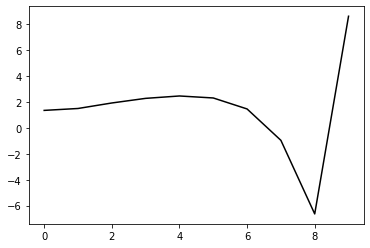

250800 0.3463806611912795
0.5966541897709601 -0.3116392678955293 0.417111679773073 0.33413744179898575
[ 1.13166532  1.7175265   2.17047758  2.53333798  2.71932807  2.5593854
  1.69995792 -0.73761696 -6.44186251  8.50055501]


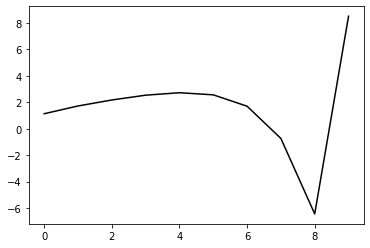

251900 0.4733899136116284
0.5844890326556054 -0.3228531873031932 0.4246408267410261 0.33736473244026033
[ 1.13025418  1.75023829  2.22277225  2.61166225  2.8263936   2.6934487
  1.85484183 -0.56865825 -6.27653434  8.63253472]


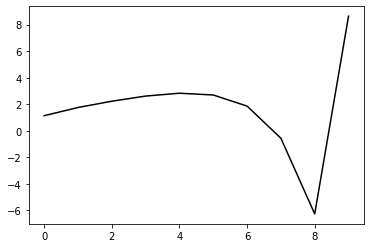

253000 0.2386046567175262
0.5679747254204226 -0.2905110973730806 0.3959207208565476 0.3410483487373408
[ 1.22103078  1.63285959  2.01312183  2.33555571  2.49678244  2.32353508
  1.45430241 -0.99362029 -6.72625497  8.51444231]


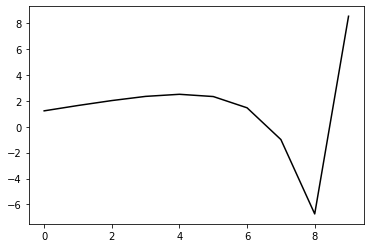

254100 0.19976999224395792
0.589502486163039 -0.3025185816788702 0.4081198871267717 0.34279428918855975
[ 1.18581759  1.72976904  2.17209975  2.50633709  2.67546299  2.5091492
  1.64441943 -0.79980309 -6.52899256  8.56808026]


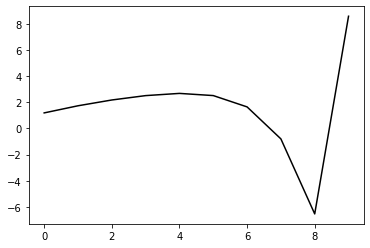

255200 0.18449729048627775
0.569705847847746 -0.3046719760395023 0.4103616677836509 0.3398932446713081
[ 1.18891125  1.69575594  2.12271963  2.45598211  2.62031864  2.4534098
  1.59032396 -0.85318461 -6.59135826  8.57041938]


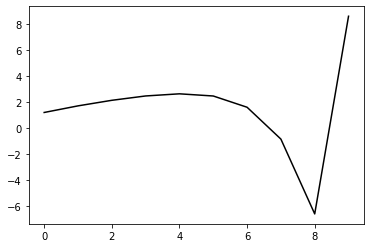

256300 0.17292888094569964
0.6189766398327278 -0.280561303000558 0.40464127881993756 0.3363587264523931
[ 1.13579356  1.82521203  2.2975481   2.64066776  2.80525732  2.63462981
  1.76583758 -0.68533364 -6.44077504  8.56402145]


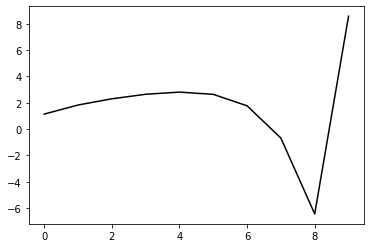

257400 0.26500215604115396
0.5605080198789661 -0.3095558694062536 0.41521163087503127 0.3251344583185607
[ 1.15411113  1.60494437  1.9974369   2.3027577   2.43721355  2.24784562
  1.37001309 -1.08504772 -6.84599171  8.52917065]


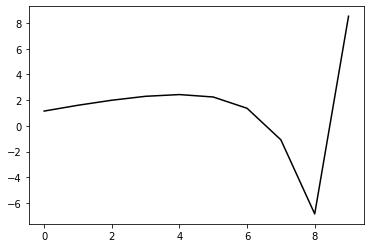

258500 0.3095180567990666
0.5412704075065364 -0.33168904490701445 0.42775327584202505 0.3337374606322454
[ 1.21340714  1.49171862  1.91053637  2.23730917  2.39614075  2.22910155
  1.37089145 -1.06688571 -6.81160307  8.52850977]


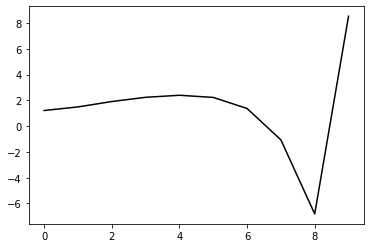

259600 0.26680649447934374
0.5399656396286026 -0.32246699300147275 0.4159807883216067 0.3459177119085662
[ 1.27275972  1.41561833  1.83650111  2.1627338   2.32374523  2.16010546
  1.3063271  -1.12652928 -6.86810674  8.53133213]


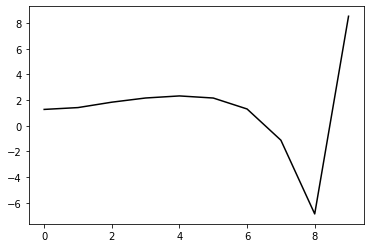

260700 0.2162161683056004
0.6311508941779516 -0.28241643486246576 0.40158842062652983 0.35172963145437186
[ 1.18718709  1.79739417  2.27183295  2.63988801  2.8354429   2.6971991
  1.8608876  -0.56216028 -6.30962859  8.51715846]


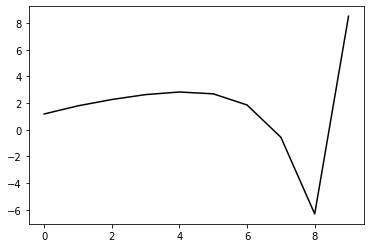

261800 0.17550034948868892
0.6171885539408127 -0.29151882302302695 0.406160457944485 0.3466061734980463
[ 1.16529781  1.759011    2.19951276  2.54071999  2.70945041  2.55014394
  1.69945948 -0.73310241 -6.48664495  8.53279394]


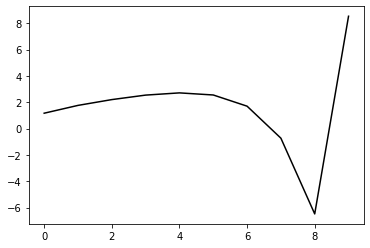

262900 0.5575608525591736
0.5559875935442669 -0.33648629062073115 0.43361257928903885 0.33320655694281115
[ 1.10629359  1.60424885  1.98990827  2.30267397  2.44954806  2.27560094
  1.41672937 -1.01914256 -6.77130888  8.49512827]


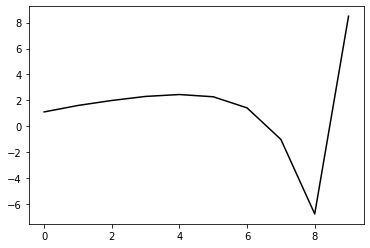

264000 0.20662205649665613
0.6198795714965728 -0.2953563041154496 0.40367876295317345 0.3527307036700204
[ 1.15541947  1.76573185  2.16167816  2.45643565  2.58719037  2.39713561
  1.5237264  -0.92424607 -6.68657446  8.54094381]


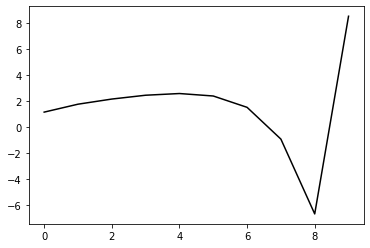

265100 0.24010759632248035
0.5745478631383623 -0.32772333760425726 0.4234295058361479 0.35516107729508245
[ 1.15685662  1.63019708  2.08515887  2.41909528  2.57860711  2.41284588
  1.55977742 -0.87234152 -6.63025949  8.63080927]


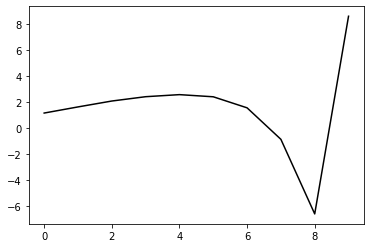

266200 0.22824884839436152
0.5797500637682553 -0.31361714142014896 0.41629037253792767 0.3602902449499541
[ 1.2370599   1.57891351  2.02257478  2.38662708  2.57942492  2.44699386
  1.62537321 -0.78072491 -6.52461706  8.56737199]


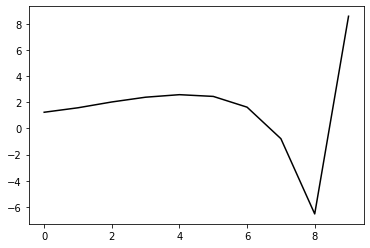

267300 0.18022295969114532
0.5800689720658468 -0.2945864782171953 0.40081589424163777 0.35729563077095194
[ 1.20035113  1.62396532  1.97765826  2.26660393  2.40159991  2.22642119
  1.37580338 -1.05007837 -6.81216164  8.52051045]


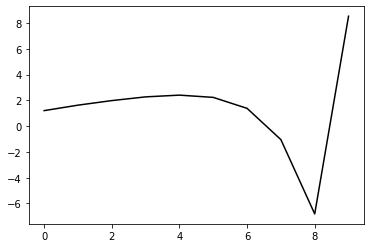

268400 0.17445904970329976
0.6099727224719733 -0.29566745592682414 0.40497081109299865 0.3604961003857526
[ 1.18051471  1.75003725  2.1551881   2.44989648  2.58407075  2.40562712
  1.55162593 -0.87661679 -6.64075069  8.62313784]


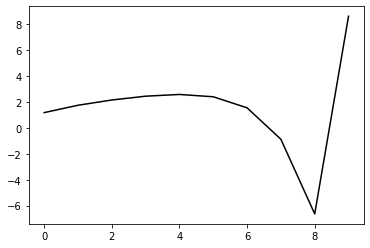

269500 0.2411435167722722
0.6113364884901376 -0.2896686005141825 0.4005594411409228 0.3624620860894545
[ 1.13641957  1.73746133  2.16050515  2.43227301  2.53214274  2.32371995
  1.44722654 -0.99731117 -6.77872471  8.50259295]


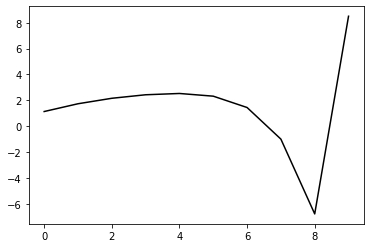

270600 0.3268431729103942
0.6228461349331914 -0.30387864697277606 0.41564816871153204 0.35358529934264177
[ 1.07077833  1.87031715  2.32846447  2.61984107  2.72057011  2.50459251
  1.61825355 -0.83613496 -6.62635069  8.56144587]


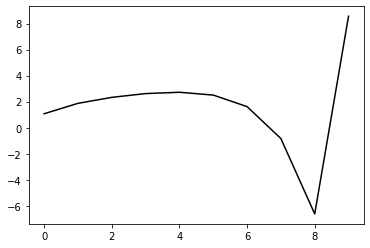

271700 0.21977369232177274
0.5867399323832123 -0.3159411770550284 0.4158961839430992 0.36998349949770704
[ 1.20933956  1.69152215  2.16767183  2.47781639  2.58659328  2.37558957
  1.49689717 -0.94620475 -6.7217558   8.64852037]


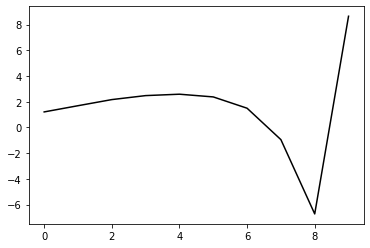

272800 0.18863522437639474
0.6083654754426276 -0.30254362126774526 0.40953515566138726 0.37638858279019277
[ 1.17318939  1.73307183  2.2421769   2.59810383  2.74071557  2.55115813
  1.68831228 -0.74261444 -6.51868583  8.56444185]


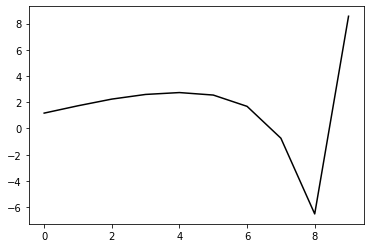

273900 0.17320812192225135
0.6075787157127281 -0.29927915257719573 0.40969075458164644 0.36327838207804053
[ 1.12094143  1.6642378   2.09862755  2.43513729  2.56873008  2.37044664
  1.50280254 -0.92936841 -6.71350813  8.52395235]


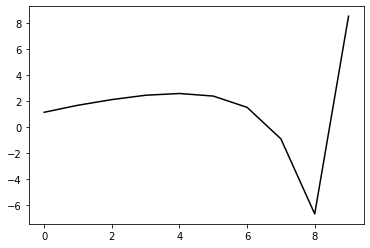

275000 0.9230727380881188
0.6370432216013815 -0.3397729116280012 0.4511435505658401 0.3361407364452279
[ 0.96741594  1.71706489  2.28396779  2.65940914  2.82637328  2.64672029
  1.7875839  -0.63964494 -6.42981014  8.51158878]


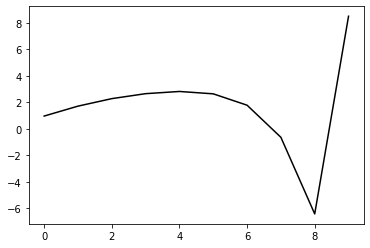

276100 0.3034746659696078
0.5866965044845063 -0.28828415416871545 0.4017725467084172 0.37031728756768045
[ 1.21961246  1.51230359  1.93782578  2.29196245  2.44754389  2.26243146
  1.40360897 -1.01904304 -6.80842505  8.50213933]


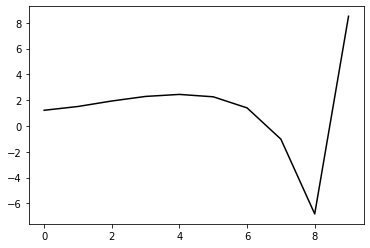

277200 0.17672393474403272
0.6004904044811147 -0.30354195168774756 0.41616540860965223 0.3607384892058846
[ 1.14238583  1.60724882  2.02525296  2.38201967  2.54936002  2.36851549
  1.50620726 -0.92338042 -6.7276237   8.60057743]


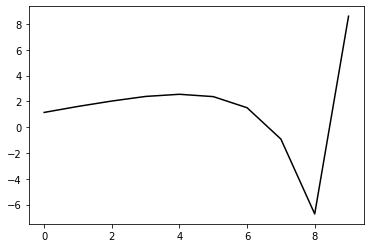

278300 0.1393362595840003
0.61347396154757 -0.30847811874067776 0.4231542364218926 0.3645774688726514
[ 1.16508139  1.73631796  2.20255709  2.58149784  2.76943953  2.60019814
  1.74173171 -0.68676693 -6.49638406  8.58461956]


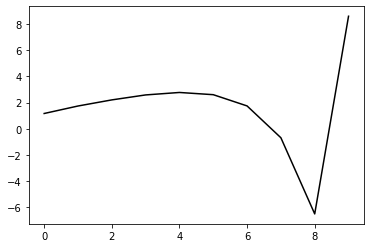

279400 0.20855127203720125
0.5824907200868313 -0.30252973042590753 0.4166876146555183 0.3714679168297173
[ 1.24371802  1.42099342  1.93052529  2.31302019  2.50883477  2.3589757
  1.52079788 -0.88967634 -6.69740338  8.51538906]


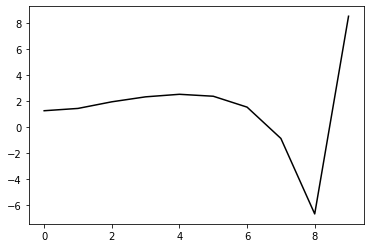

280500 0.20284824738539894
0.6268184217214041 -0.29493857274176666 0.4227266185583151 0.3592174607821972
[ 1.14011576  1.64873261  2.1068634   2.5093191   2.73179018  2.60667972
  1.78695777 -0.61134269 -6.42731977  8.58350378]


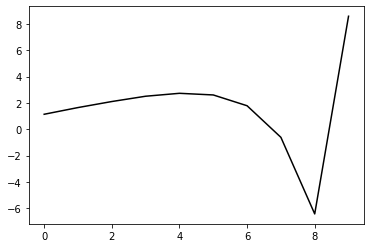

281600 0.13704548941242276
0.5876110576497241 -0.29757366042238254 0.420575348992617 0.3543796150705558
[ 1.19067679  1.63233936  2.002343    2.35868509  2.55009895  2.39691196
  1.55077997 -0.87083352 -6.70731306  8.51459059]


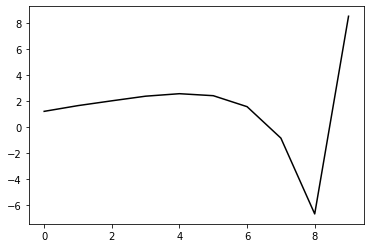

282700 0.27905038129255977
0.5132455879498102 -0.33212648299312375 0.4399899386037114 0.35586421719930655
[ 1.29859446  1.27418833  1.66657465  2.02917086  2.26150736  2.16253833
  1.36631559 -1.01383142 -6.82460433  8.5558934 ]


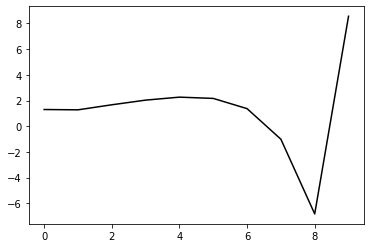

283800 0.20481730224610958
0.5893056595161826 -0.29903081708077656 0.4282843146031956 0.349069307157838
[ 1.15094723  1.64510935  2.0320768   2.37779402  2.59375398  2.48033731
  1.66518072 -0.73949005 -6.59296933  8.48505678]


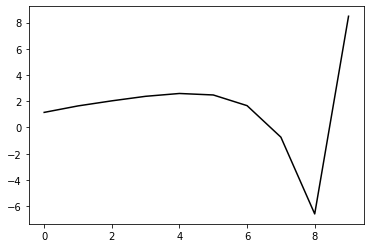

284900 0.2880229147862788
0.5960981758650259 -0.29940059053618556 0.4306573448125639 0.35190179510390895
[ 1.15830176  1.70147947  2.13052954  2.50161828  2.74460537  2.66281257
  1.87540371 -0.50926675 -6.35841615  8.61895643]


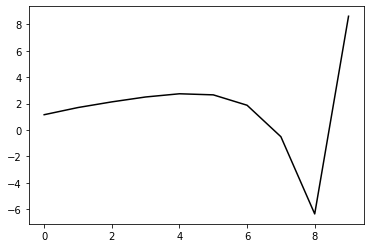

286000 0.4178614826967536
0.595589872496237 -0.285586022271395 0.41553683198794256 0.36333522872225715
[ 1.28219097  1.6292673   2.04433617  2.39942188  2.62628909  2.53707475
  1.74659595 -0.63935768 -6.48410379  8.56866066]


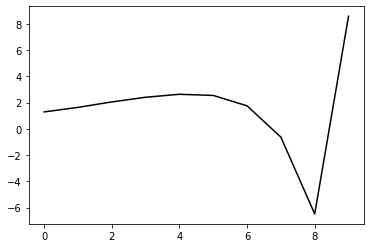

287100 0.2182129386700279
0.5833722409842921 -0.29041104283511765 0.4200653007258882 0.3492394386392507
[ 1.21844219  1.65634906  2.03780792  2.36673209  2.56895809  2.4634144
  1.66168294 -0.73559033 -6.59763862  8.53970514]


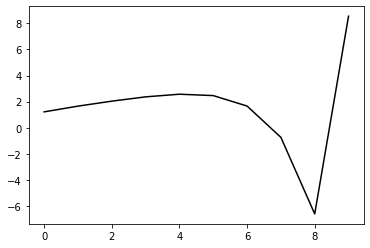

288200 0.1776043158012177
0.6055492892605151 -0.27402382605977127 0.4134561184190381 0.34862907846233
[ 1.19030881  1.70441901  2.12684688  2.46476398  2.66612368  2.56239782
  1.76452217 -0.63189946 -6.50450145  8.57266383]


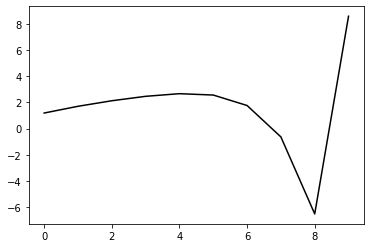

289300 0.16978148336532448
0.5891132879411863 -0.2782760630780737 0.41856747472571015 0.33583343343692423
[ 1.18767334  1.62802379  2.00307383  2.31823659  2.50216779  2.39384801
  1.60284945 -0.78396466 -6.65335981  8.54083986]


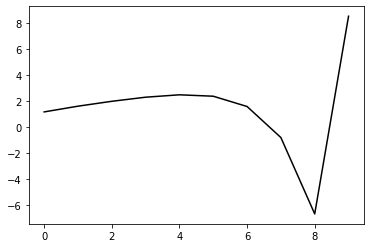

290400 0.1689179291871703
0.5988539404921046 -0.27991756303494697 0.4212389118628123 0.339023577180355
[ 1.1964054   1.71364213  2.10377089  2.41325712  2.58404521  2.46022035
  1.65764393 -0.73850777 -6.61722516  8.63520327]


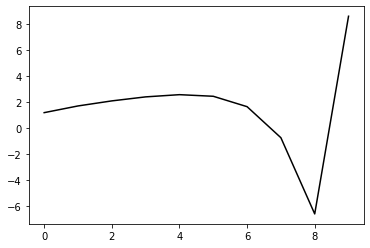

291500 0.23261653240800717
0.5843455081172113 -0.2814838529836024 0.4177766529613237 0.3529356036579153
[ 1.23762985  1.65541419  2.08698518  2.42210377  2.61003908  2.50057937
  1.71220211 -0.67237955 -6.54602575  8.57100725]


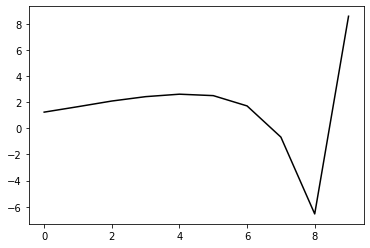

292600 0.13760103956517467
0.5833307390772591 -0.2913040162934424 0.4293333134517864 0.339620262213401
[ 1.16289099  1.78102613  2.20032973  2.52611157  2.69501561  2.56097605
  1.74884068 -0.65937131 -6.56257252  8.52117947]


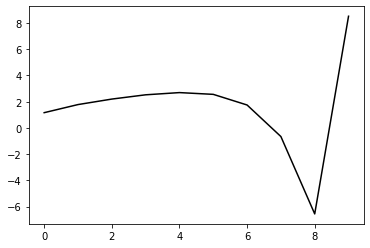

293700 0.4680371960530768
0.5873491405370923 -0.26635137461622926 0.40779967531922556 0.3613169346522124
[ 1.31743748  1.69561031  2.14073913  2.47755485  2.65446539  2.52598497
  1.72031377 -0.68146994 -6.58023675  8.66092241]


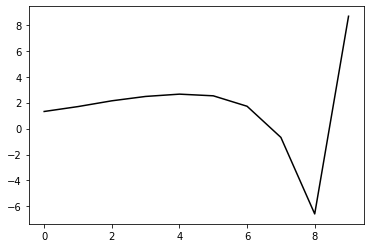

294800 0.1860428708081619
0.5758649341511908 -0.2873683317930742 0.4249570539032748 0.3481292707707127
[ 1.16614552  1.77346962  2.21751713  2.53565112  2.6882112   2.53767093
  1.7162412  -0.69761599 -6.61256178  8.56047483]


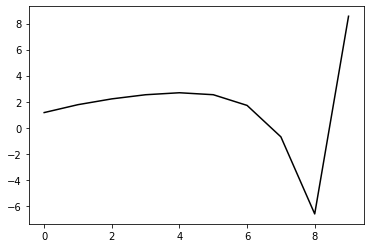

295900 0.2939172911260746
0.5491234390795622 -0.2901824054414941 0.42291170184851395 0.3507140740311924
[ 1.29498885  1.532053    1.96768076  2.3029657   2.47932804  2.35765665
  1.56814307 -0.81555972 -6.71037014  8.53183022]


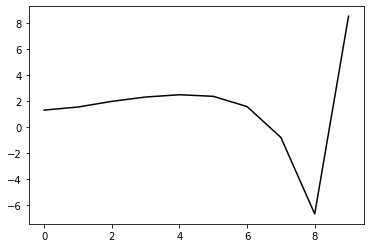

297000 0.24446836822223447
0.5600181571473333 -0.2770232672688172 0.4150992083117905 0.3492732909405701
[ 1.23448183  1.58640336  2.00010807  2.32633533  2.4957449   2.36795718
  1.57680594 -0.80650735 -6.70946367  8.44523135]


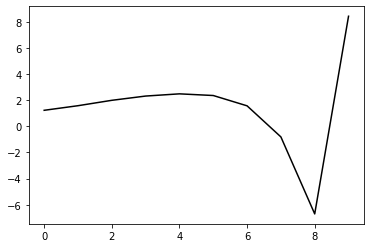

298100 0.25266284737864525
0.5604220419799675 -0.29696156747189395 0.4314359468777698 0.3396322043018723
[ 1.1519468   1.64715749  2.06822928  2.39810312  2.56603437  2.43002685
  1.62979524 -0.76110888 -6.67114432  8.53874922]


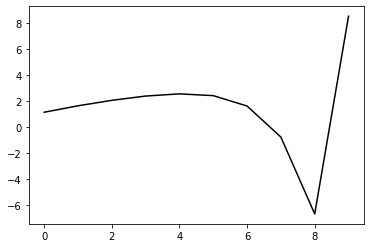

299200 0.8375428364580699
0.5517421035966942 -0.2256817557205954 0.37132085984310165 0.38549830812191316
[ 1.37486056  1.63900484  2.02557373  2.37640287  2.56993003  2.45595235
  1.67499841 -0.69903141 -6.59749879  8.67387956]


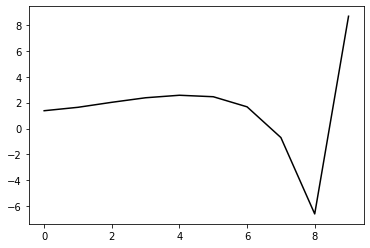

300300 0.16538224316383773
0.6045481903711298 -0.24152462717382067 0.40811172110334737 0.3298657554404991
[ 1.12008186  1.77077737  2.16937604  2.467684    2.61471445  2.45961065
  1.64457187 -0.75911761 -6.70155947  8.53002512]


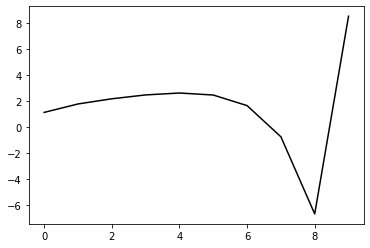

301400 0.19750974507008168
0.5579757618317218 -0.2683487633990269 0.411470150182803 0.3462797046871585
[ 1.22989057  1.6042827   2.00713299  2.32963548  2.49961148  2.36793609
  1.57498481 -0.8073063  -6.72804663  8.5294722 ]


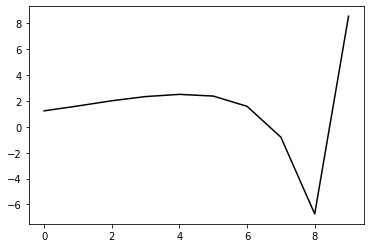

302500 0.24082935672886424
0.5362062953140231 -0.28845561313691986 0.4230908400832749 0.3529578552039352
[ 1.22567403  1.58899757  2.01120321  2.36792098  2.57067131  2.46784372
  1.69958953 -0.66165102 -6.57160363  8.51238117]


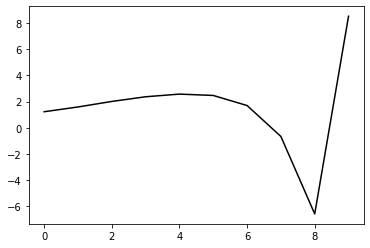

303600 0.09226777045012982
0.553189923709123 -0.2866770510575381 0.4290916428160527 0.3427923204130057
[ 1.18723803  1.66005356  2.08446891  2.44843723  2.6633629   2.56980293
  1.80743497 -0.55094558 -6.47017316  8.55465886]


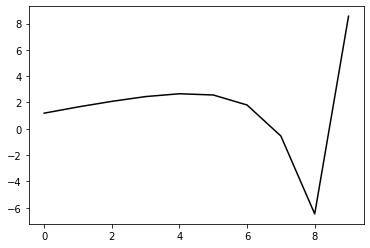

304700 0.2071459093162276
0.5263135031577335 -0.2904880702054294 0.42847366438000234 0.33496834962237637
[ 1.16543239  1.62771797  1.992353    2.30838178  2.4873492   2.36818584
  1.58760079 -0.783504   -6.7157073   8.4848705 ]


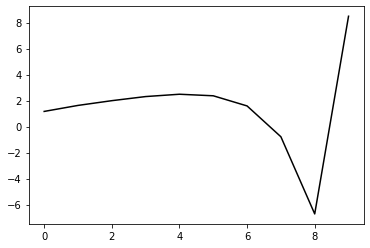

305800 0.14812547739360446
0.5813154369614346 -0.264903674570268 0.41886329142707346 0.3517165101530894
[ 1.17015523  1.82040115  2.26881742  2.62747301  2.8411204   2.75038239
  1.99170085 -0.36369594 -6.30215485  8.61282645]


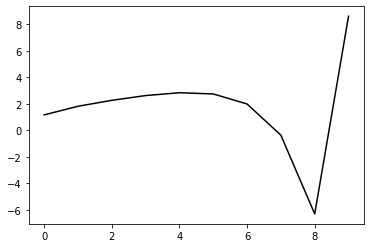

306900 0.2305864797209748
0.5278155602434099 -0.3054748258743219 0.4402721344932141 0.345340780074847
[ 1.18776858  1.59103616  1.98403824  2.35710586  2.59357078  2.53031641
  1.79832867 -0.53280186 -6.44801151  8.55444607]


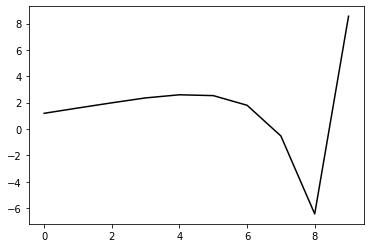

308000 0.3243897128601927
0.4994738188053968 -0.31291876792941337 0.44247472508296504 0.3232574885441496
[ 1.17741922  1.48141211  1.76022821  2.03349467  2.20548879  2.10097811
  1.34264309 -1.00616111 -6.94228544  8.5023604 ]


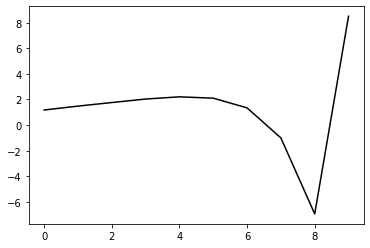

309100 0.27902869518421464
0.4938245024379124 -0.31475667221320985 0.43480280536245547 0.33622643817872344
[ 1.21130581  1.61868828  1.92990954  2.17613217  2.30605629  2.15989103
  1.3653445  -1.01215846 -6.96445522  8.5681011 ]


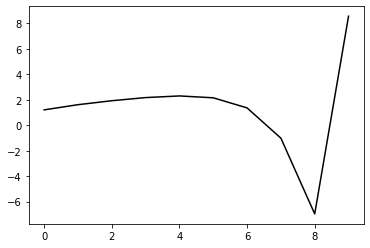

310200 0.24605172574097658
0.5574190465936933 -0.2959977931165975 0.4268423794866813 0.36249086190634355
[ 1.27457148  1.72896932  2.1741636   2.49105496  2.66672143  2.55252601
  1.77988401 -0.58226024 -6.52490123  8.52875469]


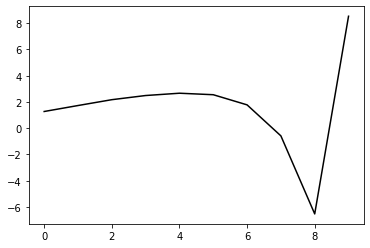

311300 0.22201807973233778
0.5148335639289339 -0.30183507712990765 0.4226778282370193 0.3555271039620563
[ 1.24178058  1.59655822  1.92510564  2.17999945  2.30400914  2.15823689
  1.37025516 -0.99737562 -6.94067144  8.52483116]


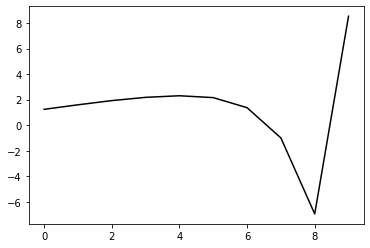

312400 0.3779667130075371
0.5807464577363646 -0.2741579011274363 0.41211540483061526 0.3628808078391328
[ 1.28263857  1.7372098   2.17083493  2.46342311  2.60439247  2.46533928
  1.68115431 -0.68428952 -6.62893757  8.50948454]


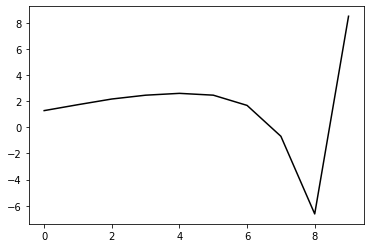

313500 0.32203807624266356
0.5133494381576111 -0.3120378847135903 0.4346347900919521 0.33804700975142954
[ 1.16718451  1.60157033  1.96184373  2.20789828  2.30708464  2.13777727
  1.33578068 -1.03977479 -6.9908424   8.47744839]


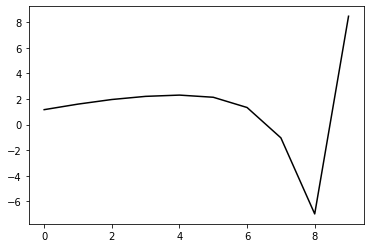

314600 0.3519570781503096
0.5999648372382103 -0.27552980246909164 0.41235577547787466 0.3663047183936698
[ 1.24700163  1.7812314   2.26443596  2.572562    2.70468554  2.55082518
  1.75750972 -0.61150111 -6.55732092  8.55602904]


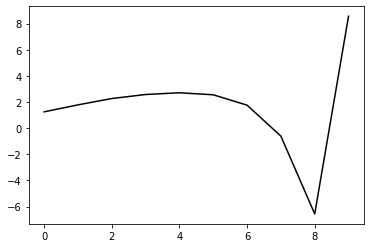

315700 0.2933528825004892
0.5670836529629609 -0.30564216762729635 0.4359953163327279 0.344983963851669
[ 1.14887959  1.69254939  2.15002622  2.46382433  2.58876646  2.42337594
  1.62405896 -0.74613963 -6.69873529  8.3937911 ]


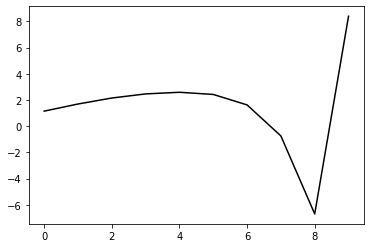

316800 0.5007883517966256
0.5262322996208085 -0.27520166151781555 0.3983201388201743 0.3771530358156195
[ 1.30360443  1.60222234  2.0230082   2.32664258  2.43620182  2.24623119
  1.42410358 -0.96404353 -6.93477817  8.50018181]


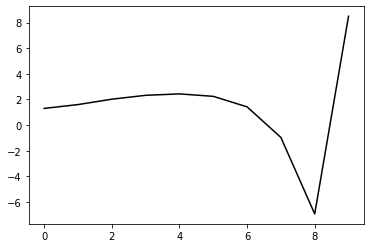

317900 0.279910707094323
0.570815363745342 -0.3021887531474136 0.43366461971981757 0.35023956374772275
[ 1.15661409  1.86463319  2.30228688  2.60765334  2.71423142  2.51228778
  1.67653662 -0.72325477 -6.70932952  8.56666823]


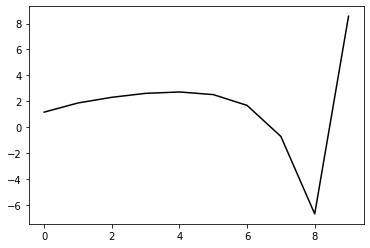

319000 0.22130774699824174
0.6004894952772626 -0.2810562829368227 0.42689059866453705 0.3435128030175887
[ 1.17180831  1.74484656  2.22256311  2.53899071  2.65926439  2.46966976
  1.64595667 -0.74160551 -6.72668229  8.51159405]


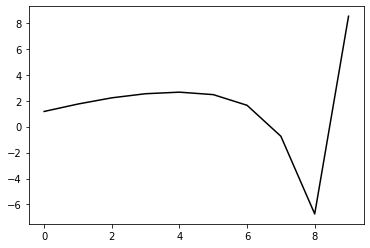

320100 0.21132962913473777
0.5664900866650777 -0.2816592070088781 0.42491674192481443 0.3414359136813587
[ 1.18646129  1.69053134  2.15642675  2.48955839  2.62058098  2.43380514
  1.609287   -0.77953502 -6.77641898  8.54067704]


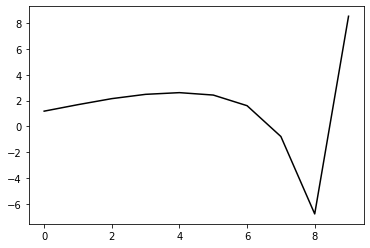

321200 0.23096692640309277
0.5381875168737454 -0.296925413347536 0.4289822658844857 0.36014131367244306
[ 1.24372658  1.59533123  2.09454854  2.46752381  2.6374408   2.48095072
  1.68013312 -0.68676618 -6.66656072  8.47251626]


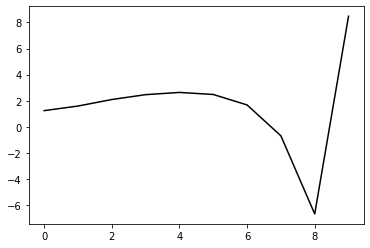

322300 0.16895124906660147
0.5702399683031649 -0.28254176838081224 0.43050123299490367 0.33683146315964235
[ 1.16379339  1.71625259  2.15462051  2.5004169   2.6497103   2.47193263
  1.65084982 -0.7327109  -6.73468762  8.47540267]


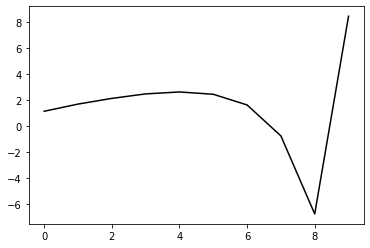

323400 0.18749145870840386
0.5529311185874646 -0.2758397576798484 0.41907850277402026 0.3462586597585416
[ 1.21690509  1.67658537  2.0802929   2.39891024  2.52915039  2.33406217
  1.49810072 -0.89414672 -6.9021322   8.49245954]


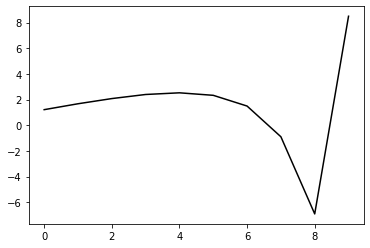

324500 0.2361317872758825
0.5701501042206936 -0.28527971091219745 0.4269246376059003 0.3492638095630698
[ 1.20134598  1.73409785  2.17756263  2.51948557  2.67241363  2.4924196
  1.66347723 -0.72318176 -6.72514719  8.54498539]


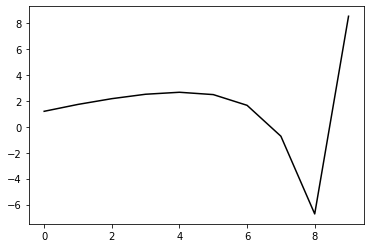

325600 0.16322969788834615
0.5731538935754308 -0.286850479355025 0.4276345926102998 0.35710719822852854
[ 1.24722078  1.6716857   2.1490823   2.51826752  2.69989719  2.54494238
  1.73339828 -0.63780273 -6.6310701   8.51143726]


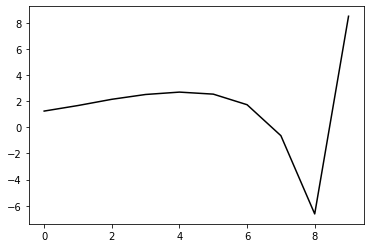

326700 0.240991074415079
0.5651251081056782 -0.2967813188453301 0.4350669735274264 0.342838518695411
[ 1.15674524  1.75548116  2.17549622  2.50941223  2.65854305  2.47352014
  1.6339706  -0.76021043 -6.7771563   8.56616405]


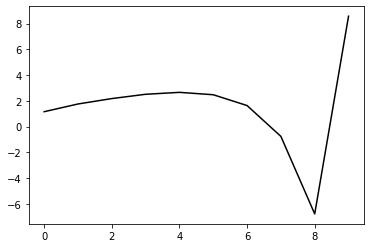

327800 0.20444421509599484
0.5490019100692581 -0.2921206048949596 0.426964870257814 0.34983038119229104
[ 1.19728907  1.71923994  2.15276273  2.46676483  2.59380194  2.38508601
  1.52061372 -0.89445638 -6.92523571  8.46238033]


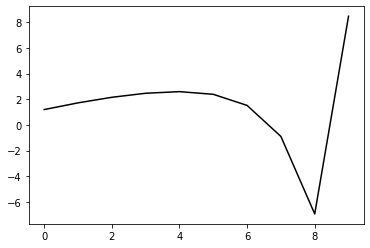

328900 0.20845690391734528
0.5585028017304416 -0.3004316233519802 0.43569897861353885 0.3549042350659012
[ 1.26657368  1.70975831  2.23627458  2.60157658  2.76779267  2.59088815
  1.74918705 -0.64815307 -6.66982475  8.59697815]


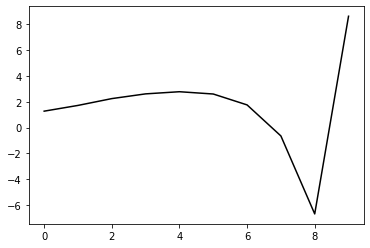

330000 0.21279539105769912
0.5698634189096612 -0.28828842459080256 0.42955236208412534 0.35592343274709715
[ 1.24519851  1.72248882  2.23318705  2.6322549   2.83032351  2.68176775
  1.85975603 -0.52579996 -6.5551716   8.54115917]


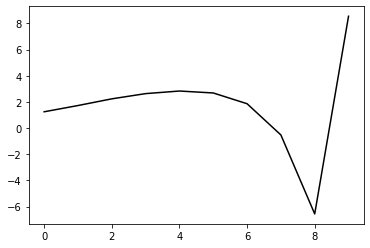

331100 0.23069687574535921
0.574246689777937 -0.2874575713649546 0.42969102160608585 0.35733962993501645
[ 1.26753859  1.68428897  2.18581991  2.60382684  2.83036518  2.70540396
  1.89782776 -0.47736414 -6.50035014  8.56762709]


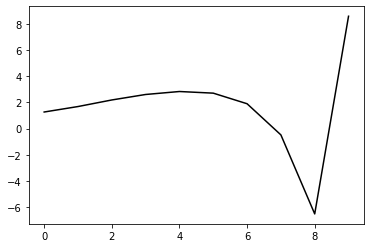

332200 0.17367710761842736
0.5745273436496894 -0.27865242294198295 0.4257129796968959 0.34168671466489386
[ 1.18090386  1.79603159  2.19673768  2.51924301  2.66129459  2.46811078
  1.60926915 -0.80152975 -6.85072139  8.45779506]


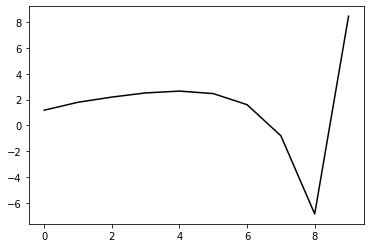

333300 0.163823331750777
0.5668320325241472 -0.28135297130677933 0.42381503236364704 0.35542860638903473
[ 1.2579073   1.691068    2.16482246  2.52797786  2.70619985  2.5406769
  1.69859808 -0.70120557 -6.74335704  8.53774367]


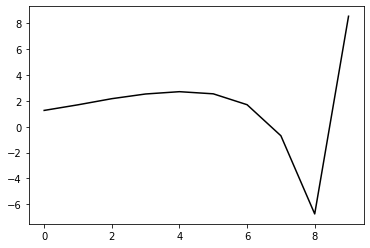

334400 0.23862001983457737
0.5474490040886963 -0.2780913953291207 0.4137103084908401 0.3538777048865488
[ 1.29322603  1.5588083   1.95313536  2.27992589  2.43322053  2.25481883
  1.40570834 -0.99685598 -7.0386801   8.49803696]


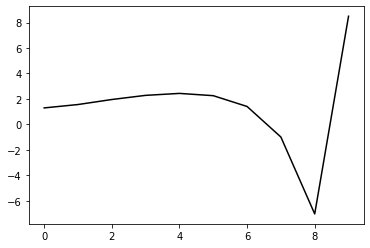

335500 0.2340345626600799
0.5861226835022667 -0.28018277742680503 0.4237048117649093 0.3479273860244023
[ 1.21477042  1.7556359   2.18652848  2.52978168  2.69956316  2.53327613
  1.6903628  -0.70948194 -6.75005487  8.545141  ]


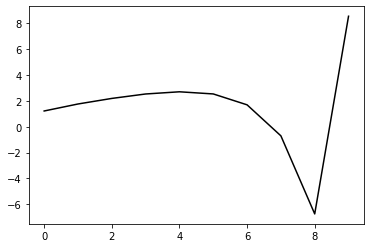

336600 0.3813617116624865
0.5911672491870145 -0.2897242928982478 0.4346443638159904 0.33130172755806336
[ 1.10926349  1.81841816  2.23760928  2.54414022  2.67462855  2.47182186
  1.59526504 -0.83467377 -6.90184172  8.53375225]


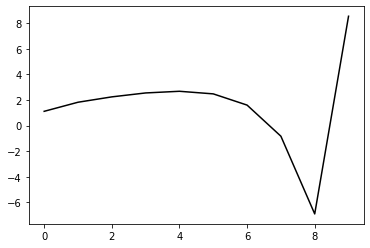

337700 0.18683140293582517
0.5647763727092144 -0.2954077356813411 0.4311805381860868 0.34816828361211855
[ 1.2295406   1.72553514  2.17170609  2.51050092  2.66803055  2.48836774
  1.62909    -0.78734307 -6.83695285  8.60483734]


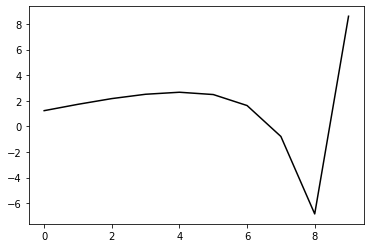

338800 0.2371831699940911
0.5381662407639671 -0.29045793629108496 0.4213597007522151 0.3493285082844869
[ 1.27159023  1.63857726  2.03874411  2.34772484  2.48355447  2.28977432
  1.42043029 -1.00422861 -7.06154055  8.46675765]


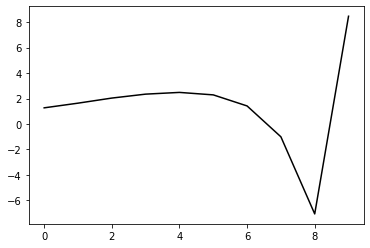

339900 0.18907289596329827
0.604269791196679 -0.27187308289038636 0.4205381366596819 0.3414293040826771
[ 1.16170185  1.86574015  2.31259254  2.60458357  2.7145177   2.49731389
  1.60819412 -0.83396383 -6.91298466  8.56255914]


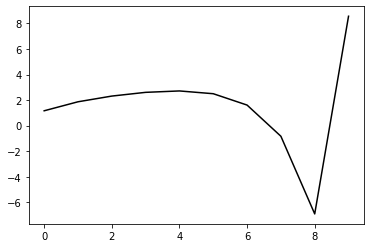

341000 0.27593428107387735
0.549007042328044 -0.30384477488283135 0.4367304501937014 0.3532299843895744
[ 1.30516951  1.56550459  2.08876034  2.45260886  2.61842229  2.44914943
  1.60008094 -0.80971305 -6.86590107  8.47142759]


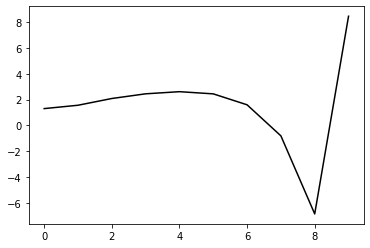

342100 0.31840222489157255
0.5202260801562504 -0.32452380273427334 0.4506950831335572 0.33303678193221586
[ 1.24017776  1.48191602  1.89751183  2.22071962  2.35964401  2.17396021
  1.31685246 -1.0972583  -7.16332243  8.50653404]


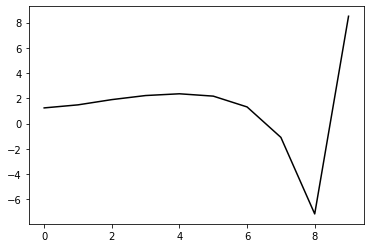

343200 0.21345976994991134
0.5783199084737225 -0.2902284468140862 0.42810050378757397 0.3451879377444105
[ 1.22381853  1.74171281  2.16759814  2.50077776  2.64564274  2.45433425
  1.58598572 -0.84051844 -6.90584593  8.4857547 ]


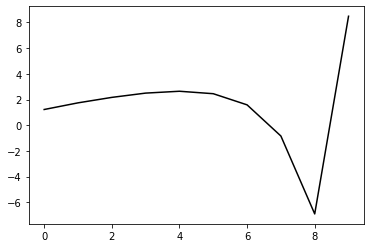

344300 0.17704238963318042
0.5648560882263192 -0.28194587374063046 0.42230220070747243 0.3469485155354537
[ 1.26254248  1.70515731  2.15481001  2.48858918  2.63415335  2.44237526
  1.57272724 -0.85686738 -6.93217243  8.57400163]


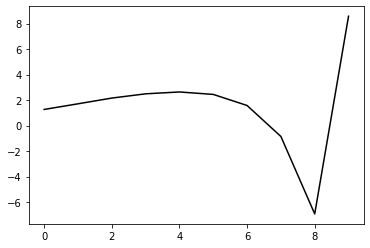

345400 0.2011360043262713
0.5597109122542197 -0.2897157050987432 0.4285382931780327 0.34120903469086344
[ 1.23318742  1.78559125  2.2278047   2.5563819   2.69051672  2.48299303
  1.59579616 -0.85122427 -6.94162941  8.4763673 ]


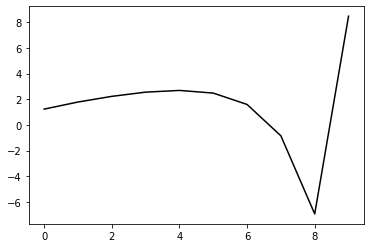

346500 0.36626866347432496
0.6092561120813607 -0.28993291162021134 0.43735496960069514 0.3455440020244847
[ 1.15117821  1.94875921  2.4724723   2.84761788  3.01689567  2.8329468
  1.95931784 -0.48082171 -6.57661445  8.57846272]


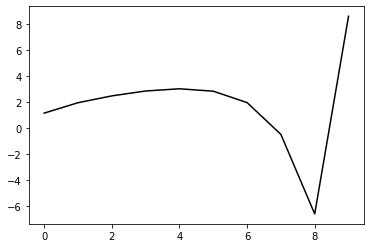

347600 0.7366890364235743
0.6323919447145433 -0.2855805881199928 0.44123265624154234 0.3337739623629076
[ 1.06407776  2.03571548  2.55589695  2.9175566   3.06965484  2.87055921
  1.98408789 -0.46730096 -6.57308573  8.51058412]


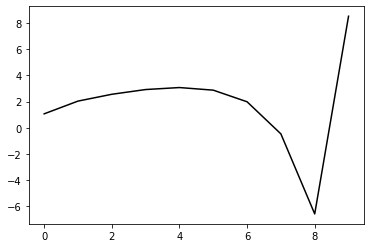

348700 0.2343272822908611
0.5469980651643772 -0.2942649373162333 0.42908777592070774 0.3545556117829364
[ 1.27485985  1.63984944  2.10507914  2.45414643  2.60827508  2.42606114
  1.56485877 -0.8587548  -6.93755904  8.52958298]


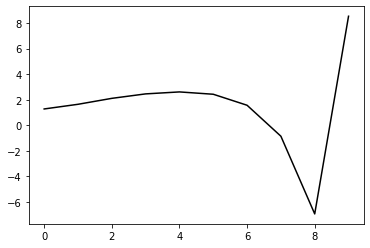

349800 0.30464298574384435
0.5635509747544446 -0.2719490795362603 0.4146274915777317 0.3587099897625841
[ 1.30826303  1.6051593   2.05887816  2.41307536  2.5758815   2.40052555
  1.54492404 -0.87534875 -6.95892881  8.4984796 ]


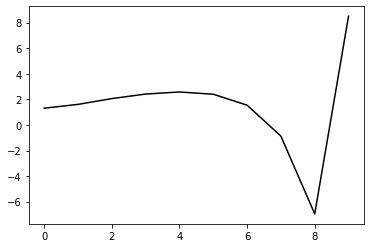

350900 0.21774513394536987
0.580179207557028 -0.2884256509899794 0.43326507746622633 0.3474726803384773
[ 1.26363367  1.69970738  2.167431    2.53410936  2.7122718   2.54679801
  1.69638223 -0.72169961 -6.80491417  8.56558675]


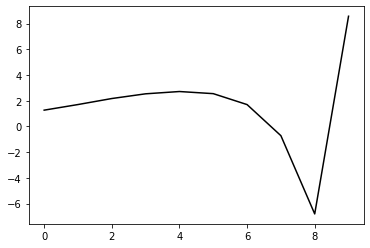

352000 0.25433362364513273
0.5750965929576802 -0.2862313320151427 0.4281355184960175 0.35623676842185636
[ 1.26543855  1.71572377  2.17315804  2.52537991  2.70498027  2.551705
  1.71534379 -0.69000149 -6.76644403  8.5231846 ]


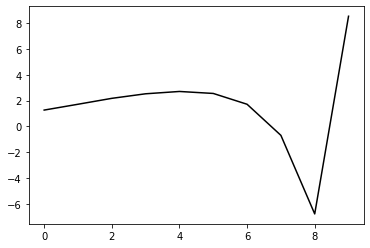

353100 0.6276319466596668
0.5643384589777626 -0.33487555096126576 0.4730133242821878 0.3255381251586377
[ 1.11904597  1.66236844  2.14517041  2.52335601  2.7231577   2.58548826
  1.75895956 -0.64131891 -6.71892375  8.54009872]


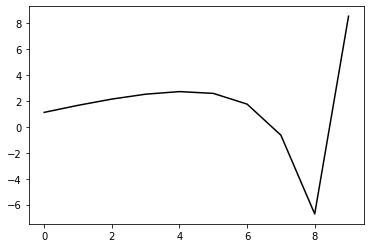

354200 0.1846741502208144
0.6057444121513056 -0.2708298099426765 0.42514047769281804 0.34691537222507113
[ 1.23014775  1.72088104  2.15701107  2.53981957  2.75827034  2.64071744
  1.82962006 -0.563472   -6.64731927  8.46371461]


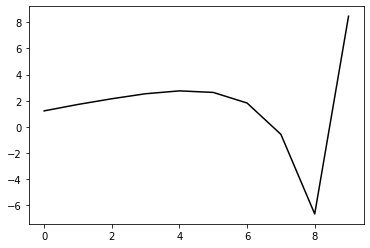

355300 0.14515621155728894
0.5975211333597644 -0.28250945088901724 0.43468598290151794 0.34100915464653114
[ 1.21745274  1.68849432  2.12805811  2.50740486  2.73479478  2.63315535
  1.83839348 -0.54117423 -6.61550006  8.54385515]


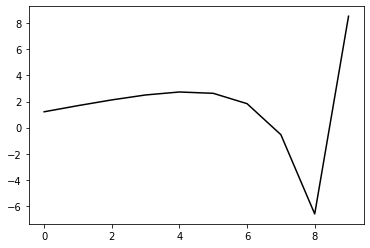

356400 0.2040207108212924
0.5615183100683898 -0.2855418935143096 0.4314522614298572 0.3342859400130573
[ 1.24666874  1.69017581  2.07508252  2.40236071  2.57863744  2.43583586
  1.61069757 -0.79200305 -6.88673461  8.49040766]


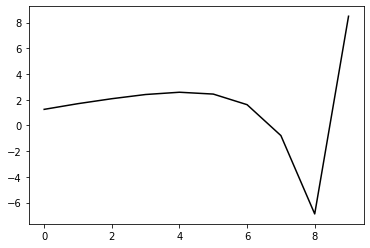

357500 0.695582101071785
0.5836987806359791 -0.30741643622578385 0.4541588938770405 0.32924520984670963
[ 1.0937767   1.75912573  2.17140906  2.49926347  2.67916355  2.54262338
  1.72253599 -0.67731841 -6.76968473  8.53884621]


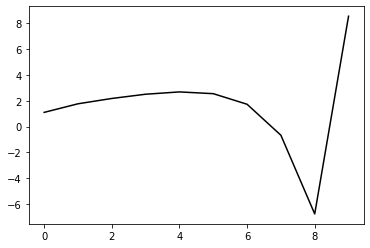

358600 0.1511651156443044
0.5738520203882169 -0.2795283795721811 0.42809349204087277 0.34194306928135343
[ 1.22107407  1.77097127  2.11557421  2.42077974  2.59372025  2.45965255
  1.6451531  -0.75087518 -6.84626297  8.51845867]


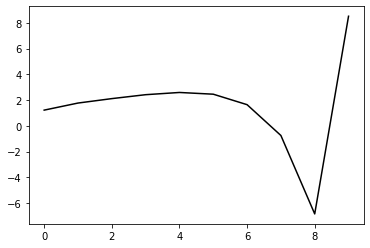

359700 0.9623878604500993
0.5612439905841384 -0.26661280787073816 0.41123261417663953 0.3772330233684453
[ 1.46414754  1.57095508  2.03380899  2.39315413  2.60876754  2.51354756
  1.73262666 -0.63674086 -6.71688689  8.47168535]


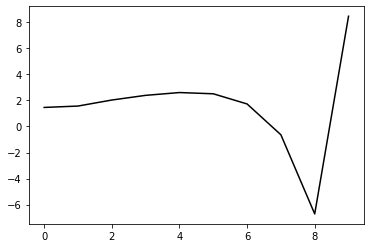

360800 0.8570726623058316
0.5190590160292475 -0.2576730418254208 0.3958297370093765 0.3792548140870577
[ 1.39793263  1.59726732  1.99519143  2.30308852  2.46201183  2.3155599
  1.49195602 -0.91521376 -7.03496257  8.50211284]


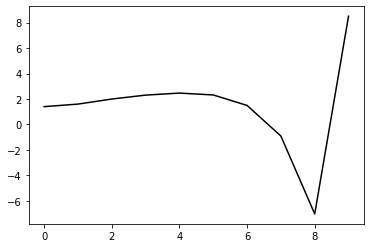

361900 0.17889901545226522
0.5707423853477283 -0.2846201541987349 0.43160906352116835 0.34722422528117286
[ 1.22585269  1.88135336  2.31545654  2.63146766  2.78578548  2.62800079
  1.79080915 -0.63091282 -6.76482918  8.52764755]


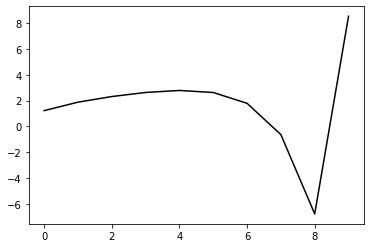

363000 0.24545043554460466
0.55687587286307 -0.2835428809487589 0.4297728044066708 0.3445169679848657
[ 1.2448271   1.71259642  2.16270006  2.49042499  2.64792111  2.49578
  1.66776714 -0.74610299 -6.88154434  8.60912326]


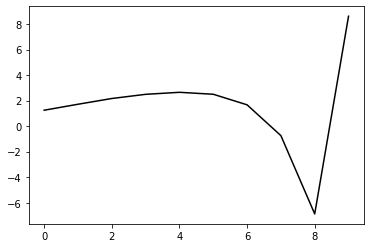

364100 0.3807913676651223
0.6135992324963493 -0.24236623029810178 0.4204856066453102 0.31163636898251945
[ 1.07702065  1.8803877   2.2849626   2.56327115  2.66667363  2.46378791
  1.59464324 -0.85604041 -7.04607596  8.50566796]


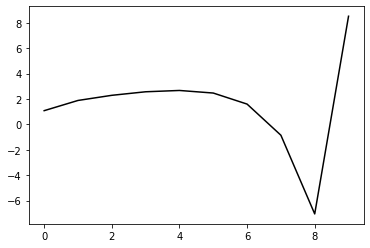

365200 0.2791548098850059
0.5556806278202088 -0.265390761554325 0.4146008266317273 0.3506687824370679
[ 1.2627443   1.70829286  2.16068596  2.48464258  2.62604655  2.45393139
  1.6119918  -0.81359853 -6.96457737  8.4938489 ]


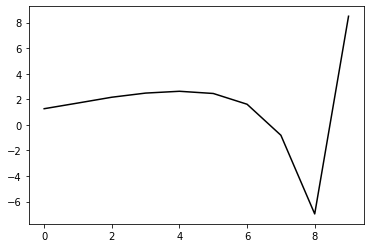

366300 0.19765133451433942
0.532696803321322 -0.29662173360824323 0.43356014751243027 0.34328476581487605
[ 1.24335103  1.75567334  2.1879322   2.50840759  2.63886934  2.44935227
  1.58957294 -0.85290984 -7.01828515  8.5282708 ]


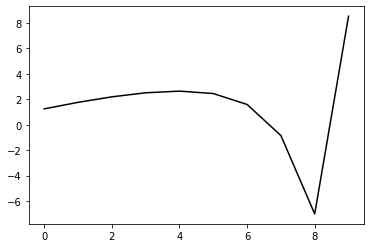

367400 0.198858869653685
0.5620769324875934 -0.2759898821748573 0.42151318504842206 0.356652295337176
[ 1.27213258  1.73438894  2.23751908  2.59882662  2.76246831  2.59606579
  1.75329822 -0.67641146 -6.83525633  8.44876408]


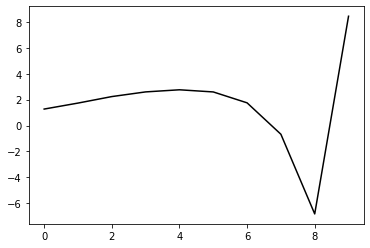

368500 0.18763339632315515
0.5804670124075646 -0.26849484556562886 0.4264336753540771 0.34751136055032245
[ 1.21974261  1.80037819  2.31409399  2.71524548  2.91497795  2.77663041
  1.95609324 -0.45770288 -6.61877168  8.53114814]


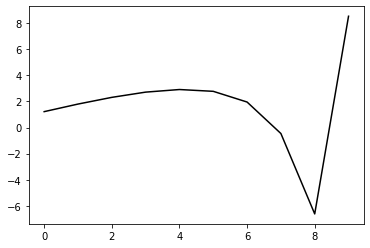

369600 0.24867149721545018
0.5542831372496482 -0.27202080243271487 0.4280086304511923 0.3400333548666498
[ 1.29955633  1.57363594  2.03641438  2.40199627  2.58273638  2.43566702
  1.61534642 -0.79313048 -6.94922716  8.58762585]


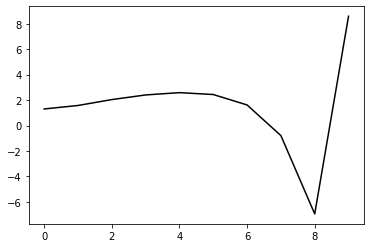

370700 1.0353588348927243
0.6216288909777818 -0.30759667218799647 0.47720168457721374 0.29645567343095164
[ 0.98612871  1.98197579  2.4920704   2.87393569  3.06253283  2.91006826
  2.0760356  -0.35023048 -6.53584452  8.54721416]


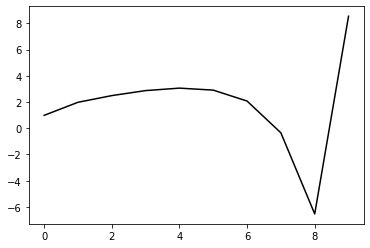

371800 0.17276229863964124
0.5934597355739029 -0.2628393662783089 0.433376713863154 0.34311013255428574
[ 1.23164936  1.72931313  2.2366749   2.65770451  2.89016435  2.78343431
  1.99197314 -0.39622925 -6.54978274  8.5464653 ]


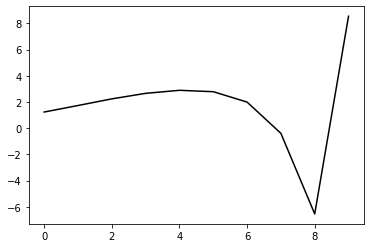

372900 0.23251425407966148
0.5665628505079774 -0.2683429599998241 0.4274524087642105 0.34057095248511016
[ 1.2325565   1.67457835  2.09461569  2.45009594  2.62769896  2.47203556
  1.63860442 -0.78313631 -6.9584403   8.48439168]


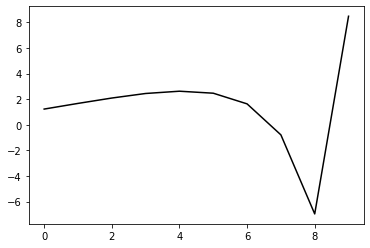

374000 0.25084247285826555
0.5685113227138591 -0.27144339000833473 0.4299844926458737 0.34254723205164767
[ 1.27079956  1.67712547  2.10651495  2.45231181  2.62584254  2.4672531
  1.63091046 -0.79233296 -6.96883154  8.54207988]


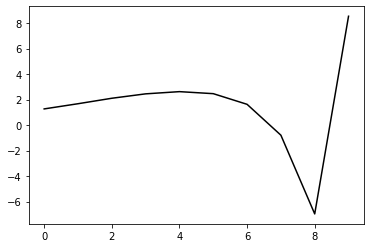

375100 0.18936831754646125
0.572321396105074 -0.28103125094562104 0.4363970222514238 0.3495159111078846
[ 1.21822952  1.79609473  2.24261184  2.60882398  2.80437154  2.66678407
  1.8474052  -0.56190593 -6.72351037  8.49694011]


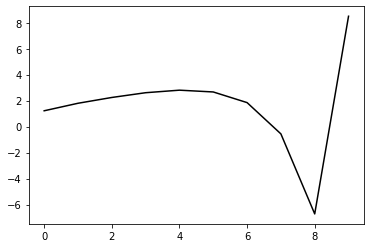

376200 0.23083044138719944
0.5469890249200826 -0.3086537451581088 0.4549716528597908 0.34335048249953726
[ 1.21342739  1.75476266  2.20230858  2.56212994  2.75639846  2.62375285
  1.8118995  -0.58910094 -6.74167233  8.60011836]


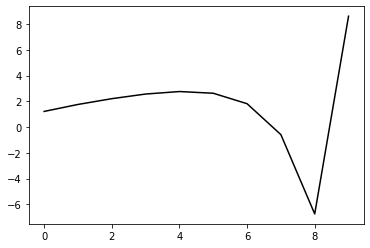

377300 0.15917786428823458
0.5752440261340948 -0.2787538367837898 0.4357265816753316 0.3434757314970079
[ 1.21785092  1.78231763  2.21296313  2.5537936   2.73229505  2.58888074
  1.76904068 -0.63855193 -6.79926177  8.46176628]


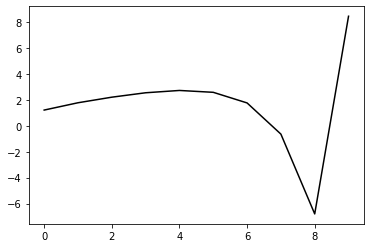

378400 0.17652197099828063
0.5792276959160351 -0.2708098047325291 0.4285480785774004 0.3485221843453565
[ 1.25162218  1.77821615  2.2185155   2.5579125   2.7307978   2.5826649
  1.75882614 -0.65172923 -6.81333172  8.55740365]


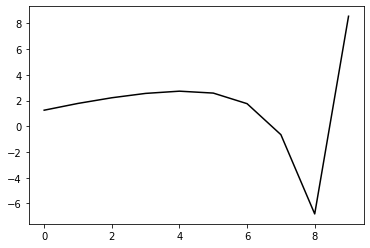

379500 0.20989865633443502
0.5901635844219114 -0.2677115380320392 0.42886481898879536 0.3460174966259107
[ 1.20628474  1.8628966   2.32904552  2.66379103  2.82378866  2.66158947
  1.82432655 -0.59876149 -6.77322903  8.51713261]


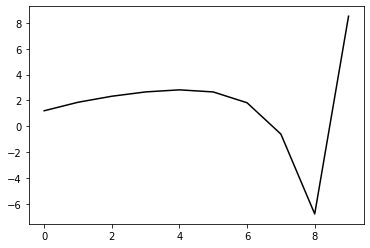

380600 0.35279031490416807
0.5832448630329241 -0.26772472196923275 0.4276796409695069 0.35708724508166206
[ 1.30495441  1.68642554  2.20698941  2.61261332  2.83077506  2.71754234
  1.92034889 -0.47158605 -6.63106429  8.56029128]


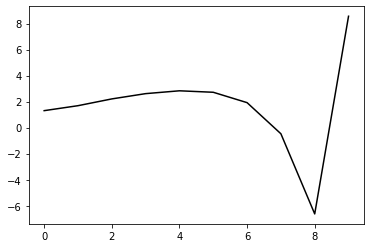

381700 0.6898994105346221
0.5523840791010696 -0.25993068676162273 0.41623474919198594 0.3618719722152003
[ 1.39900115  1.52442163  1.97559775  2.36484885  2.58090528  2.46916895
  1.67660081 -0.71024716 -6.86532146  8.50340185]


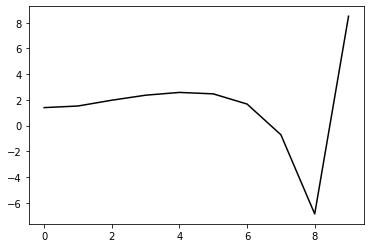

382800 0.22907858745787923
0.5504403886975434 -0.27207640910949227 0.4304486083318727 0.34899315826917254
[ 1.29990433  1.70185291  2.13605591  2.51393076  2.72500793  2.60595626
  1.80418517 -0.59359501 -6.76322089  8.54491151]


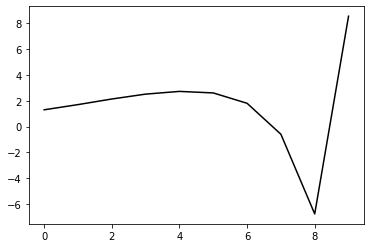

383900 0.18022475020649692
0.5573458175035791 -0.27175512227347876 0.43348807392031824 0.33938430569131334
[ 1.22545279  1.76760933  2.20059372  2.55987383  2.76044419  2.63500036
  1.82765342 -0.57595566 -6.75650682  8.47453369]


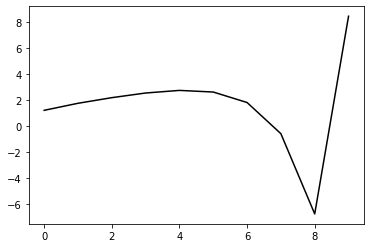

385000 0.5858914131695978
0.5576393724094074 -0.26019572387627515 0.4232109120798598 0.35533006164672654
[ 1.34434364  1.67485354  2.13646923  2.51846609  2.74359734  2.64302736
  1.85621769 -0.53145148 -6.70257034  8.59557752]


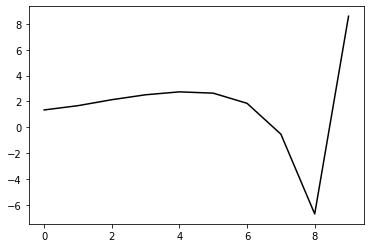

386100 0.19739146065469024
0.5657795821196473 -0.27187264719018894 0.4334336768315297 0.3508619845600886
[ 1.21650136  1.85497112  2.30282304  2.64766167  2.83738729  2.70986752
  1.90261767 -0.5010411  -6.68457968  8.49142892]


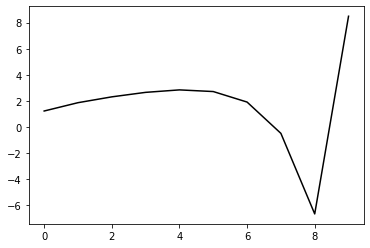

387200 0.21007562280033154
0.5444430170140722 -0.28666704770641427 0.4440310891811532 0.3387075717704867
[ 1.18477414  1.77253074  2.2070766   2.55017758  2.73122409  2.59861356
  1.78941591 -0.61515656 -6.8010336   8.56656879]


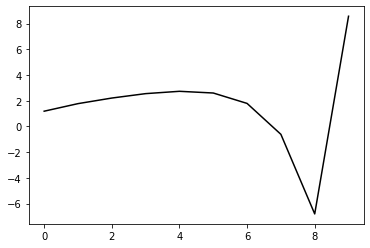

388300 0.1677444926588543
0.5745730799320341 -0.2634756280432413 0.42836829601994236 0.34328338255129504
[ 1.19819616  1.76869625  2.18737726  2.52807974  2.71164343  2.58358075
  1.77974458 -0.62105172 -6.80734288  8.51175969]


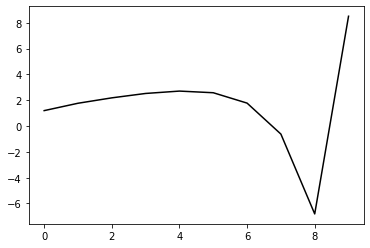

389400 0.33475166707763376
0.513718163318869 -0.30463233087896346 0.4508508912034719 0.3267898309090126
[ 1.15744569  1.64829877  2.03656849  2.33201114  2.47136095  2.30822096
  1.47915832 -0.93970133 -7.1407173   8.53338929]


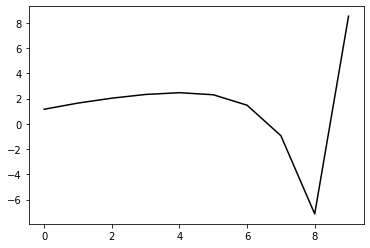

390500 0.25643763475956866
0.6101984124957158 -0.2511226433645454 0.420154663593639 0.3532827909752764
[ 1.21655125  1.90506477  2.39184664  2.74738433  2.92440405  2.78203823
  1.96427598 -0.44987356 -6.65493754  8.5166149 ]


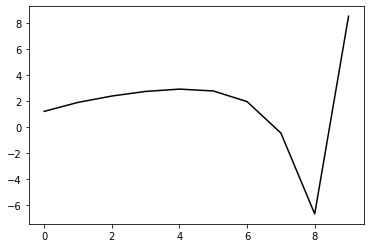

391600 0.11449469127249419
0.6012994334138905 -0.2715675269140232 0.4374419165878943 0.3476344047374479
[ 1.18944215  1.78019038  2.33123153  2.73749142  2.94436099  2.82489008
  2.02629076 -0.37330404 -6.57492162  8.62283431]


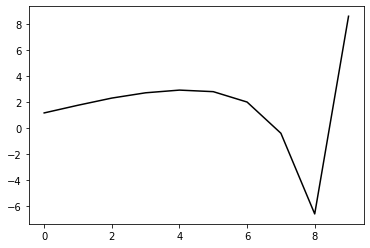

392700 0.18373988117577317
0.5742899861848288 -0.2764043836054398 0.4367541552955962 0.3450832043215027
[ 1.21027255  1.74387552  2.20778317  2.57409824  2.74556127  2.59464138
  1.77702582 -0.63077677 -6.82986194  8.52090263]


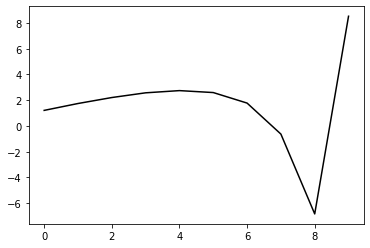

393800 0.20902259199013604
0.5702174873372166 -0.2742068558664872 0.43206135623759384 0.3586094577805303
[ 1.26586295  1.72094652  2.20029135  2.59356988  2.79750157  2.66895257
  1.86650636 -0.52963622 -6.72000912  8.55738147]


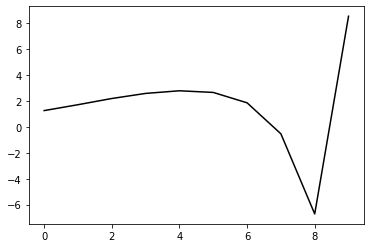

394900 1.0037523922676608
0.6546167663851543 -0.3168713962672468 0.4931683221361864 0.28470077884076533
[ 0.84933037  2.00776159  2.56713819  2.94647442  3.13410614  2.98403615
  2.15606814 -0.26672063 -6.49800046  8.4821459 ]


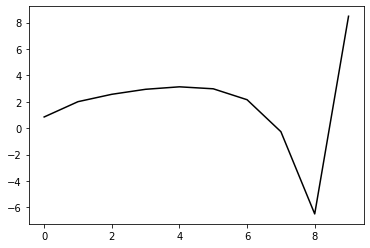

396000 0.5327803200916907
0.5821876241459928 -0.3095698708108265 0.46873594305959404 0.3368356056704492
[ 1.22042713  1.34693808  1.99424902  2.49780959  2.78221002  2.72285053
  1.97633163 -0.37396925 -6.5463267   8.57821231]


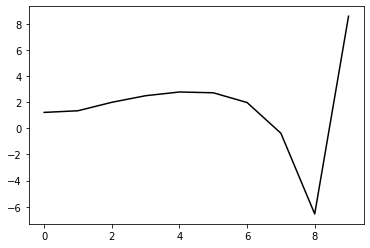

397100 0.3117638291271298
0.5591825555241995 -0.2934923347770293 0.4559887086120893 0.3132536092020869
[ 1.17947279  1.52717583  1.87644198  2.23401768  2.40702863  2.243704
  1.41503551 -0.99565337 -7.23366325  8.46765195]


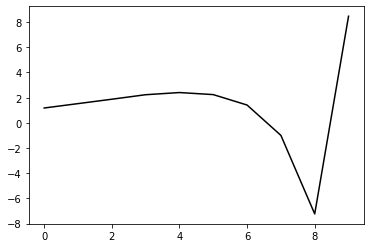

398200 0.2868323984456401
0.5532159081925313 -0.28163467261708963 0.4375113118555107 0.3429975339023503
[ 1.27669831  1.60275496  1.959908    2.31227152  2.50269197  2.35038352
  1.5223973  -0.89055961 -7.11717714  8.40147441]


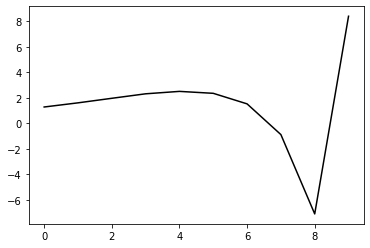

399300 0.25931445940750175
0.5888085272055155 -0.29140252830523955 0.4541023600423089 0.3306305383837013
[ 1.17588252  1.74787648  2.14492386  2.4849801   2.6709255   2.51544273
  1.67950389 -0.74246721 -6.97727575  8.47440846]


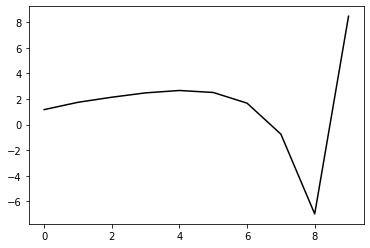

400400 0.17432931061198134
0.604407912511982 -0.26988866022761443 0.43573177839857924 0.35319206856973945
[ 1.23111735  1.77440465  2.2047378   2.56276493  2.76901243  2.63746858
  1.81953383 -0.58846507 -6.81280554  8.54311151]


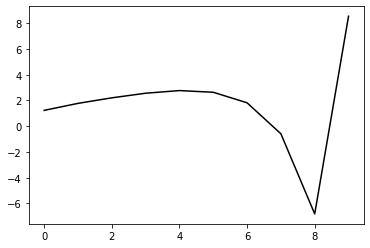

401500 0.22006508223581753
0.6107915216965375 -0.2652495697087795 0.43151737530151213 0.35467562144095577
[ 1.24016526  1.80605462  2.24415067  2.58855775  2.77493488  2.62951
  1.79956072 -0.6176434  -6.84383192  8.51692828]


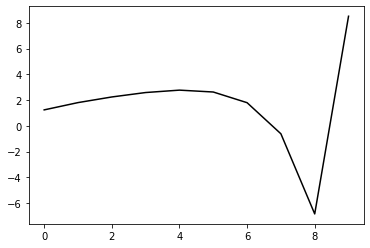

402600 0.11634860450818443
0.5975612175845293 -0.2735101264620288 0.43667378079139957 0.3537010463539301
[ 1.19412891  1.75924833  2.21421039  2.54969792  2.71894621  2.5611262
  1.72089501 -0.70538864 -6.94090817  8.43209749]


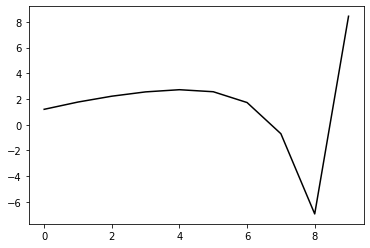

403700 0.15988442142684117
0.6297488318382021 -0.2582753259329895 0.42943586185131283 0.3528046953177802
[ 1.2121825   1.88362027  2.36237137  2.70189795  2.85793527  2.68046048
  1.81882661 -0.62821637 -6.88294687  8.55361377]


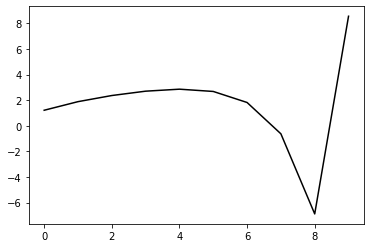

404800 0.9661991758451368
0.541345168817501 -0.24965484331504856 0.39868859736885315 0.4021237972968374
[ 1.42734432  1.58711993  2.07767904  2.44339758  2.61907593  2.46120339
  1.618813   -0.81085117 -7.04905502  8.48400661]


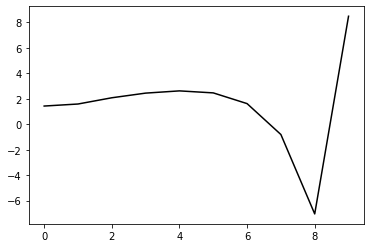

405900 0.2756028280117866
0.5498511352803206 -0.2702480749187846 0.4289178597278395 0.3519850249476724
[ 1.24180463  1.6510699   2.07346263  2.39804634  2.53810479  2.34923257
  1.48169428 -0.9714726  -7.24870884  8.53075615]


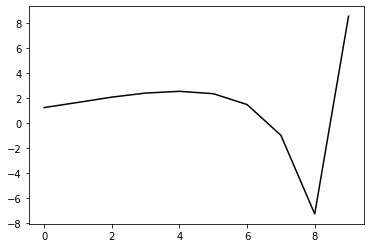

407000 0.24730842953726323
0.5817917812331191 -0.2636365134969143 0.43024266784314896 0.3536972562572676
[ 1.27186655  1.66455729  2.12018855  2.47539144  2.64939318  2.49194825
  1.65225421 -0.7771367  -7.02708551  8.55453571]


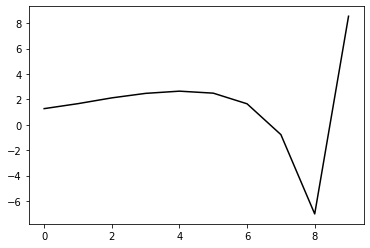

408100 0.17724332750143404
0.5842830558374246 -0.2788854517951786 0.44241892680269085 0.36132040059778375
[ 1.22528698  1.7876273   2.29272551  2.69987306  2.92058597  2.79764801
  1.98063222 -0.43592684 -6.69064563  8.53744706]


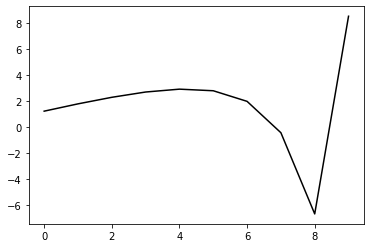

409200 0.31925961281930726
0.5268392935265437 -0.28268916346902045 0.4329214580084906 0.35389386402816136
[ 1.19848996  1.58397697  1.93607849  2.23079005  2.36670219  2.18460637
  1.32777767 -1.1155098  -7.3883479   8.49915053]


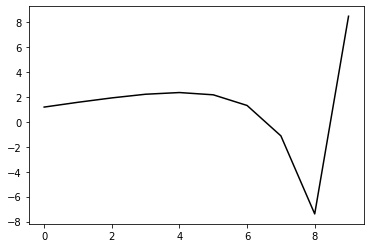

410300 0.25836329798084456
0.6198451949436014 -0.273989615674347 0.44118689238043024 0.3591852127776687
[ 1.13145637  1.95035454  2.43621417  2.78133441  2.94601889  2.77794693
  1.92547856 -0.51851695 -6.79095509  8.53248739]


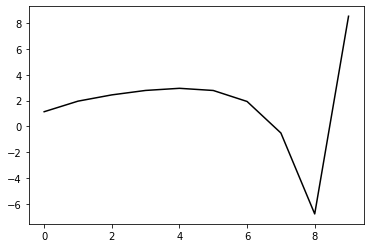

411400 0.1718230968102875
0.619019833564771 -0.26459113204871604 0.43180267516811593 0.3679943405876109
[ 1.22002176  1.83881523  2.34834339  2.7215872   2.90611209  2.75493219
  1.91591633 -0.51791438 -6.78272059  8.49196447]


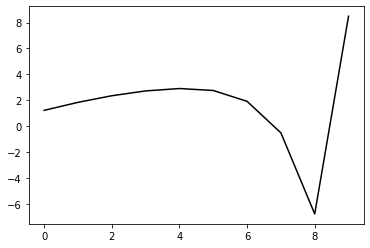

412500 0.21261918078112965
0.5968627365621272 -0.2724745691292038 0.43568360083511104 0.3652044839101399
[ 1.20620582  1.74518016  2.23749946  2.6295157   2.82933976  2.69022646
  1.861278   -0.56524754 -6.82406832  8.54335651]


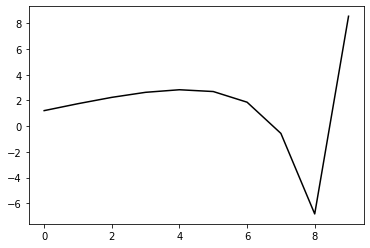

413600 0.3166791890562131
0.6003131079639996 -0.23676392410055386 0.41779263906846265 0.35706130362976246
[ 1.23539313  1.70256561  2.12493626  2.47302875  2.64232554  2.47841793
  1.63098075 -0.8118854  -7.10294181  8.48989764]


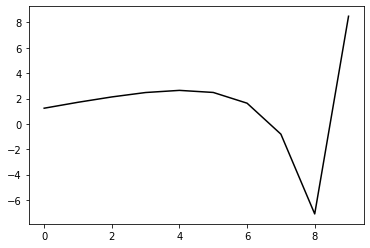

414700 0.15125902083533208
0.6067636948284648 -0.25922575275536647 0.4318939433332244 0.3671535525280393
[ 1.18988602  1.81485064  2.31888933  2.72591745  2.95269736  2.83402874
  2.01702492 -0.4067232  -6.68857272  8.54001139]


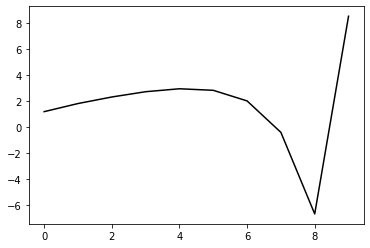

415800 0.20047330713964112
0.5510755435596746 -0.28453292075621406 0.439860340804639 0.36280617731080783
[ 1.17814072  1.61957987  2.05069752  2.40842427  2.59566028  2.45050339
  1.61634674 -0.81863896 -7.10190827  8.43808413]


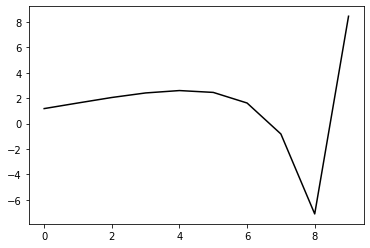

416900 0.5017703675730394
0.5927893164790698 -0.27782938720918093 0.4448626755809226 0.3469165632973211
[ 1.09474768  1.79358124  2.23901087  2.5809582   2.74958994  2.58371821
  1.72824802 -0.7275657  -7.02987222  8.53672804]


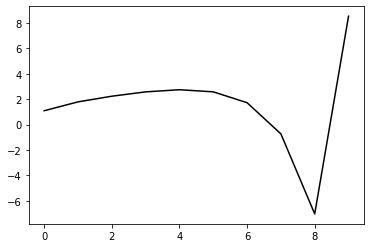

418000 0.2498133199335307
0.5687965805478963 -0.289742272589631 0.44347344131349903 0.35904959351864935
[ 1.15582383  1.73242725  2.18656987  2.52434684  2.68731605  2.51835162
  1.66093076 -0.79568826 -7.09102584  8.48143083]


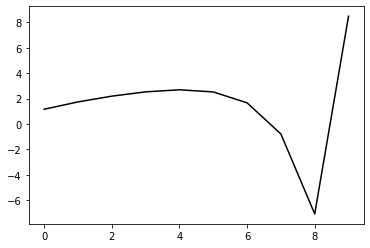

419100 0.20480670343010257
0.6130239531008246 -0.26186483335222954 0.42668742378855123 0.37828751108552383
[ 1.20066134  1.7886409   2.31703951  2.70537078  2.90545477  2.76494763
  1.92800007 -0.51428892 -6.80049857  8.58543575]


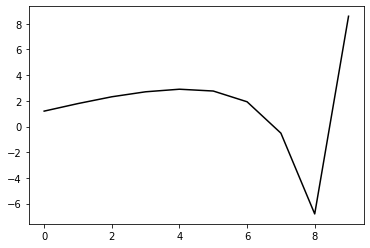

420200 0.1885632980056051
0.6051483970290656 -0.2711200230298781 0.430541141708103 0.37022515676723594
[ 1.18283057  1.78233604  2.27407508  2.64951453  2.82952562  2.66669415
  1.80872021 -0.65188086 -6.94456938  8.4873668 ]


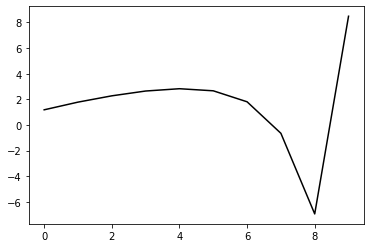

421300 0.24203744710909003
0.5928813212064037 -0.2659012938776252 0.4222078018680261 0.3818425386238919
[ 1.25157718  1.64794878  2.13961519  2.53717177  2.74317586  2.60410244
  1.76658514 -0.67747806 -6.95822687  8.49450135]


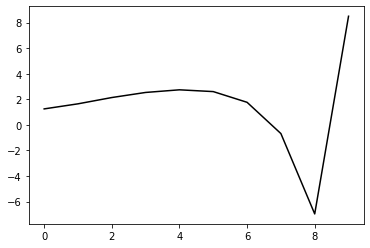

422400 0.17265265581244052
0.613461040873639 -0.26582084078745627 0.42508548761811643 0.3719680374043445
[ 1.18172261  1.72084945  2.16010995  2.50832904  2.67621151  2.50645857
  1.64568727 -0.81619741 -7.10894666  8.42615566]


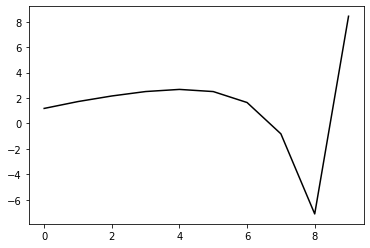

423500 0.1933288375205893
0.6332323098317233 -0.2622699665369726 0.42817265428909407 0.37218935744753306
[ 1.146968    1.84361529  2.33301857  2.70250679  2.88584848  2.72709729
  1.87299434 -0.58682244 -6.88976501  8.49288507]


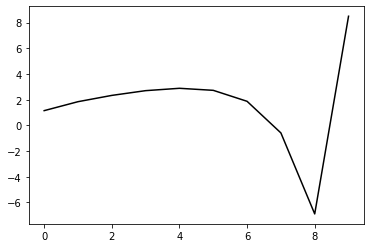

424600 0.08780334240319988
0.6220016029155999 -0.27789996562660174 0.4377220162533227 0.3778199022682616
[ 1.16135729  1.78469973  2.30877776  2.71141015  2.9223266   2.78870715
  1.95567006 -0.48771448 -6.78343932  8.53802922]


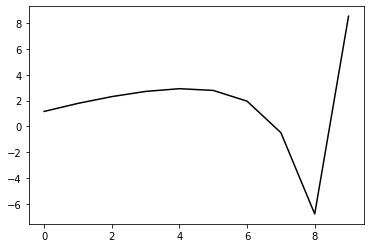

425700 0.23278389549498965
0.565528450920595 -0.291064584990608 0.43703355762706997 0.38090403149531615
[ 1.2350542   1.49551834  1.93945583  2.31702612  2.52577089  2.40432014
  1.58967747 -0.8342708  -7.10822349  8.4701332 ]


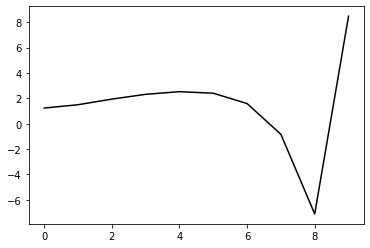

426800 0.2424484540001018
0.5997647119666674 -0.2919781744733789 0.4458841961955519 0.37463569867618135
[ 1.1509832   1.66659479  2.13142158  2.52956399  2.76321842  2.66125039
  1.85961403 -0.5573751  -6.8297322   8.47696696]


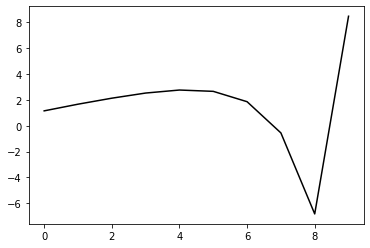

427900 0.1618952381314729
0.6497297451992043 -0.26080012299524274 0.4300518342348862 0.3770766044370074
[ 1.15761465  1.78032235  2.2424723   2.61808914  2.8349174   2.72068418
  1.90987906 -0.5151097  -6.79612446  8.53683597]


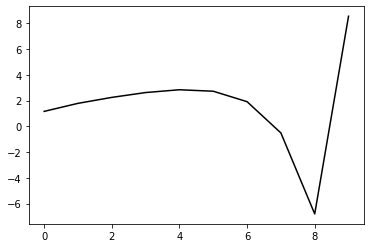

429000 0.252920856787305
0.5948293905010453 -0.26830834145832255 0.42627358072920446 0.37532687678437954
[ 1.23879198  1.55877616  1.97754905  2.32910218  2.52698847  2.40417932
  1.59049098 -0.83554967 -7.11328671  8.47683671]


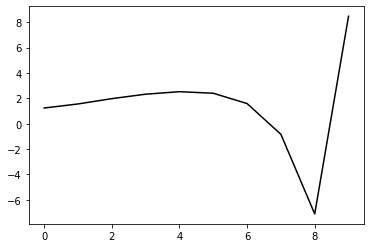

430100 0.22188196566321894
0.6159208348571952 -0.2723371742562267 0.43442847163053755 0.3754595210680689
[ 1.21792079  1.67674606  2.11647173  2.49203859  2.71283667  2.61063939
  1.81467513 -0.59833186 -6.86710857  8.47741602]


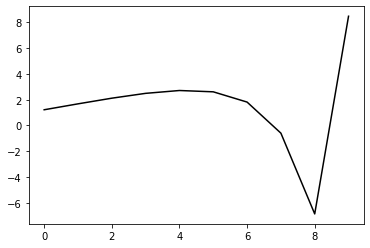

431200 0.1880810902267223
0.6229788619237501 -0.273196305832905 0.4401126926342027 0.3621672786683726
[ 1.14848975  1.70750917  2.13109075  2.49396081  2.70903669  2.60649463
  1.81278685 -0.59930153 -6.87337572  8.5336892 ]


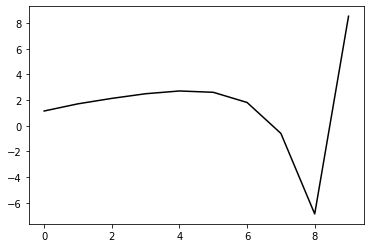

432300 0.2154956694076952
0.5497325485065128 -0.28863988007386543 0.43865489489113085 0.364077799098712
[ 1.23832111  1.50270059  1.88372871  2.22216236  2.42087145  2.31083546
  1.51556553 -0.89664403 -7.17237004  8.46319913]


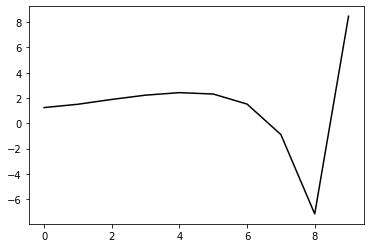

433400 0.3182179681448421
0.6281019927834317 -0.2817143494675509 0.44793872857379374 0.36807604393605836
[ 1.13023496  1.81766944  2.28538351  2.67888404  2.92182877  2.84247074
  2.06604398 -0.33682907 -6.62041141  8.55878308]


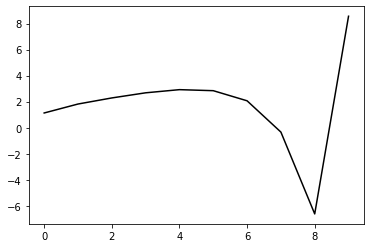

434500 0.8930229705003438
0.6081794045639078 -0.25070132327677336 0.418681861706726 0.3866549540083074
[ 1.36639647  1.56053269  2.00808844  2.39627243  2.64506818  2.58278036
  1.82807405 -0.55441357 -6.81454276  8.54672629]


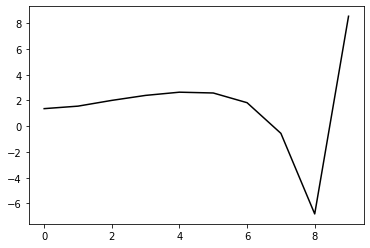

435600 0.5395894817722262
0.6208454836305842 -0.27624514068645456 0.4456418358888378 0.3428018680164978
[ 1.06221371  1.80332066  2.17021598  2.46703929  2.6355377   2.51479277
  1.72119377 -0.69120636 -6.98617475  8.5655725 ]


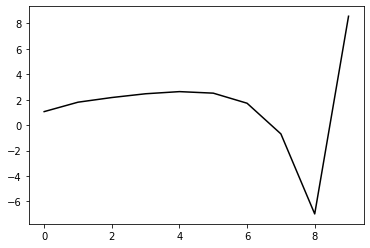

436700 0.2236787324720081
0.6089581127433111 -0.2669890173140793 0.42780885586337425 0.37600329267036536
[ 1.26258344  1.70116046  2.13146945  2.44847373  2.62932248  2.5196798
  1.73698924 -0.66548976 -6.94608216  8.6077333 ]


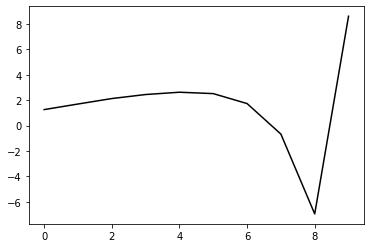

437800 0.20624784332669777
0.5832471694786396 -0.28132912834638 0.4355843451957859 0.37242866798965313
[ 1.22767943  1.64616544  2.09321306  2.41594175  2.59062927  2.47569912
  1.69124321 -0.71202321 -6.99372526  8.4998428 ]


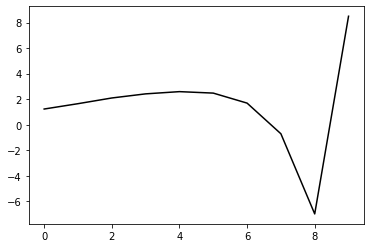

438900 0.21614991623818897
0.586479783166091 -0.2804160382507985 0.43326406522659006 0.3731682816598918
[ 1.19452684  1.66248824  2.09547121  2.41666069  2.58154055  2.45834617
  1.67193983 -0.73045602 -7.01310297  8.50117537]


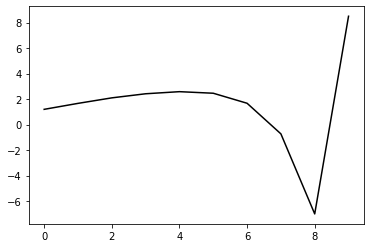

440000 0.2067262804021106
0.5964097447796154 -0.2829728155277958 0.4407506748666593 0.367517512438224
[ 1.18085043  1.67930774  2.12819769  2.48163432  2.67396587  2.57201655
  1.80552946 -0.58053077 -6.85458518  8.57541118]


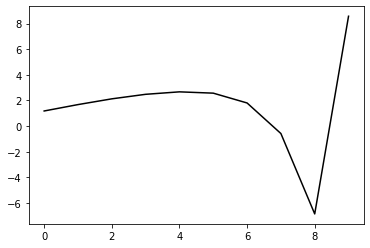

441100 0.20184612584135384
0.6170643428498543 -0.2669217969126964 0.4313613687456576 0.364669649644746
[ 1.18213391  1.72318461  2.14146388  2.47415934  2.65043967  2.53426328
  1.7605207  -0.62856045 -6.90487532  8.5303698 ]


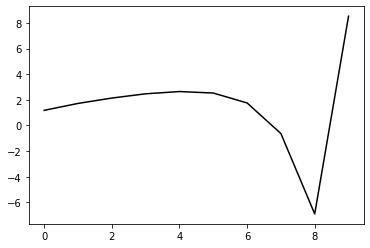

442200 0.18900432189282104
0.6162046939645777 -0.27689536769024337 0.4390863492078527 0.371435684964281
[ 1.15656872  1.78200383  2.26642542  2.6312346   2.82782455  2.72433729
  1.96147834 -0.41803673 -6.69494623  8.54036305]


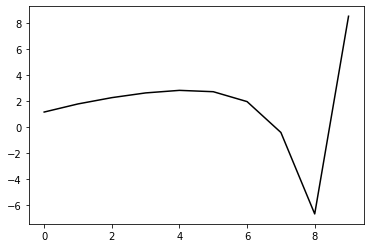

443300 0.15488897728109474
0.5857862513108425 -0.278104898414734 0.4345203140355492 0.38235885967169286
[ 1.23704968  1.59963266  2.06366471  2.45442483  2.68509362  2.61693388
  1.89143727 -0.45132041 -6.70156896  8.46360103]


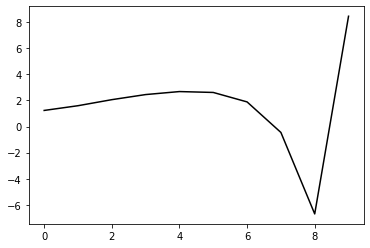

444400 0.2468722734359804
0.567450103235496 -0.2638891835406986 0.42340261499993687 0.37869540772324983
[ 1.25010971  1.52513935  1.9219863   2.25615891  2.44672543  2.35384377
  1.6201213  -0.71965286 -6.96821231  8.48941352]


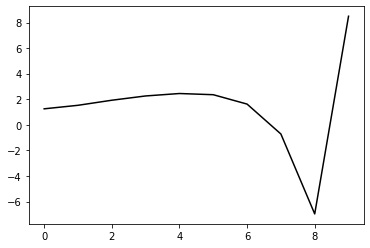

445500 0.2286467272359982
0.5949893625814766 -0.2645706618986238 0.4299018587058036 0.373532487119698
[ 1.19810307  1.6728105   2.09289569  2.43361632  2.62479242  2.52378936
  1.77867246 -0.57178852 -6.83039735  8.56896722]


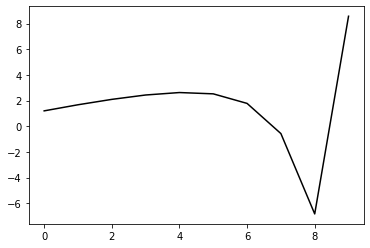

446600 0.1751997678765624
0.5887670596367971 -0.2708716059106823 0.4384805034194848 0.3558051416722038
[ 1.11505673  1.67675792  2.08053282  2.39354825  2.55733033  2.4324363
  1.66802929 -0.69747205 -6.97509285  8.53691715]


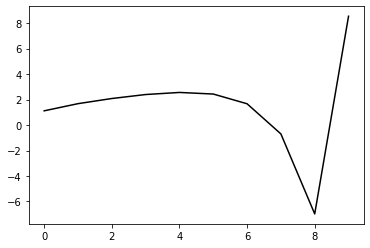

447700 0.21320058882574813
0.5443325122217033 -0.2776672314217465 0.43621254706171725 0.3660993152327757
[ 1.20051687  1.53492605  1.92222039  2.25687471  2.44754409  2.34975618
  1.61116517 -0.72922925 -6.98547398  8.5064748 ]


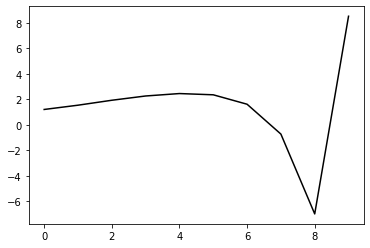

448800 0.24694075673237026
0.5447442404370176 -0.2592535978852459 0.4193328301440511 0.36901734733421915
[ 1.2391393   1.49911685  1.84576531  2.14030929  2.30054065  2.17885465
  1.42270372 -0.92943992 -7.20248538  8.44044697]


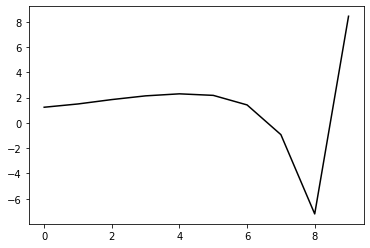

449900 0.251347670701735
0.5755766292316392 -0.2763863503189717 0.43836983949326597 0.3590862208742746
[ 1.12027144  1.68901017  2.07882319  2.37708374  2.53748356  2.4142975
  1.65539    -0.69811063 -6.96202137  8.47845795]


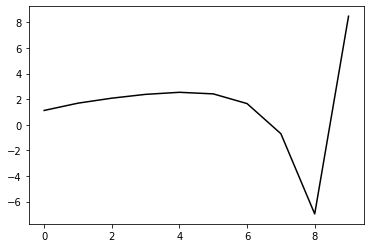

451000 0.27281977096943655
0.53341328444329 -0.28898876669926016 0.4444041155257731 0.36040128227856216
[ 1.13059762  1.49947275  1.87841794  2.18086804  2.34720161  2.2375968
  1.49684527 -0.83728046 -7.09093609  8.56512531]


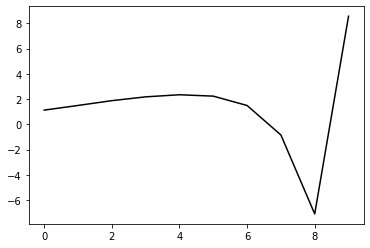

452100 0.23455892371364745
0.5660750352322248 -0.27120438228650473 0.4351967028310272 0.3560556595346908
[ 1.12365425  1.56943631  1.92604068  2.22066161  2.38351784  2.27162736
  1.53059986 -0.80197484 -7.0556203   8.47336381]


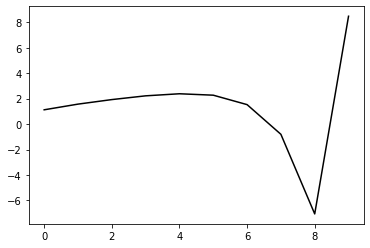

453200 0.20202787448579176
0.567376711606461 -0.2689052526234744 0.4295058126105705 0.36529053054345073
[ 1.1587386   1.66272571  2.0306985   2.32755847  2.48920508  2.37370626
  1.62824132 -0.70705176 -6.9573159   8.54233077]


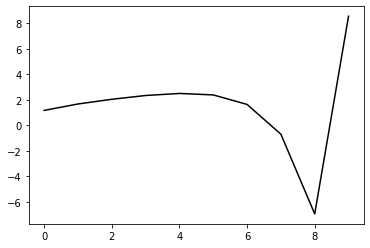

454300 0.1661884129658595
0.5852791154988397 -0.2668444069361329 0.43255447702389954 0.36449847688286213
[ 1.18085412  1.63324693  2.05854975  2.3881229   2.57594275  2.48258771
  1.75586506 -0.56287717 -6.80343568  8.59711683]


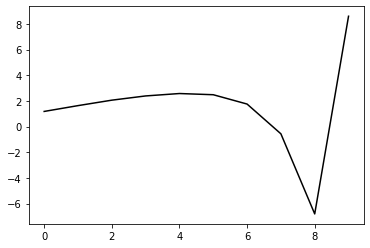

455400 0.17730969374792685
0.5774156409775245 -0.2659134813098899 0.4314383067957706 0.3733540327738304
[ 1.23178432  1.48430442  1.97606937  2.36027882  2.5874914   2.52756954
  1.82934045 -0.46497568 -6.69410896  8.54912351]


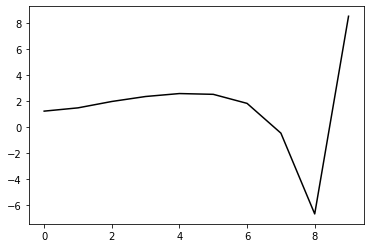

456500 0.3349645195052874
0.5252913906836463 -0.28314528474153094 0.4363794950661218 0.36878575896898347
[ 1.29927278  1.29300207  1.68049468  2.01578943  2.20526004  2.11895146
  1.40985479 -0.88329585 -7.12063039  8.5076123 ]


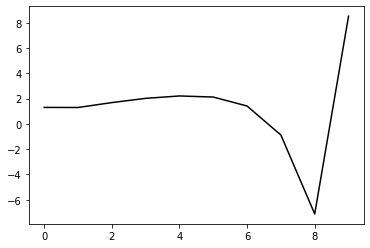

457600 0.18077869294444132
0.5636499157542989 -0.2717650963983104 0.4358597129906547 0.35317319800848174
[ 1.18506569  1.54444938  1.89756303  2.21039854  2.38537352  2.28148942
  1.55507822 -0.75259175 -6.9985123   8.43690802]


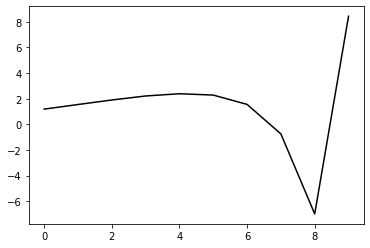

458700 0.2214345874382008
0.562442879510922 -0.276079265572435 0.43285144960621275 0.3778716840410392
[ 1.27613503  1.53964591  1.93041761  2.25431795  2.44573783  2.35880443
  1.64827165 -0.64154699 -6.86240524  8.58937165]


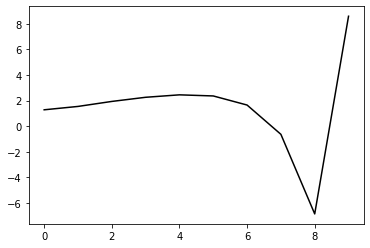

459800 0.25579647707969655
0.5867802077810219 -0.25155476250135295 0.42060339578310857 0.37733768697736747
[ 1.20171264  1.65445391  2.05842825  2.37363535  2.54947885  2.44713847
  1.72342867 -0.57664809 -6.81307746  8.53111977]


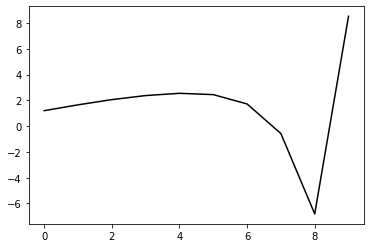

460900 0.2602248019810192
0.5425098328759369 -0.28471022127582496 0.4395454173308149 0.35828962465955705
[ 1.17425139  1.61287315  1.97164858  2.24116191  2.37210267  2.23435109
  1.48600441 -0.82898386 -7.07138566  8.49138767]


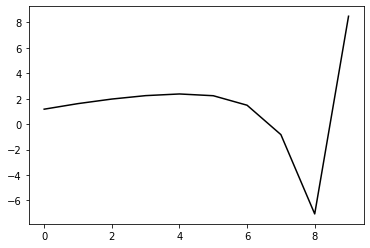

462000 0.2617946028959432
0.555915919053305 -0.2693568432698442 0.42798147236178696 0.3635332110070221
[ 1.19744288  1.59860573  1.95496732  2.22109976  2.34521623  2.20072444
  1.44738525 -0.86977971 -7.11462018  8.43245924]


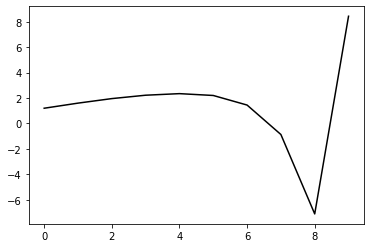

463100 0.19440431506176517
0.5939207929570881 -0.27423652354484745 0.4363150877878878 0.3725814785924576
[ 1.16100968  1.77269661  2.21363764  2.53797475  2.70367046  2.58678312
  1.85111759 -0.45355513 -6.6928389   8.52784131]


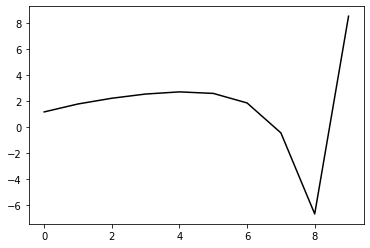

464200 0.1772121207978081
0.5907931162636167 -0.2764401639687862 0.4400909026759357 0.37134883184010553
[ 1.16149151  1.71962091  2.19511606  2.56444492  2.7659065   2.67560302
  1.96005161 -0.32837052 -6.56589566  8.54556796]


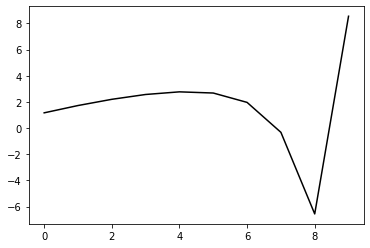

465300 0.213355899603661
0.6216340540079975 -0.23009744921727737 0.4152848606990536 0.3541412359023889
[ 1.17955642  1.69628827  2.04721324  2.32004082  2.44019836  2.28230253
  1.51788477 -0.8036914  -7.0857891   8.57907327]


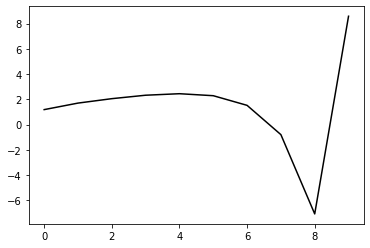

466400 0.17477233354527844
0.5924316429465909 -0.2565384536684479 0.42448204677672513 0.36908985854950643
[ 1.19446858  1.68080185  2.09506834  2.398531    2.54675639  2.41123294
  1.66443995 -0.63952926 -6.90429009  8.52245793]


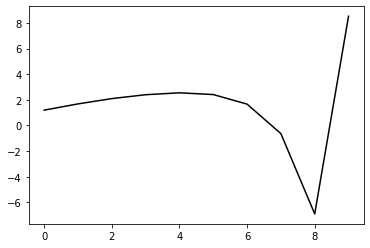

467500 0.22408265475082567
0.5988585321654336 -0.2646372472397082 0.431056449685083 0.3671753195312256
[ 1.12530403  1.74285082  2.16865876  2.46464102  2.59773228  2.44474307
  1.68090809 -0.63559746 -6.90548724  8.45973027]


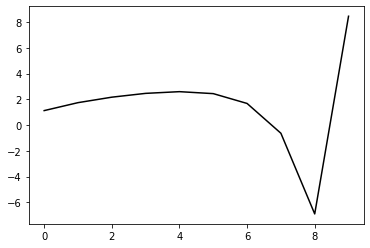

468600 0.10930829447808123
0.5994685851559675 -0.2707355501129763 0.4321388598412767 0.3752592882941828
[ 1.11610798  1.73133057  2.17592881  2.49800363  2.64399276  2.49752254
  1.73729332 -0.57366765 -6.83709067  8.50875091]


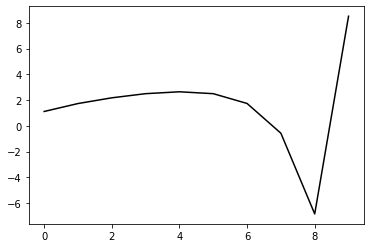

469700 0.15992458041632465
0.6164663890935953 -0.2661548453671703 0.42901304552022423 0.38245079838172275
[ 1.13549721  1.81301752  2.30026124  2.62398372  2.75164013  2.57584169
  1.78630655 -0.54696662 -6.82318147  8.52516803]


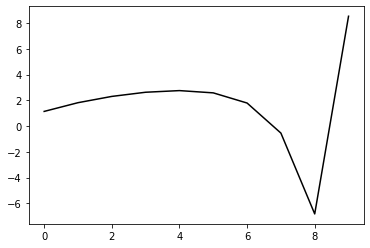

470800 0.19850754819005312
0.5873107952637611 -0.2742210174135108 0.42595730784026764 0.3863206791742898
[ 1.16640403  1.67712418  2.1375045   2.45923534  2.57613567  2.38392419
  1.57830041 -0.76460489 -7.04033924  8.5764529 ]


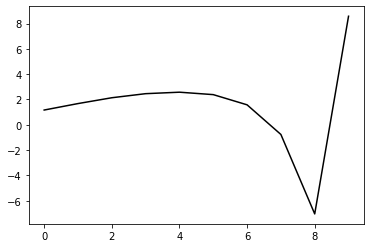

471900 0.39657188728247533
0.5721098535573215 -0.3053308607772953 0.4492795271269834 0.3770968915686225
[ 1.1147972   1.73698282  2.21660238  2.55485335  2.67397158  2.46850317
  1.64507954 -0.70993259 -6.98790844  8.5049832 ]


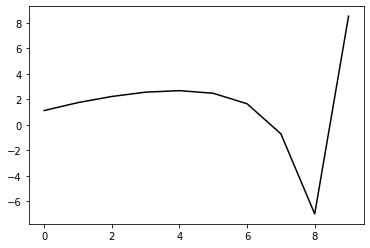

473000 0.2825646671497151
0.5824248195297292 -0.294768214462641 0.4417212418827115 0.37820678986296313
[ 1.09033566  1.67183203  2.13853739  2.45856085  2.56769712  2.35156575
  1.51776054 -0.84313618 -7.12569922  8.51233831]


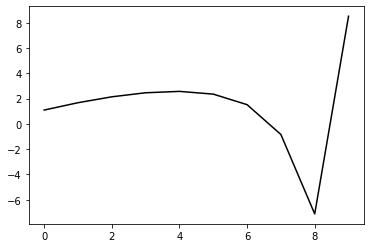

474100 0.25258557339227766
0.5744918251996174 -0.2989051895958681 0.44357317942811336 0.37635710658330335
[ 1.12802833  1.71309874  2.16973494  2.50508475  2.62716279  2.41458677
  1.57770058 -0.78547147 -7.0594302   8.5796045 ]


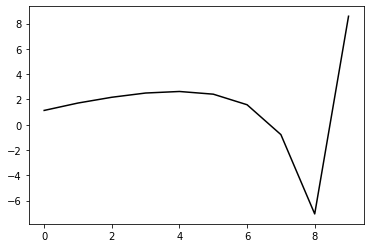

475200 0.23302435208833447
0.6019432259190194 -0.28695530932697666 0.43855907245991516 0.3700319199611389
[ 1.1110178   1.80215883  2.26382015  2.60225121  2.72268714  2.4977837
  1.641822   -0.73900559 -7.02708579  8.49536098]


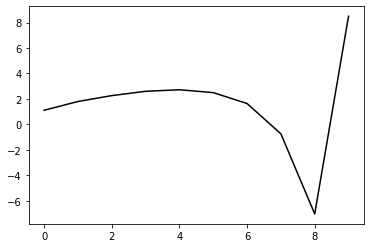

476300 0.289257315702644
0.5709273359038566 -0.3086172757035986 0.45299836677744176 0.36264995908074465
[ 1.11654572  1.63398926  2.1122407   2.46466988  2.60117356  2.38724187
  1.53456549 -0.84376804 -7.13026383  8.49234417]


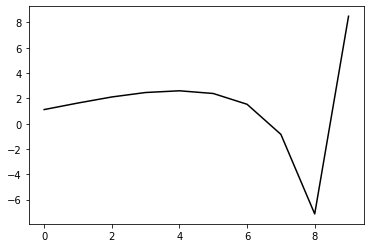

477400 0.31268604843137815
0.6307498651668566 -0.28192132240494755 0.4409406214727446 0.3762455526961105
[ 1.10252163  1.83609278  2.34120312  2.73514992  2.91542104  2.73569765
  1.90490685 -0.45796626 -6.74083573  8.56542208]


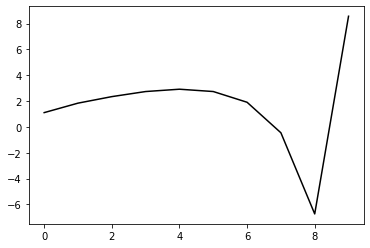

478500 0.20543559284748078
0.622149619353317 -0.26896788072466593 0.4281199613807144 0.37469829118021786
[ 1.17048274  1.81681406  2.28682004  2.63752664  2.78280313  2.57335671
  1.71443647 -0.67024939 -6.95874409  8.4815473 ]


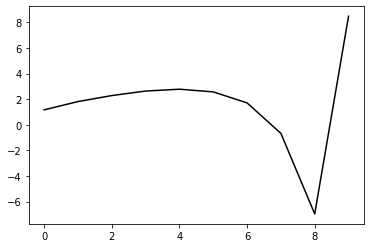

479600 0.14709462839150064
0.616647418794295 -0.2864314348364883 0.4397305411121945 0.37208893630781675
[ 1.13758483  1.89852831  2.39750512  2.75378461  2.89087563  2.66369331
  1.7804587  -0.62671517 -6.9303222   8.55609476]


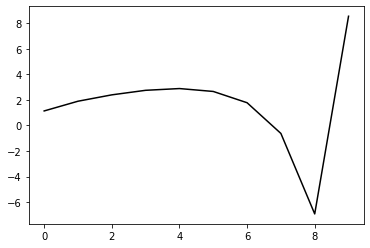

480700 0.16355197121734869
0.6241387502280938 -0.2792697880460262 0.4335937005918212 0.3813025578742352
[ 1.18471334  1.85991826  2.39840685  2.78187169  2.94014989  2.72815385
  1.85163526 -0.55193128 -6.85206857  8.48826924]


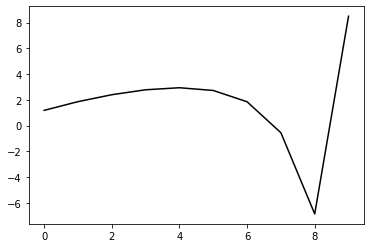

481800 0.2467034087455635
0.5470351578309053 -0.2862773009697833 0.4273518804634881 0.3784678491078388
[ 1.23740557  1.53659346  1.9662179   2.30735159  2.44494953  2.22735185
  1.34917302 -1.05428875 -7.35764114  8.4770559 ]


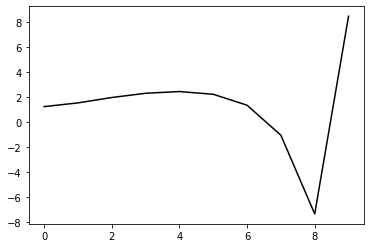

482900 0.29797055379102766
0.6157589563232702 -0.27399571138785184 0.4308907512327127 0.37924110192208377
[ 1.26124199  1.70799058  2.22555797  2.63459381  2.83315839  2.65779602
  1.80195087 -0.5910034  -6.88658457  8.51147298]


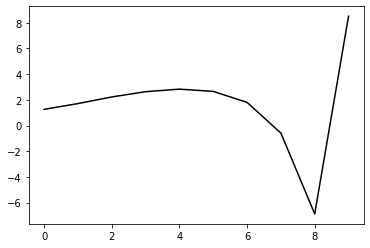

484000 0.21877911683531293
0.6126966521384278 -0.28294348921202767 0.44125447398882794 0.3633684826273007
[ 1.18091845  1.70529736  2.19485026  2.58357547  2.77377896  2.59660945
  1.73715433 -0.66004674 -6.95532489  8.47778177]


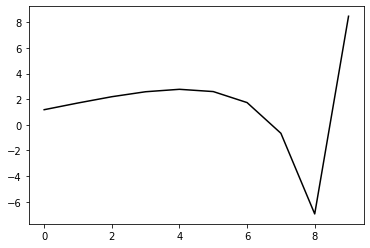

485100 0.21327136665241556
0.6186277717835927 -0.2649129503479526 0.4297577594784158 0.35987629791968334
[ 1.19591034  1.76372058  2.21528559  2.56937205  2.73155277  2.53722021
  1.66613563 -0.73899746 -7.03663954  8.50096392]


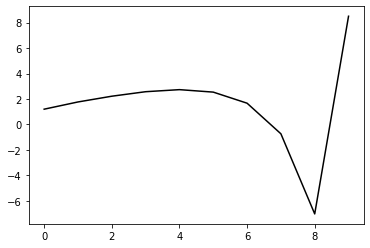

486200 0.30636713375356883
0.6326320778881451 -0.27038563563190093 0.43897072761011985 0.35154047149327516
[ 1.1114127   1.76896329  2.26207363  2.62800147  2.79371443  2.60055441
  1.72503786 -0.68713914 -6.99197064  8.62125903]


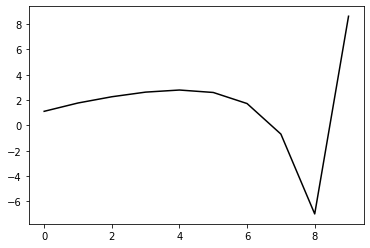

487300 0.17495502757483417
0.6049199296689326 -0.27931090628502153 0.4415703355648527 0.35360172119678557
[ 1.18242522  1.70740973  2.16902511  2.53419082  2.70604521  2.52136062
  1.65071529 -0.76049835 -7.05993505  8.50586557]


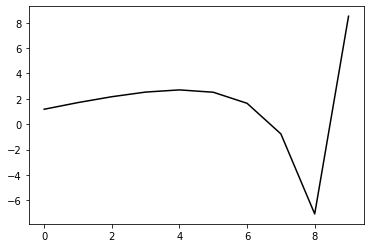

488400 0.23101080900915708
0.5683107980511838 -0.2839688047823975 0.437147004843894 0.35885452384956884
[ 1.2273881   1.67818116  2.11542979  2.45766379  2.60822566  2.40513787
  1.51795745 -0.90782117 -7.2159842   8.46668919]


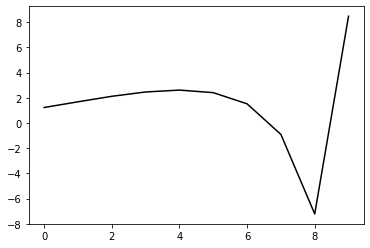

489500 0.18259597236754216
0.6395092795196535 -0.26323367642794193 0.43232992316968644 0.37342848905243015
[ 1.20923538  1.9047722   2.44114421  2.86684548  3.09014178  2.94075378
  2.08585168 -0.32597027 -6.65261448  8.52653099]


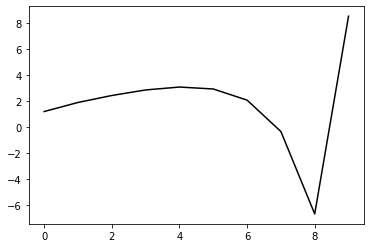

490600 0.26136132669553125
0.5719194944842452 -0.29854470942196354 0.450055141047225 0.3492069324486017
[ 1.15158837  1.75219129  2.20456908  2.54840188  2.70106499  2.49893629
  1.60444515 -0.83720806 -7.16899663  8.47213001]


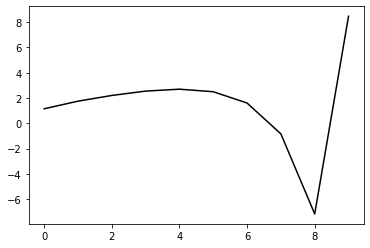

491700 0.9376589418385177
0.5802032178853979 -0.2603015624442819 0.4134129157478505 0.3956242878018745
[ 1.42497252  1.61115472  2.12781027  2.52975104  2.73609031  2.5798995
  1.721139   -0.69360003 -7.00038862  8.58340771]


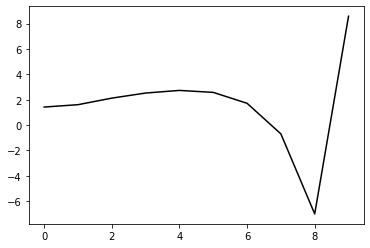

492800 0.20639313884107113
0.5814728282446621 -0.2825462747792987 0.43710085957647005 0.35445155543939844
[ 1.19167828  1.79082244  2.23123198  2.56262083  2.70353354  2.49172641
  1.58702393 -0.86751175 -7.21042671  8.43721857]


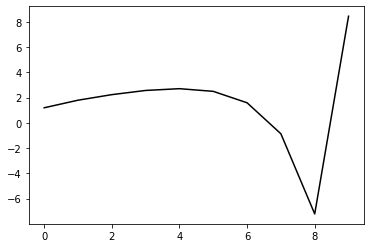

493900 0.32073150519495613
0.6209785155241854 -0.2728178316943908 0.4380618646798526 0.3579842693368106
[ 1.14262444  1.88904245  2.40971658  2.77871031  2.94045251  2.74108041
  1.84191636 -0.61292475 -6.96387765  8.56583146]


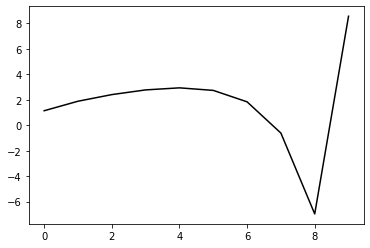

495000 0.4535941305783781
0.6025185368983123 -0.2655269146724233 0.428886384080702 0.37435869684340184
[ 1.29005172  1.73358178  2.28994696  2.71234356  2.92318136  2.76720428
  1.90289274 -0.52754808 -6.86683519  8.49532566]


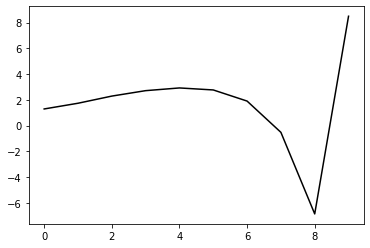

496100 0.29410726938778853
0.56001339774962 -0.2865549549907655 0.43573188340199476 0.35830200084513336
[ 1.2189119   1.68386725  2.14674753  2.50698642  2.65963078  2.45192399
  1.54410009 -0.92383533 -7.29183186  8.50317303]


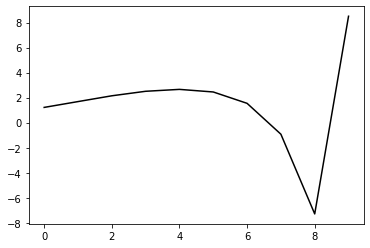

497200 0.21369200599872162
0.6152647849115961 -0.2803211508330868 0.44092462588273645 0.36616303692808183
[ 1.16088447  1.890271    2.42011002  2.83233697  3.03478521  2.86542966
  1.98315734 -0.47070458 -6.8394762   8.50862179]


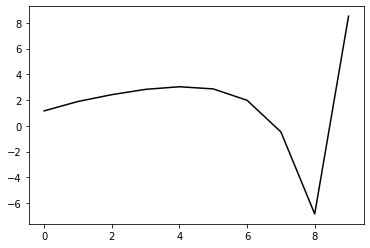

498300 0.15837169498751388
0.6150618720431928 -0.26713592178279344 0.43050610538687134 0.3711217203820528
[ 1.22834286  1.81949054  2.34489016  2.76537002  2.98132996  2.82612371
  1.95546184 -0.49086317 -6.84821001  8.59333798]


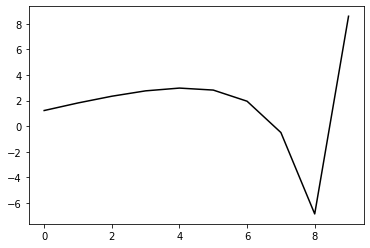

499400 0.1851203527173422
0.5903283843629367 -0.27965530414424966 0.43676632258513665 0.3622380395322904
[ 1.22662299  1.74334628  2.23149348  2.62370419  2.81581845  2.64270854
  1.75853151 -0.69935027 -7.0593331   8.46838261]


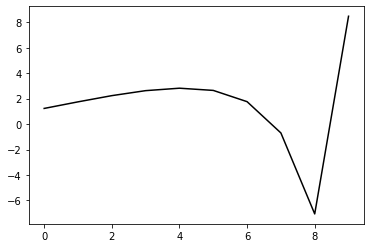

In [38]:
optimizer=tf.optimizers.Adam(learning_rate=0.001)
for j in range (5000):    
    with tf.GradientTape() as g:
        loss=Error_func(h, m2, lam, alpha, beta, Positive[j%10], Negative[j%10])
        gradients=g.gradient(loss, [h, m2, lam, alpha, beta])
    for i in range (80):
        optimizer.apply_gradients(zip(gradients, [h]))
    for i in range (20):
        optimizer.apply_gradients(zip(gradients, [h, m2, lam, alpha, beta]))
    if j%11==0: 
        print(j*100, Error_func(h, m2, lam, alpha, beta, Positive[j%10], Negative[j%10]).numpy())
        print(m2.numpy(), lam.numpy(), alpha.numpy(), beta.numpy()), print(h.numpy())
        plt.plot(h.numpy(), 'k-'), plt.show()

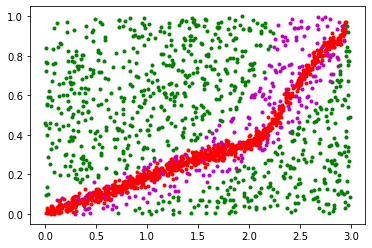

In [39]:
for i in range (set):
    [Positive0[i], Positive1[i]]=NN_func_01(h, m2, lam, alpha, beta, Positive[i])
    [Negative0[i], Negative1[i]]=NN_func_01(h, m2, lam, alpha, beta, Negative[i])
for i in range (set):
    x_data1[i]=[v[0] for v in Positive0[i]]
    y_data1[i]=[v[1] for v in Positive0[i]]
    x_data2[i]=[v[0] for v in Positive1[i]]
    y_data2[i]=[v[1] for v in Positive1[i]]
    x_data3[i]=[v[0] for v in Negative0[i]]
    y_data3[i]=[v[1] for v in Negative0[i]]
    x_data4[i]=[v[0] for v in Negative1[i]]
    y_data4[i]=[v[1] for v in Negative1[i]]
    plt.plot(x_data4[i], y_data4[i], 'g.')
    plt.plot(x_data2[i], y_data2[i], 'c.')
    plt.plot(x_data1[i], y_data1[i], 'r.')
    plt.plot(x_data3[i], y_data3[i], 'm.')
plt.show()